In [19]:
import cogsworth
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt
from cogsworth.pop import Population

# Extract_and_save_population

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path

def extract_and_save_population(pop, name, save_dir="extracted_data"):
    """
    Extracts bpp and final positions from a Cogsworth Population object,
    aligns them using bin_num, and saves to a single .parquet file.

    Parameters:
    -----------
    pop : cogsworth.pop.Population
        The population object (e.g., g1010_014)
    name : str
        Output filename prefix (e.g., "g1010_014")
    save_dir : str
        Directory to save the .parquet file
    """

    # Ensure final positions are loaded
    _ = pop.final_pos

    # Step 1: Extract and convert _final_pos
    pos_array = pop._final_pos.to("kpc").value  # (N_all, 3)
    bin_nums = pop.bin_nums

    # Step 2: Filter bin_nums to safe range
    safe_mask = bin_nums < len(pos_array)
    safe_bin_nums = bin_nums[safe_mask]
    safe_pos_array = pos_array[safe_bin_nums]

    # Step 3: Build position DataFrame
    pos_df = pd.DataFrame(safe_pos_array, columns=["x_kpc", "y_kpc", "z_kpc"])
    pos_df["bin_num"] = safe_bin_nums

    # Step 4: Extract and filter bpp
    bpp = pop._final_bpp
    bpp_trimmed = bpp[bpp["bin_num"].isin(safe_bin_nums)].copy()

    # Step 5: Merge on bin_num
    merged_df = pd.merge(bpp_trimmed, pos_df, on="bin_num")

    # Step 6: Save to .parquet
    Path(save_dir).mkdir(parents=True, exist_ok=True)
    out_path = Path(save_dir) / f"{name}_bpp_with_pos.parquet"
    merged_df.to_parquet(out_path, index=False)

    print(f"✅ Saved: {out_path} (shape = {merged_df.shape})")
    return merged_df

# load_and_concat_batches

In [57]:
import pandas as pd
from pathlib import Path

def merge_galaxy_batches_anyname(galaxy_name, base_path="/Users/neelpanchal/extracted_data"):
    batch_dir = Path(base_path) / galaxy_name / "batches"
    output_path = Path(base_path) / f"{galaxy_name}_merged.parquet"

    # Match all .parquet files regardless of name
    files = sorted(batch_dir.glob("*.parquet"))

    if not files:
        print(f"❌ No parquet files found in {batch_dir}")
        return

    print(f"📦 Merging {len(files)} files in {galaxy_name}/batches...")

    df = pd.concat((pd.read_parquet(f) for f in files), ignore_index=True)
    df.to_parquet(output_path, index=False)

    print(f"✅ Merged file saved at: {output_path} | Rows: {len(df)}")


In [59]:
galaxies = [
    "g1010_014", "g1010_0021",
    "g1110_014", "g1110_0021",
    "g1111_014", "g1111_0021",
    "g1210_014", "g1210_0021"
]

for g in galaxies:
    merge_galaxy_batches_anyname(g)

📦 Merging 195 files in g1010_014/batches...
✅ Merged file saved at: /Users/neelpanchal/extracted_data/g1010_014_merged.parquet | Rows: 9927626
📦 Merging 198 files in g1010_0021/batches...
✅ Merged file saved at: /Users/neelpanchal/extracted_data/g1010_0021_merged.parquet | Rows: 10080084
📦 Merging 195 files in g1110_014/batches...
✅ Merged file saved at: /Users/neelpanchal/extracted_data/g1110_014_merged.parquet | Rows: 9970268
📦 Merging 192 files in g1110_0021/batches...
✅ Merged file saved at: /Users/neelpanchal/extracted_data/g1110_0021_merged.parquet | Rows: 9812049
📦 Merging 192 files in g1111_014/batches...
✅ Merged file saved at: /Users/neelpanchal/extracted_data/g1111_014_merged.parquet | Rows: 9759505
📦 Merging 190 files in g1111_0021/batches...
✅ Merged file saved at: /Users/neelpanchal/extracted_data/g1111_0021_merged.parquet | Rows: 9657244
📦 Merging 192 files in g1210_014/batches...
✅ Merged file saved at: /Users/neelpanchal/extracted_data/g1210_014_merged.parquet | Rows: 

In [115]:
g1010_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1010_014_merged.parquet")
g1010_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1010_0021_merged.parquet")
g1110_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1110_014_merged.parquet")
g1110_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1110_0021_merged.parquet")
g1111_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1111_014_merged.parquet")
g1111_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1111_0021_merged.parquet")
g1210_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_014_merged.parquet")
g1210_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_0021_merged.parquet")

In [133]:
print("M1", g1111_014['mass_1'].max() - g1111_014['mass_1'].min())
print("M2", g1111_014['mass_2'].max() - g1111_014['mass_1'].min())
print(len(g1111_014))

M1 19.717775451877742
M2 26.30971312820621
9759505


In [5]:
print(g1010_014)

                tphys    mass_1    mass_2  kstar_1  kstar_2           sep  \
0         9772.855489  0.638494  0.000000       11       15      0.000000   
1         1986.457738  1.037822  1.020109        1        1    696.418435   
2         7051.148937  0.787544  0.675238        1        0    201.168922   
3         7583.293959  0.821888  0.947164       11        1     65.717438   
4        11680.681955  0.000000  1.189957       15       12      0.000000   
...               ...       ...       ...      ...      ...           ...   
9927621   9064.959047  1.277584  0.000000       13       15      0.000000   
9927622   7684.966464  0.929975  0.000000       11       15      0.000000   
9927623   5454.706387  0.860964  0.821596        1        1  15365.173846   
9927624  10002.237887  0.338543  0.955489       10        1      8.652222   
9927625  10171.737850  0.000000  0.171921       15       10      0.063117   

                  porb       ecc    RRLO_1    RRLO_2  ...  tacc_2  \
0     

In [3]:
import legwork as lw
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [5]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

#  UNRESOLVED BINNED FUNCTION

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from legwork import strain, psd

# --- Function to process a galaxy: clean, mask, bin, and plot ---
def bin_unresolved_galaxy(galaxy_df, distance_array, galaxy_name="Galaxy", min_sources=4, plot=True):
    """
    Given a galaxy DataFrame and its distance array,
    mask unresolved binaries, bin the unresolved PSD,
    and optionally plot the result.

    Returns:
    - f_fit_unresolved: frequencies of valid bins [Hz]
    - psd_fit_unresolved: corresponding PSD [strain²/Hz]
    """

    # Step 1: Clean the galaxy (porb > 0 and finite)
    valid_mask = (galaxy_df['porb'] > 0) & (np.isfinite(galaxy_df['porb']))
    df_clean = galaxy_df[valid_mask]
    dist_clean = distance_array[valid_mask]

    porb_clean = df_clean['porb'].values * u.day
    f_orb_clean = (1 / porb_clean).to(u.Hz)
    f_gw_clean = 2 * f_orb_clean

    m1_clean = df_clean['mass_1'].values * u.Msun
    m2_clean = df_clean['mass_2'].values * u.Msun
    ecc_clean = df_clean['ecc'].values

    # Chirp mass
    def chirp_mass(m1, m2):
        return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))
    
    m_c_clean = chirp_mass(m1_clean, m2_clean)

    # Characteristic strain
    h_c_clean = strain.h_c_n(
        m_c=m_c_clean,
        f_orb=f_orb_clean,
        ecc=ecc_clean,
        n=2,
        dist=dist_clean
    ).flatten()

    # Step 2: SNR calculation
    S_n_clean = psd.power_spectral_density(f_gw_clean)
    snr_clean = np.sqrt(h_c_clean**2 / (f_gw_clean * S_n_clean))

    # Step 3: Mask unresolved (SNR < 7)
    unresolved_mask = (snr_clean < 7)
    f_gw_unresolved = f_gw_clean[unresolved_mask]
    h_c_unresolved = h_c_clean[unresolved_mask]

    # Step 4: Bin the unresolved binaries
    bins = np.logspace(np.log10(np.min(f_gw_unresolved.value)), np.log10(np.max(f_gw_unresolved.value)), 100)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    psd_est_unresolved = np.full_like(bin_centers, fill_value=np.nan)

    for i in range(len(bin_centers)):
        idx = (f_gw_unresolved.value >= bins[i]) & (f_gw_unresolved.value < bins[i+1])
        if np.sum(idx) >= min_sources:
            psd_est_unresolved[i] = np.mean((h_c_unresolved[idx])**2 / f_gw_unresolved[idx].to(u.Hz).value)

    valid = (~np.isnan(psd_est_unresolved)) & (psd_est_unresolved > 0)
    f_fit_unresolved = bin_centers[valid]
    psd_fit_unresolved = psd_est_unresolved[valid]

    # Step 5: Plot (optional)
    if plot:
        plt.figure(figsize=(12, 8))
        plt.loglog(f_fit_unresolved, psd_fit_unresolved, '.', color='black')
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("PSD [strain²/Hz]")
        plt.title(f"Binned PSD (Unresolved Sources) - {galaxy_name}")
        plt.grid(True, which="both", ls=":")
        plt.tight_layout()
        plt.show()

    return f_fit_unresolved, psd_fit_unresolved

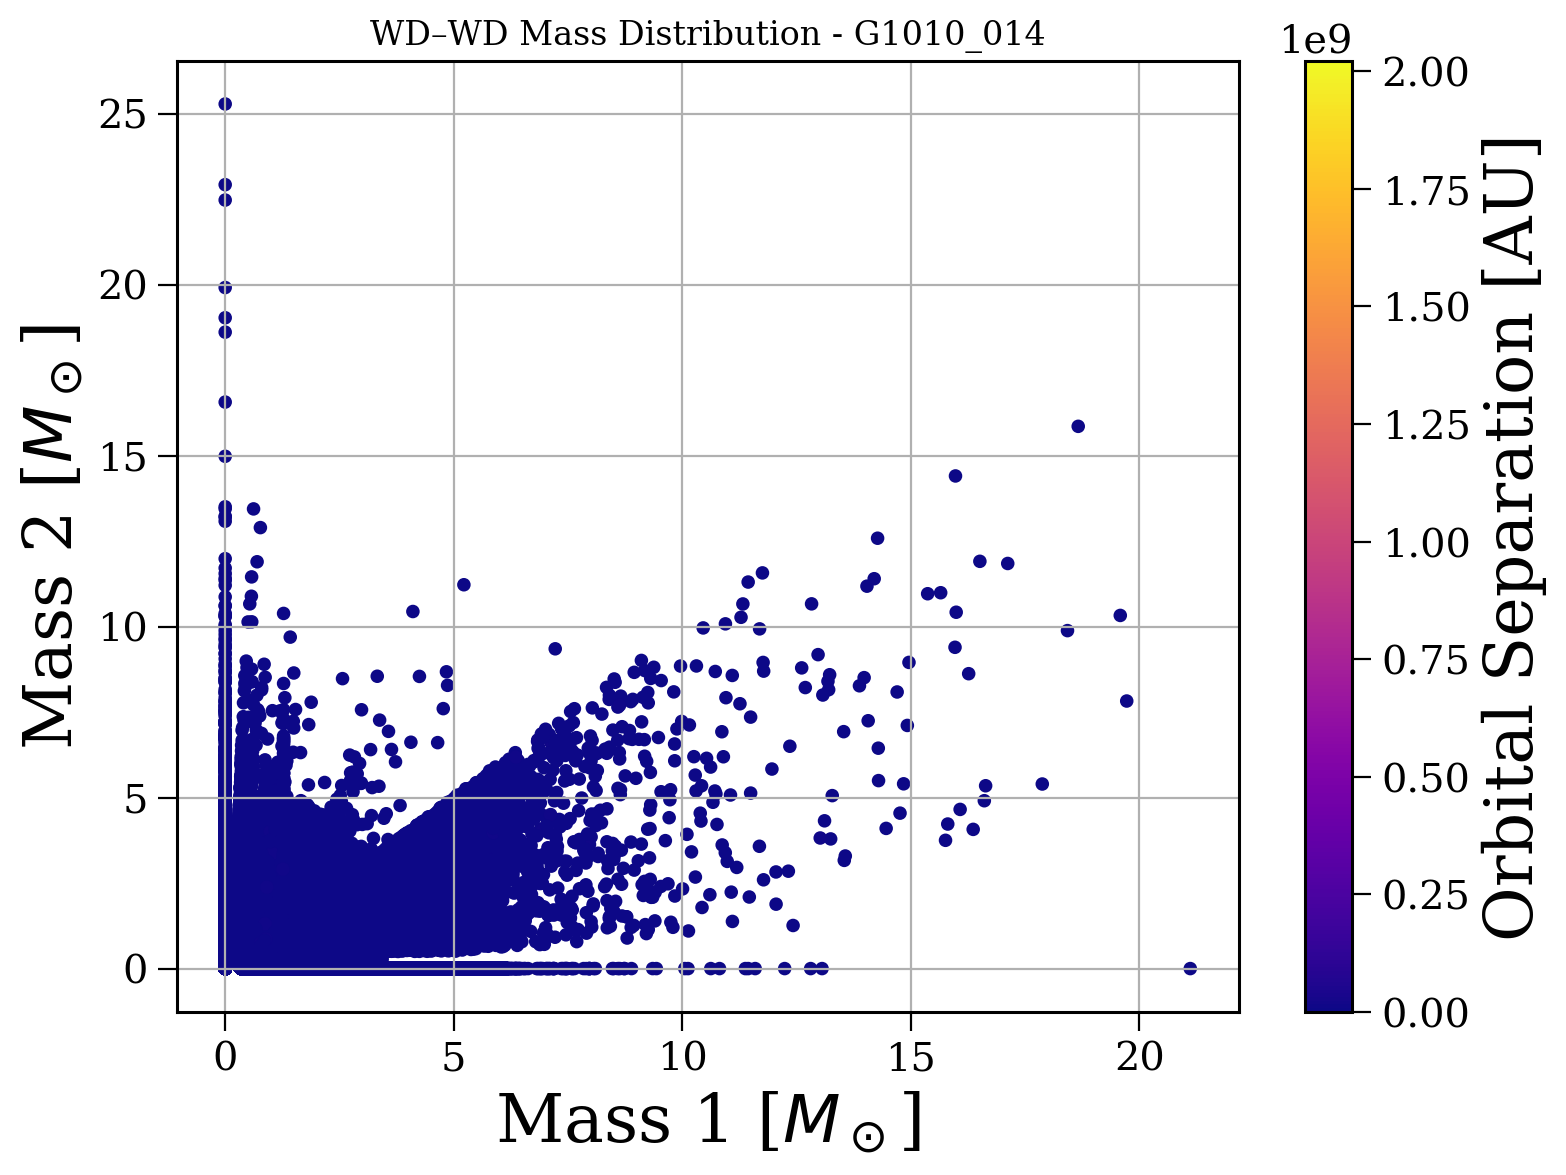

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.constants import R_sun, au

# Convert separation
sep_AU = g1010_014['sep'] * (au / R_sun).value

plt.figure(figsize=(8,6))
sc = plt.scatter(
    g1010_014['mass_1'], 
    g1010_014['mass_2'], 
    c=sep_AU, 
    cmap='plasma', 
    s=15
)
plt.colorbar(sc, label='Orbital Separation [AU]')
plt.xlabel('Mass 1 [$M_\\odot$]')
plt.ylabel('Mass 2 [$M_\\odot$]')
plt.title('WD–WD Mass Distribution - G1010_014')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import pandas as pd

# Galaxy file mapping
galaxy_info = {
    "g1010_014": "g1010_014_merged.parquet",
    "g1010_0021": "g1010_0021_merged.parquet",
    "g1110_014": "g1110_014_merged.parquet",
    "g1110_0021": "g1110_0021_merged.parquet",
    "g1111_014": "g1111_014_merged.parquet",
    "g1111_0021": "g1111_0021_merged.parquet",
    "g1210_014": "g1210_014_merged.parquet",
    "g1210_0021": "g1210_0021_merged.parquet",
}

# Base path to your parquet files
base_path = "/Users/neelpanchal/extracted_data/"

# Loop through all galaxies
for galaxy_name, file_name in galaxy_info.items():
    print(f"Processing {galaxy_name}...")

    # Load the data
    galaxy_df = pd.read_parquet(base_path + file_name)

    # Extract parameters with units
    m1 = galaxy_df['mass_1'].values * u.Msun
    m2 = galaxy_df['mass_2'].values * u.Msun
    f_orb = (1 / (galaxy_df['porb'].values * u.day)).to(u.Hz)
    ecc = galaxy_df['ecc'].values

    dist = np.sqrt(
        galaxy_df['x_kpc'].values**2 +
        galaxy_df['y_kpc'].values**2 +
        galaxy_df['z_kpc'].values**2
    ) * u.kpc

    # Create Source object
    s = source.Source(m_1=m1, m_2=m2, ecc=ecc, dist=dist, f_orb=f_orb)

    # Get SNR
    snr = s.get_snr(verbose=False)

    # Plot sources with SNR cutoff
    fig, ax = s.plot_sources_on_sc(snr_cutoff=7)

    # Save the plot
    plt.title(f"{galaxy_name} - Sources Above SNR=7", fontsize=18)
    plt.savefig(f"/Users/neelpanchal/extracted_data/spam_{galaxy_name}.png", dpi=500, bbox_inches='tight')
    plt.close(fig)

    print(f"✅ Saved plot for {galaxy_name}")

print("🚀 All galaxies processed successfully!")


# G1010_014

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 9927626 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	6316458 sources are stationary
		2799918 sources are stationary and circular
		3516540 sources are stationary and eccentric
	3611168 sources are evolving
		3611168 sources are evolving and circular


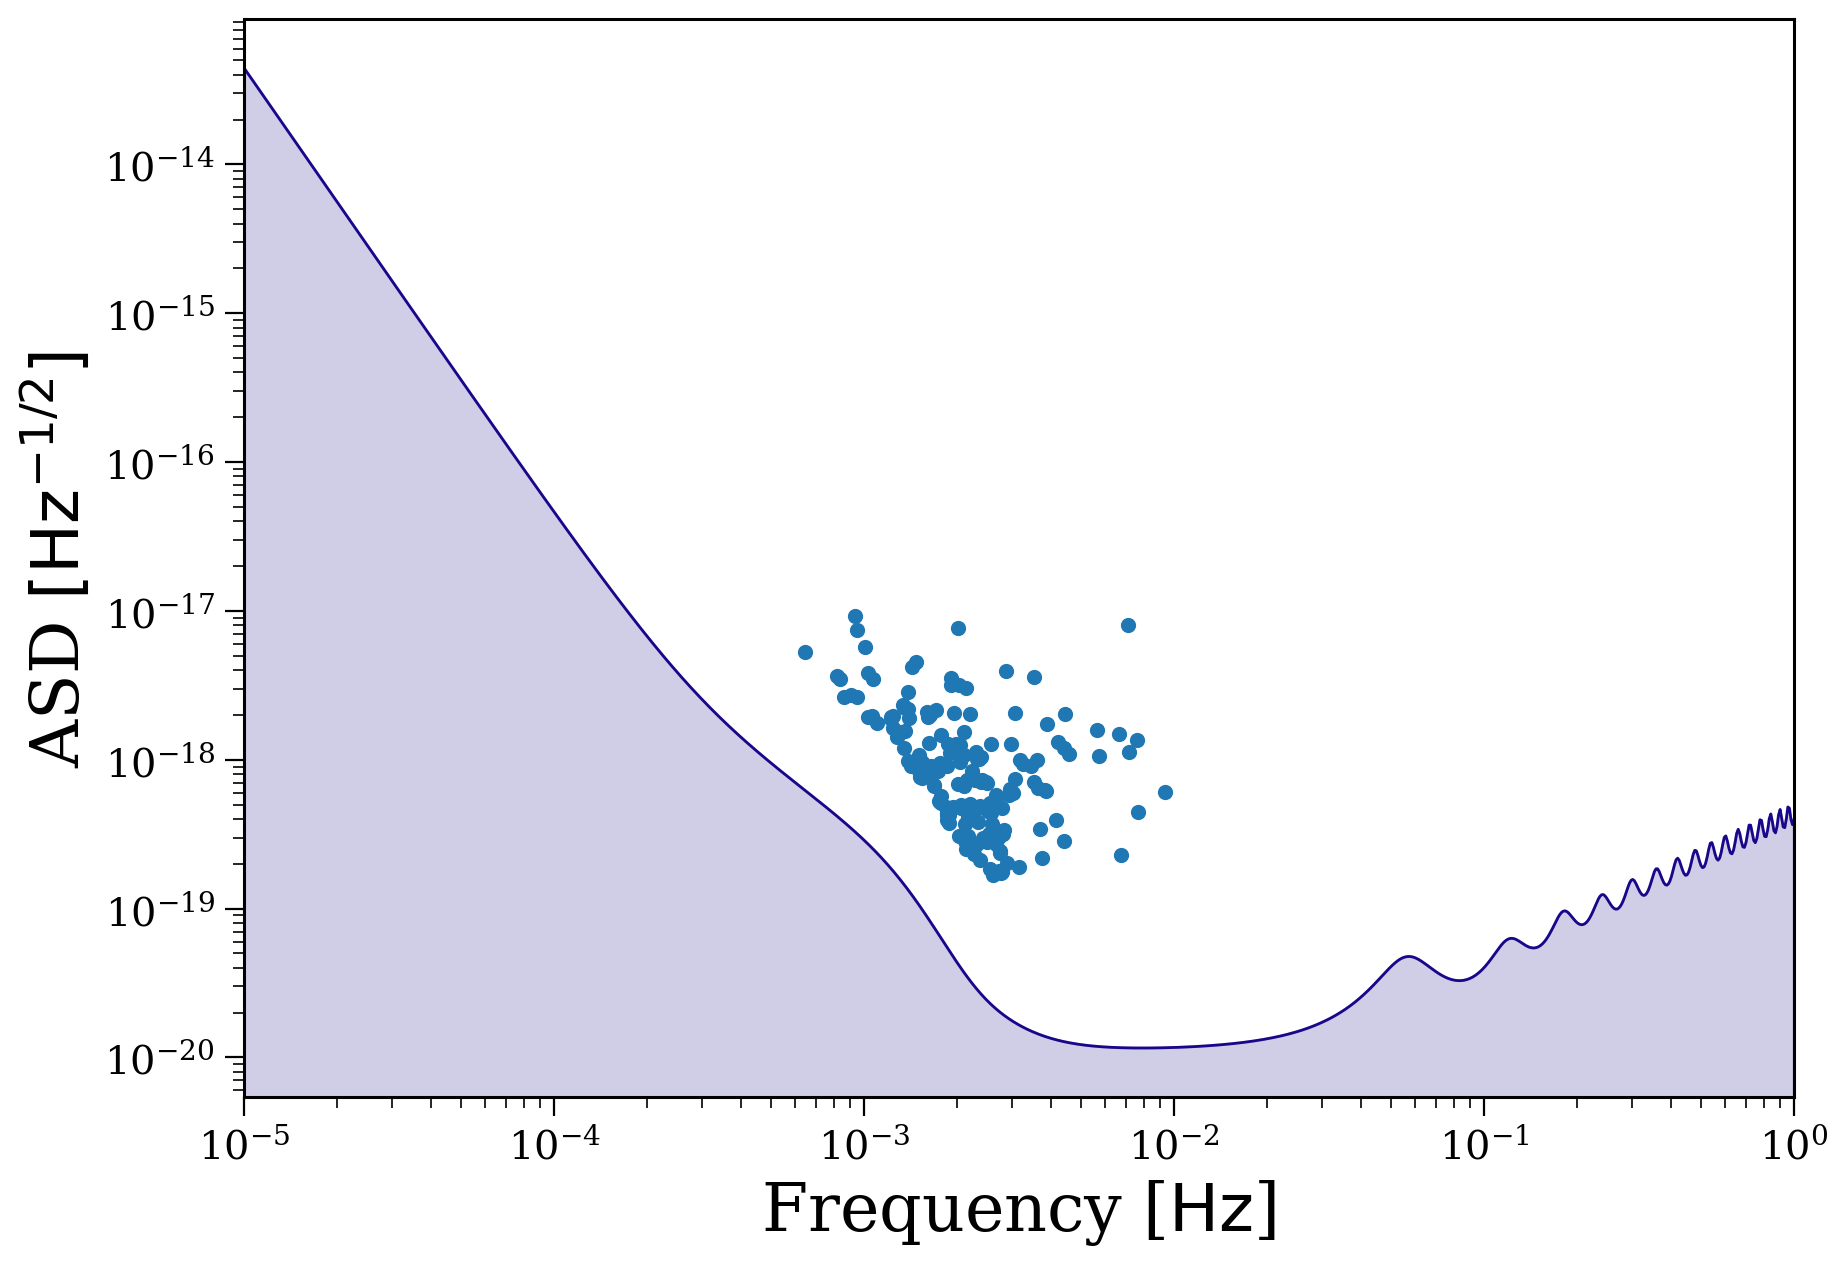

<Figure size 1200x800 with 0 Axes>

In [9]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1010_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1010_014_merged.parquet")

# Extract parameters from COSMIC output
m_1_1010_014 = g1010_014['mass_1'].values * u.Msun
m_2_1010_014 = g1010_014['mass_2'].values * u.Msun
f_orb_1010_014 = (1 / (g1010_014['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1010_014 = g1010_014['ecc'].values

# Simulate distance spread across galaxy
dist_1010_014 = (((g1010_014['x_kpc'])**2 + (g1010_014['y_kpc'])**2 + (g1010_014['z_kpc'])**2)**(0.5)).values * u.kpc
s_1010_014 = source.Source(m_1=m_1_1010_014, m_2=m_2_1010_014, ecc=ecc_1010_014, dist=dist_1010_014, f_orb=f_orb_1010_014)

snr = s_1010_014.get_snr(verbose=True)
fig, ax = s_1010_014.plot_sources_on_sc(snr_cutoff=7)
plt.savefig(f"/Users/neelpanchal/extracted_data/LISA-cutoff_{galaxy_name}.png", dpi=500, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


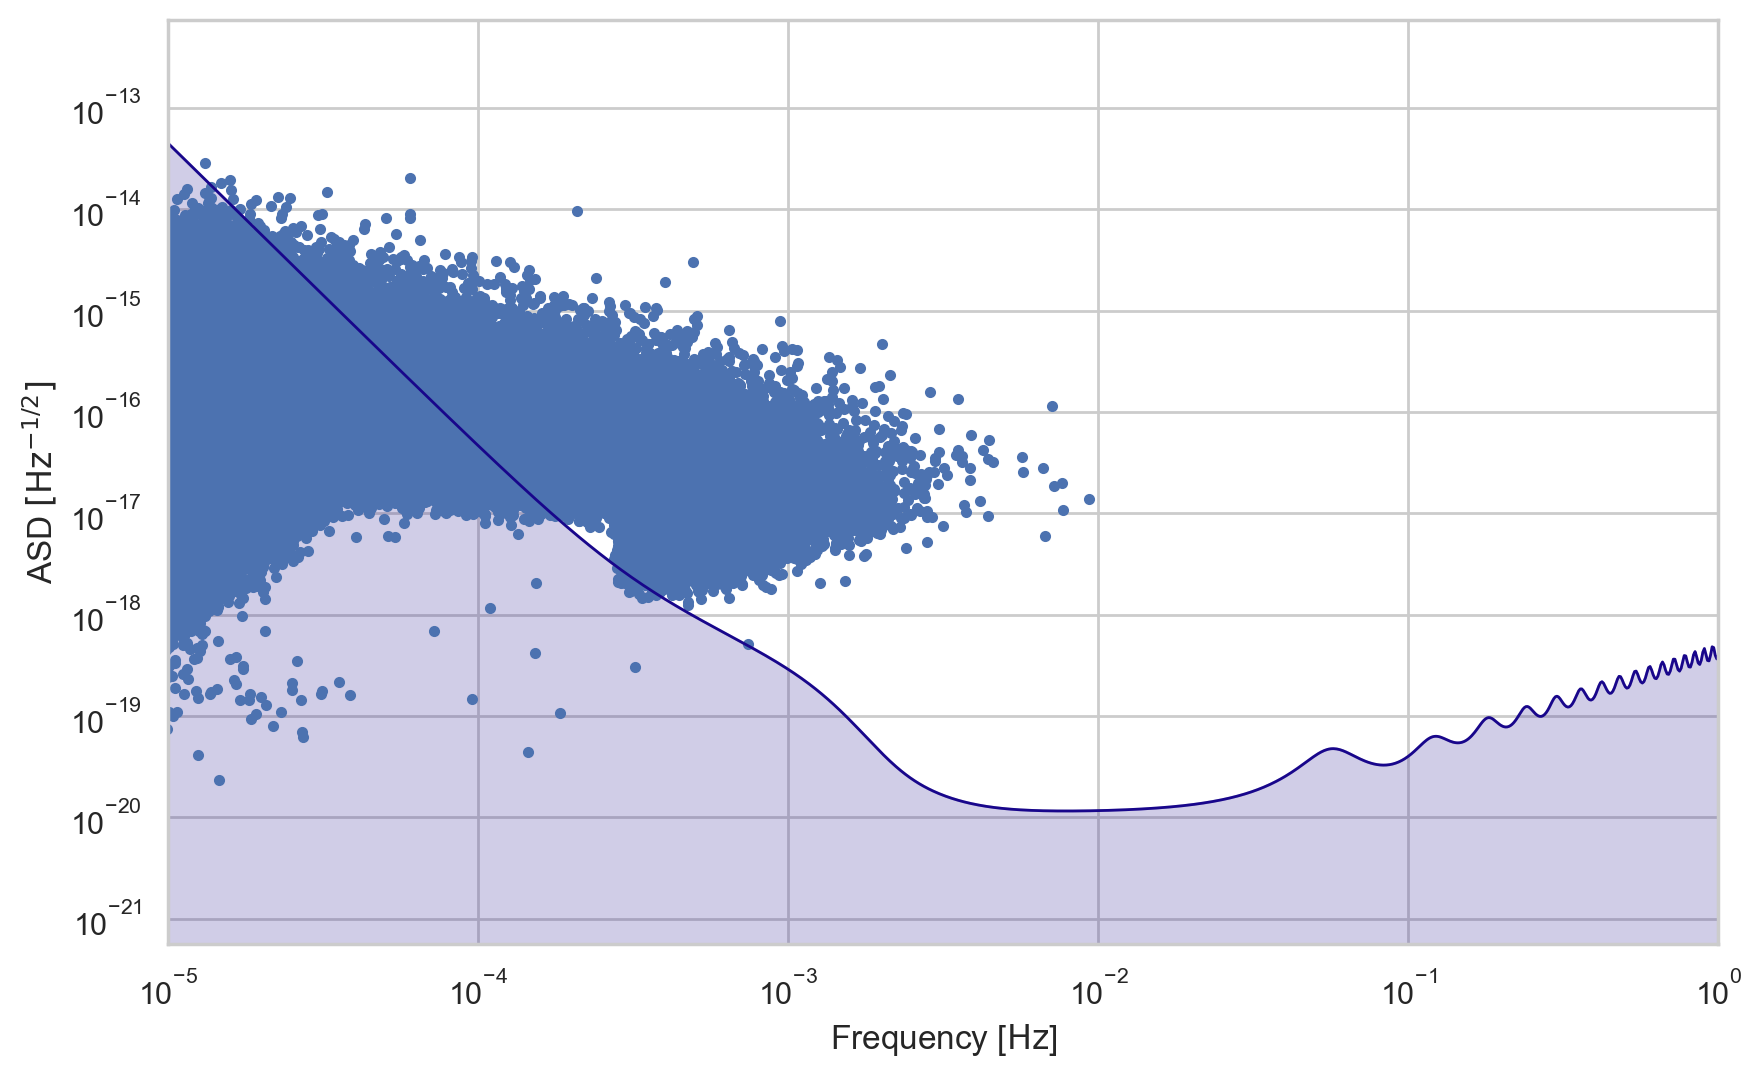

<Figure size 1200x800 with 0 Axes>

In [17]:
from legwork import strain
import legwork.visualisation as visualisation
import matplotlib.pyplot as plt
import seaborn as sns
f_gw_1010_014 = 2 * f_orb_1010_014

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1010_014 = chirp_mass(m_1_1010_014, m_2_1010_014)
h_c_1010_014 = strain.h_c_n(
    m_c=m_c_1010_014,
    f_orb=f_orb_1010_014,
    ecc=ecc_1010_014,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1010_014
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw_1010_014.value, h_c_1010_014, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1010_014")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

## Fitting Model - Cornish & Karnesis- g1010_014

In [19]:
print(g1010_014.columns)

Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num', 'metallicity', 'x_kpc', 'y_kpc',
       'z_kpc'],
      dtype='object')


Best-fit A (Cornish): [1.e-44]
Log-loss (Cornish fit): 2.417778912644142
Best-fit parameters (Flexible Karnesis): [1.00000000e-46 2.70729435e+00 5.00000000e-03 2.49967965e+00]
Final log-loss: 1.2957993894134328


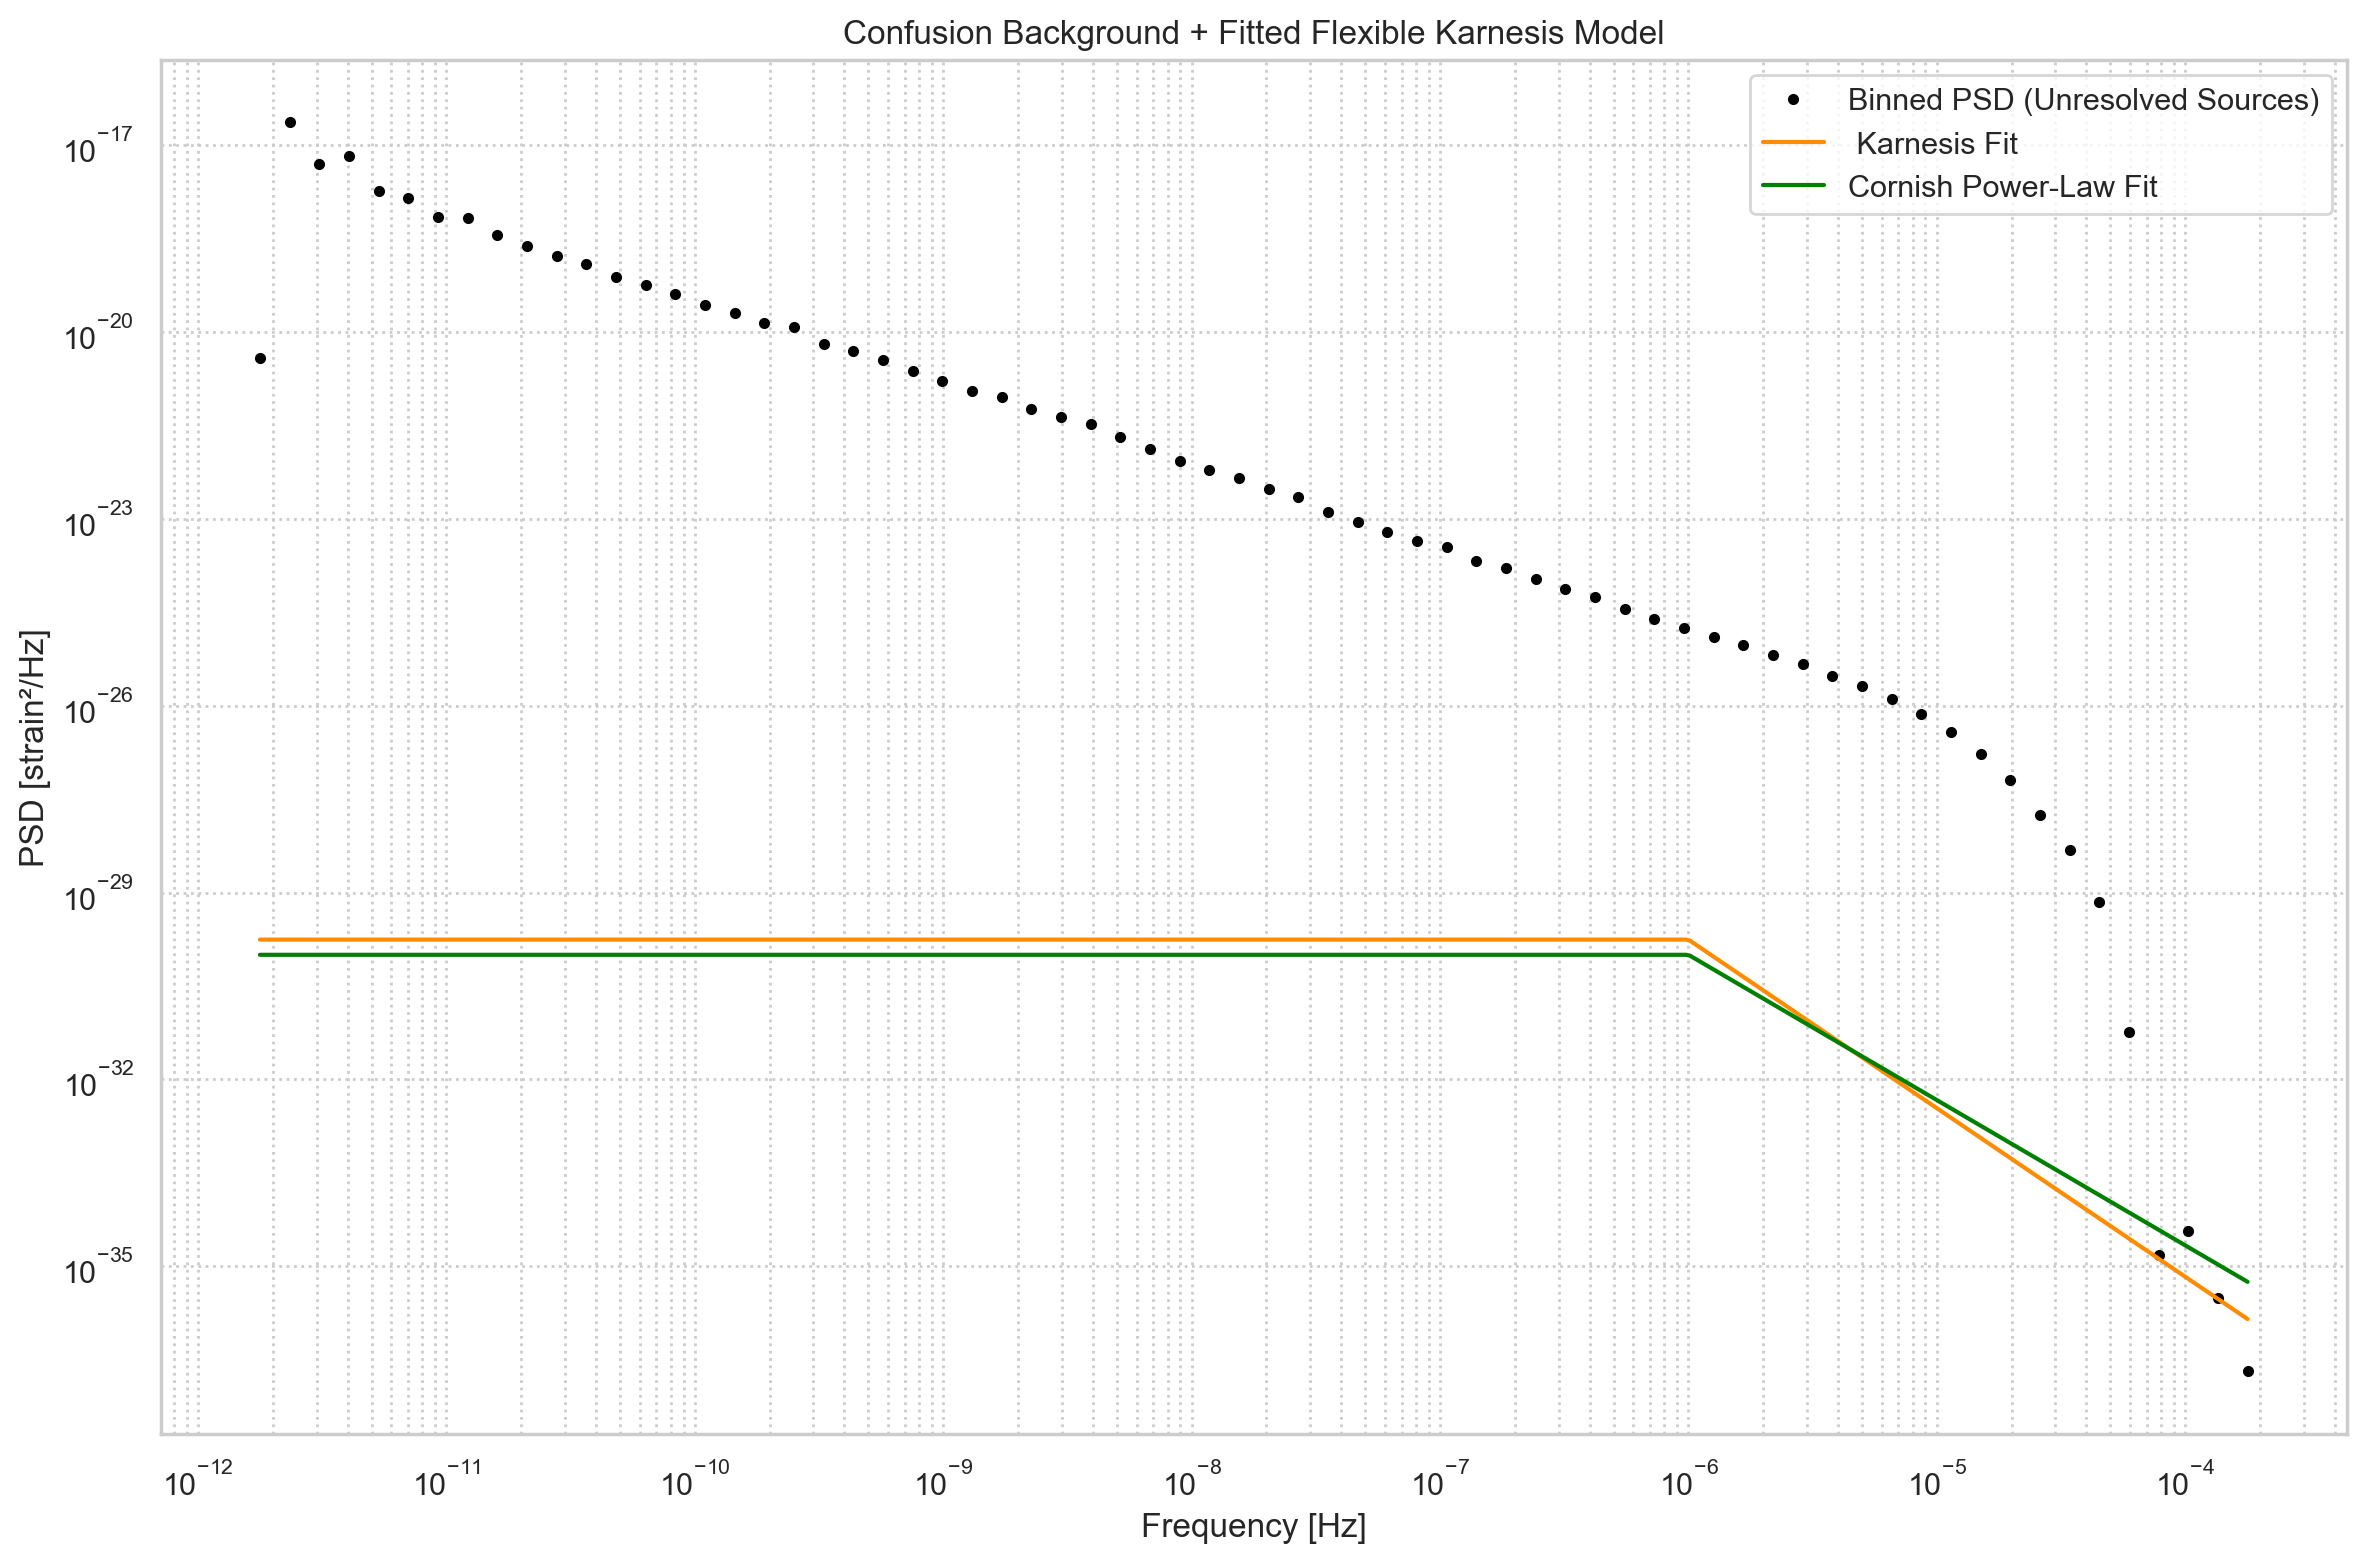

In [153]:
from scipy.optimize import minimize

# Flexible model (A, gamma, f1, alpha)
def flexible_karnesis_psd(f, A, gamma, f1, alpha):
    f_safe = np.clip(f, 1e-6, None)
    return A * f_safe**(-gamma) * np.exp(-(f_safe / f1)**alpha)

# Loss function
def log_loss_flexible(theta, f, psd):
    A, gamma, f1, alpha = theta
    model = flexible_karnesis_psd(f, A, gamma, f1, alpha)
    model = np.clip(model, 1e-40, np.inf)
    psd = np.clip(psd, 1e-40, np.inf)
    return np.sum((np.log10(psd) - np.log10(model))**2)

# Fitting function
def fit_flexible_karnesis(f_fit, psd_fit):
    mask = (f_fit > 1e-4) & (f_fit < 1e-2)
    f_fit_use = f_fit[mask]
    psd_fit_use = psd_fit[mask]

    p0 = [1e-40, 2.3, 1.5e-3, 2.5]  # Better amplitude, realistic f1  # Initial guess
    bounds = [
        (1e-46, 1e-40),   # A
        (1.0, 4.0),       # gamma (slope)
        (5e-3, 3e-2),     # f1
        (1.0, 5.0)        # alpha
    ]

    result = minimize(log_loss_flexible, p0, args=(f_fit_use, psd_fit_use), bounds=bounds)
    return result.x, result.fun

# Fit the model
popt_flexible, loss_flexible = fit_flexible_karnesis(f_fit_unresolved, psd_fit_unresolved)

#Cornish Model
# --- Step 1: Define Cornish model (simple power law) ---
def cornish_psd(f, A):
    f_safe = np.clip(f, 1e-6, None)
    return A * f_safe**(-7/3)

# --- Step 2: Log-loss for Cornish ---
def log_loss_cornish(theta, f, psd):
    A = theta[0]
    model = cornish_psd(f, A)
    model = np.clip(model, 1e-40, np.inf)
    psd = np.clip(psd, 1e-40, np.inf)
    return np.sum((np.log10(psd) - np.log10(model))**2)

# --- Step 3: Fit function ---
def fit_cornish(f_fit, psd_fit):
    mask = (f_fit > 1e-4) & (f_fit < 1e-2)  # Standard fitting window
    f_fit_use = f_fit[mask]
    psd_fit_use = psd_fit[mask]

    p0 = [1e-44]  # Initial guess for A
    bounds = [(1e-46, 1e-40)]

    result = minimize(log_loss_cornish, p0, args=(f_fit_use, psd_fit_use), bounds=bounds)
    return result.x, result.fun

# --- Step 4: Apply to your current f_fit_unresolved and psd_fit_unresolved ---

# Fit
popt_cornish, loss_cornish = fit_cornish(f_fit_unresolved, psd_fit_unresolved)

#-----------------------------------------------
print("Best-fit A (Cornish):", popt_cornish)
print("Log-loss (Cornish fit):", loss_cornish)
print("Best-fit parameters (Flexible Karnesis):", popt_flexible)
print("Final log-loss:", loss_flexible)
# Generate fine frequency range
f_plot = np.logspace(np.log10(np.min(f_fit_unresolved)), np.log10(np.max(f_fit_unresolved)), 500)

# Plot everything
plt.figure(figsize=(12, 8))
plt.loglog(f_fit_unresolved, psd_fit_unresolved, '.', label="Binned PSD (Unresolved Sources)", color="black")
plt.loglog(f_plot, flexible_karnesis_psd(f_plot, *popt_flexible), '-', label=" Karnesis Fit", color="darkorange")
plt.loglog(f_plot, cornish_psd(f_plot, *popt_cornish), '-', label="Cornish Power-Law Fit", color="green")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [strain²/Hz]")
plt.title("Confusion Background + Fitted Flexible Karnesis Model")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.tight_layout()
plt.show()

In [141]:
print(len(f_plot))
print(len(f_fit_unresolved))

500
68


Number of bins in slope region: 3


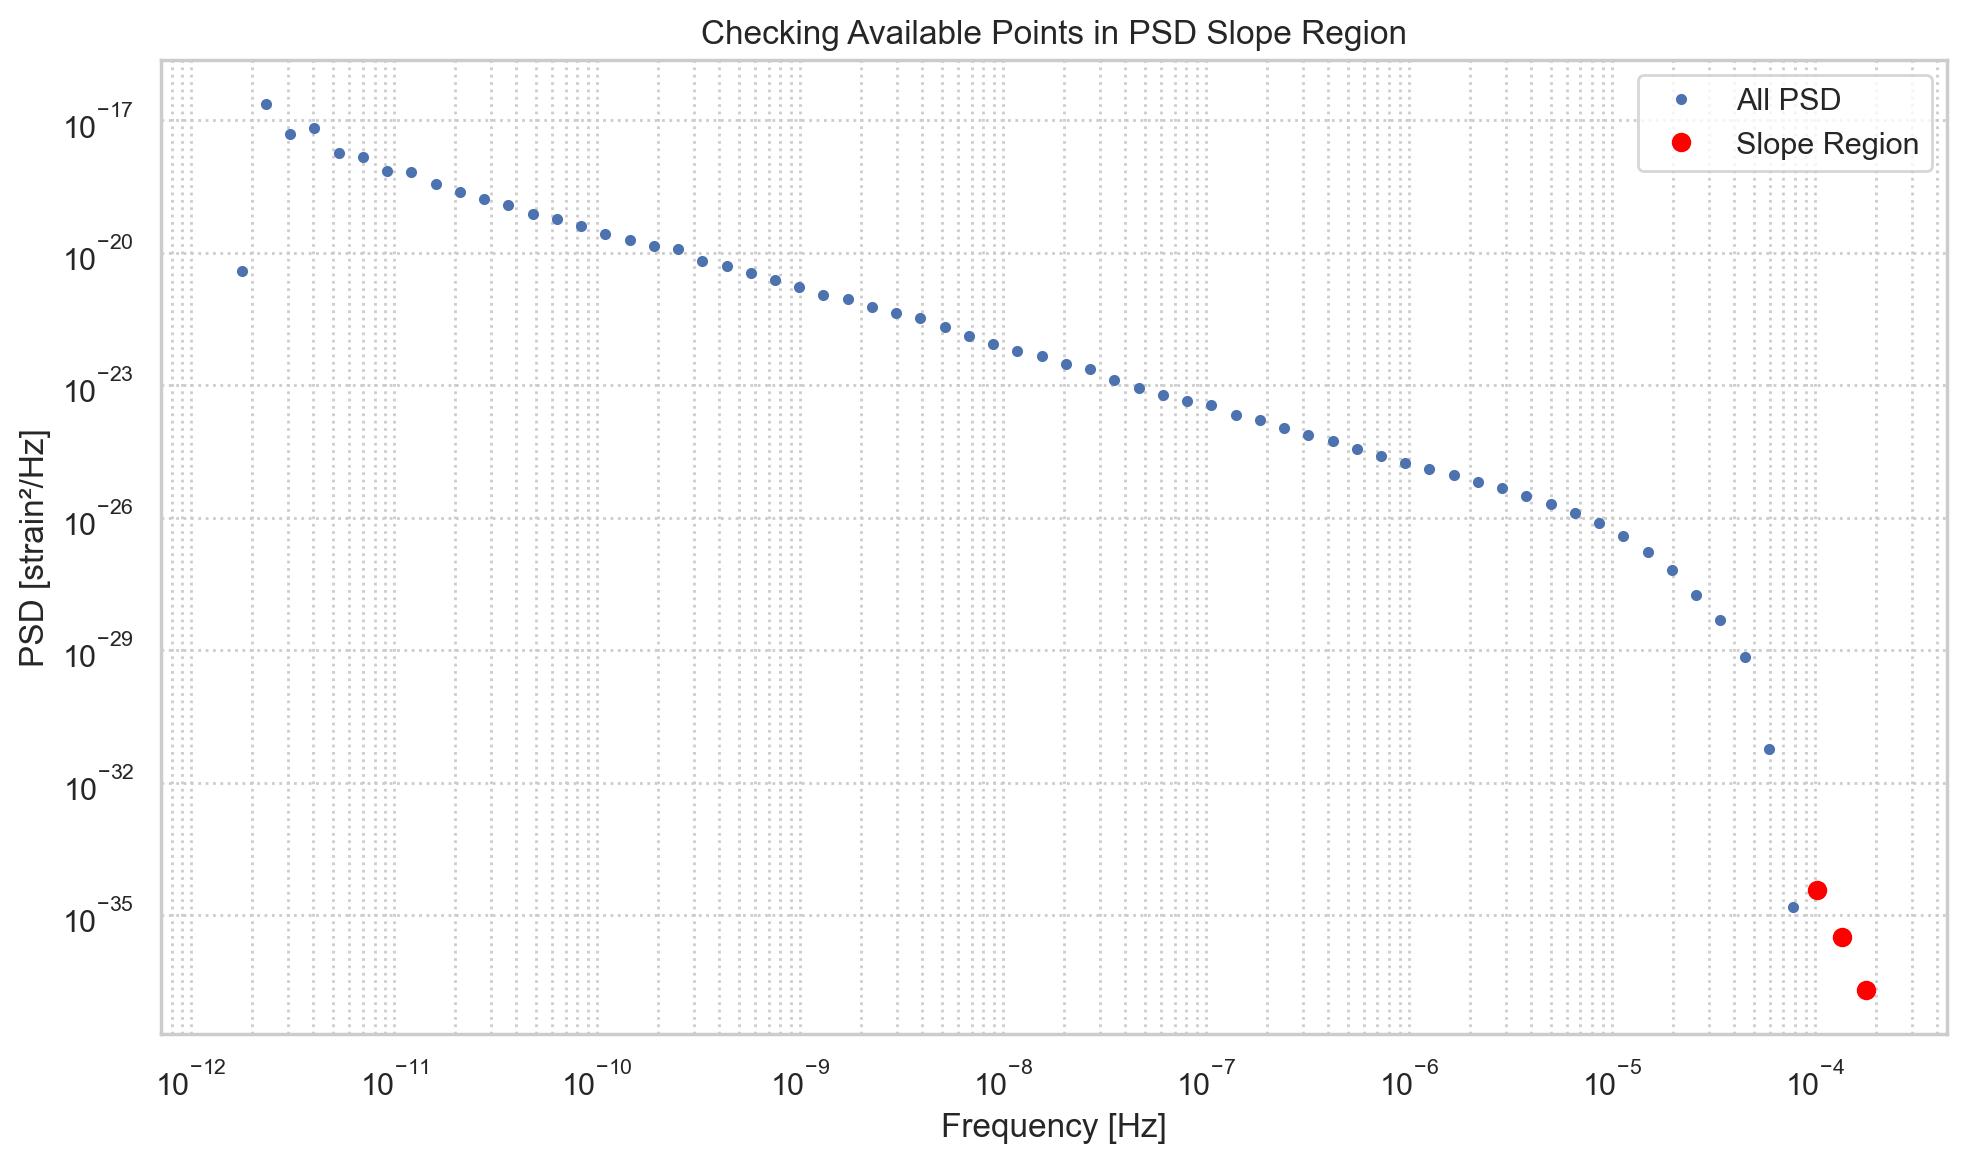

In [157]:
# Mask a region where you think slope exists (e.g., 3e-5 Hz to 5e-4 Hz)
mask_slope = (f_fit_unresolved > 1e-4) & (f_fit_unresolved < 1e-2)

# Check how many points are there
print(f"Number of bins in slope region: {np.sum(mask_slope)}")

# Optionally: plot it
plt.figure(figsize=(10,6))
plt.loglog(f_fit_unresolved, psd_fit_unresolved, '.', label='All PSD')
plt.loglog(f_fit_unresolved[mask_slope], psd_fit_unresolved[mask_slope], 'o', label='Slope Region', color='red')
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [strain²/Hz]")
plt.legend()
plt.title("Checking Available Points in PSD Slope Region")
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

## G1010 - 0021

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 10080084 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	6026941 sources are stationary
		2760739 sources are stationary and circular
		3266202 sources are stationary and eccentric
	4053143 sources are evolving
		4053143 sources are evolving and circular


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


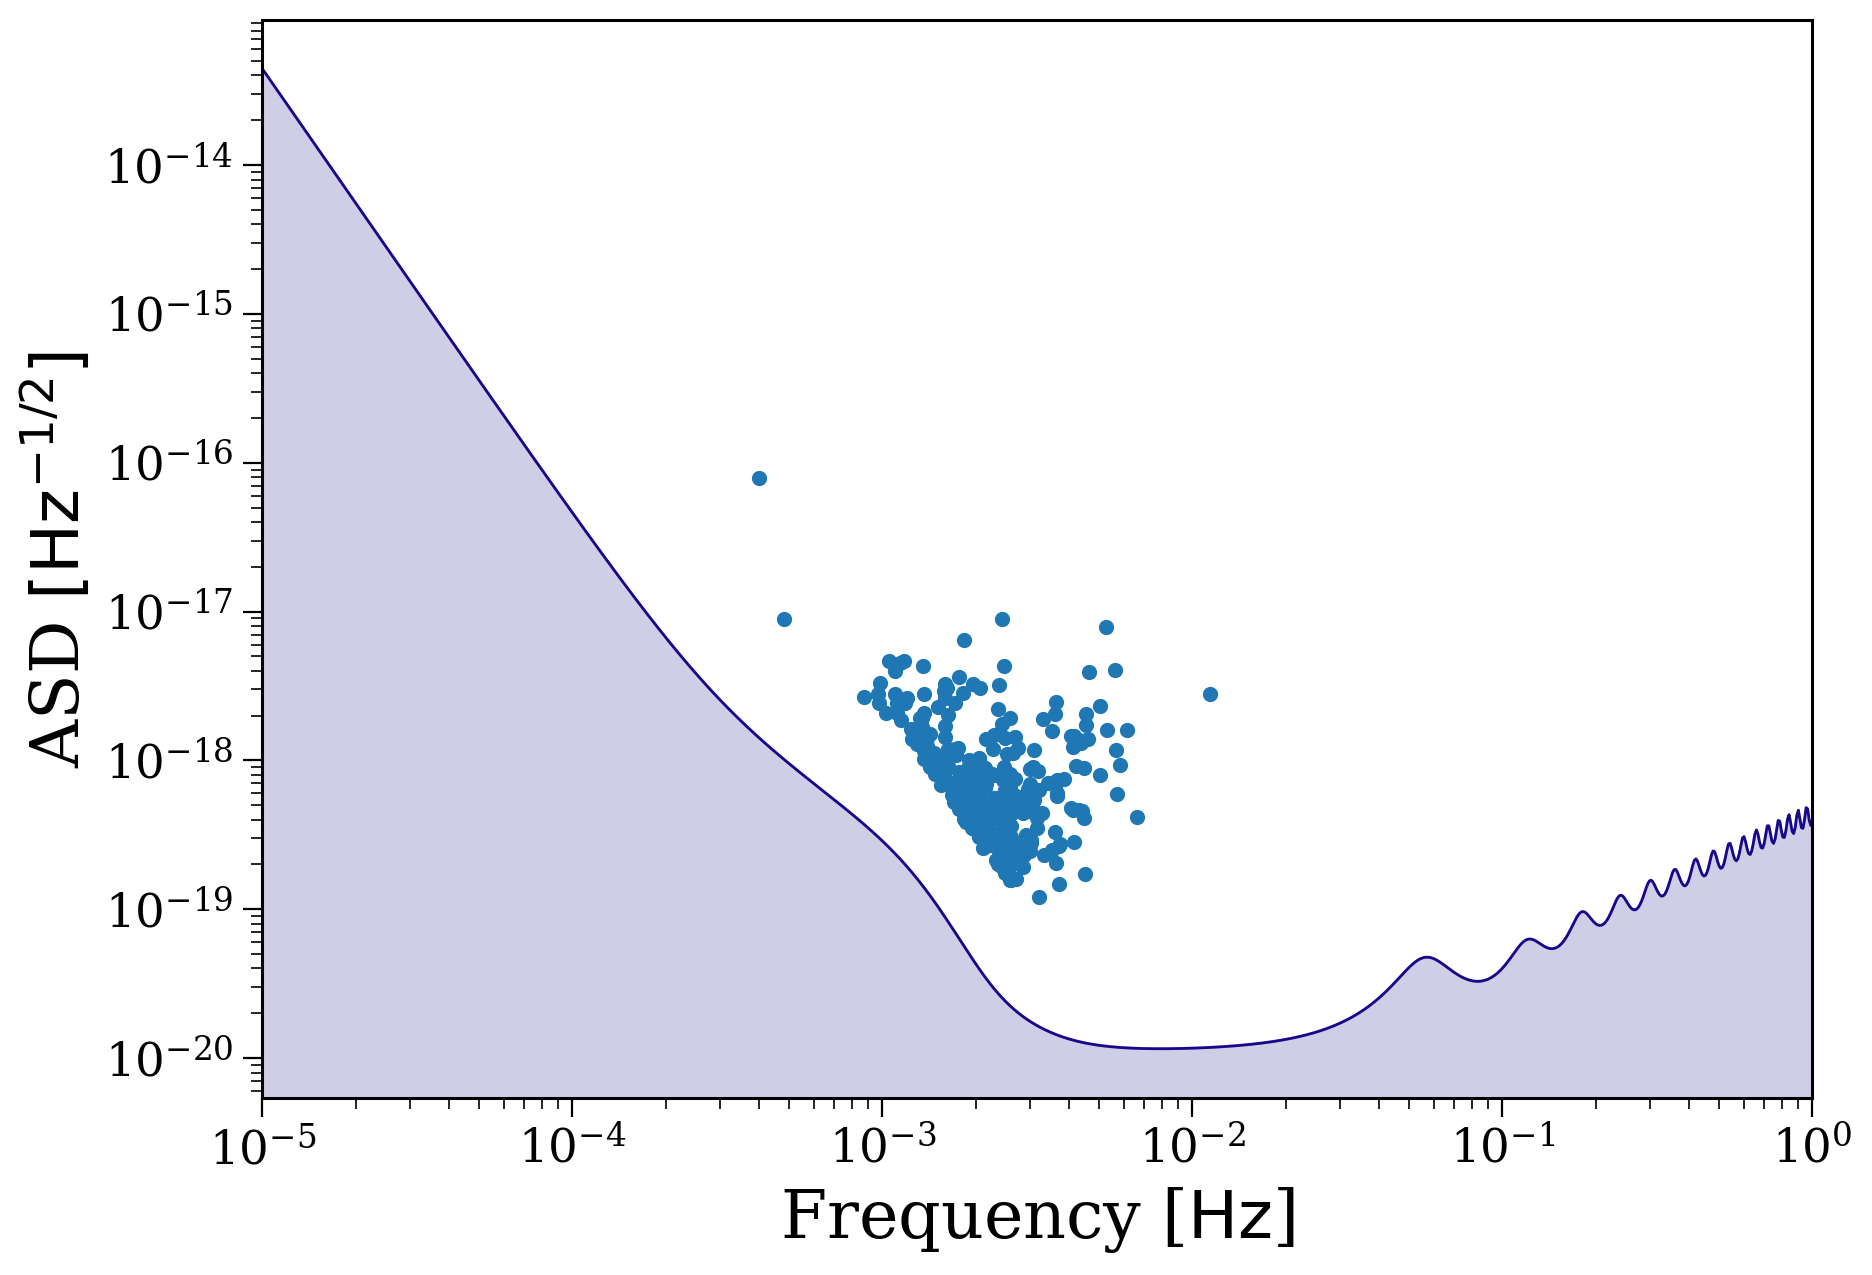

In [7]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1010_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1010_0021_merged.parquet")

# Extract parameters from COSMIC output
m_1_1010_0021 = g1010_0021['mass_1'].values * u.Msun
m_2_1010_0021 = g1010_0021['mass_2'].values * u.Msun
f_orb_1010_0021 = (1 / (g1010_0021['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1010_0021 = g1010_0021['ecc'].values

# Simulate distance spread across galaxy
dist_1010_0021 = (((g1010_0021['x_kpc'])**2 + (g1010_0021['y_kpc'])**2 + (g1010_0021['z_kpc'])**2)**(0.5)).values * u.kpc
s_1010_0021 = source.Source(m_1=m_1_1010_0021, m_2=m_2_1010_0021, ecc=ecc_1010_0021, dist=dist_1010_0021, f_orb=f_orb_1010_0021)
snr = s_1010_0021.get_snr(verbose=True)
fig, ax = s_1010_0021.plot_sources_on_sc(snr_cutoff=7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


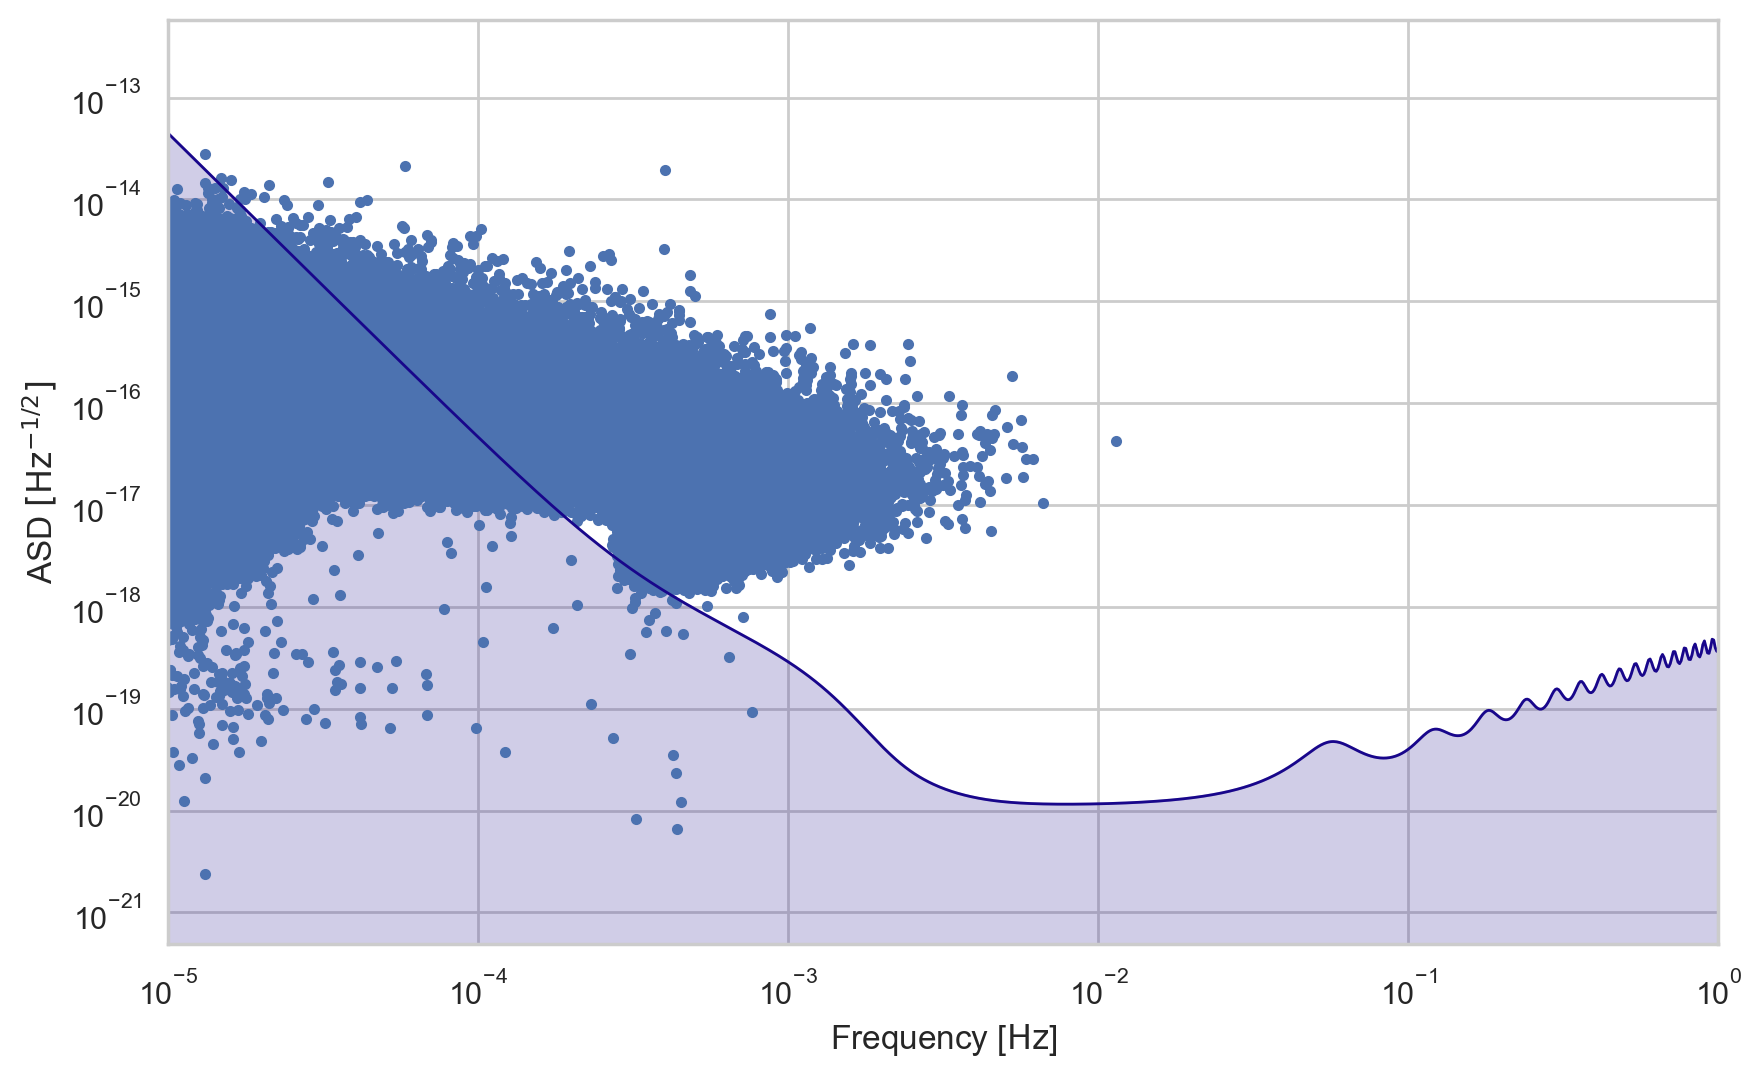

<Figure size 1200x800 with 0 Axes>

In [13]:
from legwork import strain
import legwork.visualisation as visualisation
import matplotlib.pyplot as plt
import seaborn as sns
f_gw_1010_0021 = 2 * f_orb_1010_0021

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1010_0021 = chirp_mass(m_1_1010_0021, m_2_1010_0021)
h_c_1010_0021 = strain.h_c_n(
    m_c=m_c_1010_0021,
    f_orb=f_orb_1010_0021,
    ecc=ecc_1010_0021,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1010_0021
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw_1010_0021.value, h_c_1010_0021, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1010_0021")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

## Fitting Model Cornish - g1010_0021

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


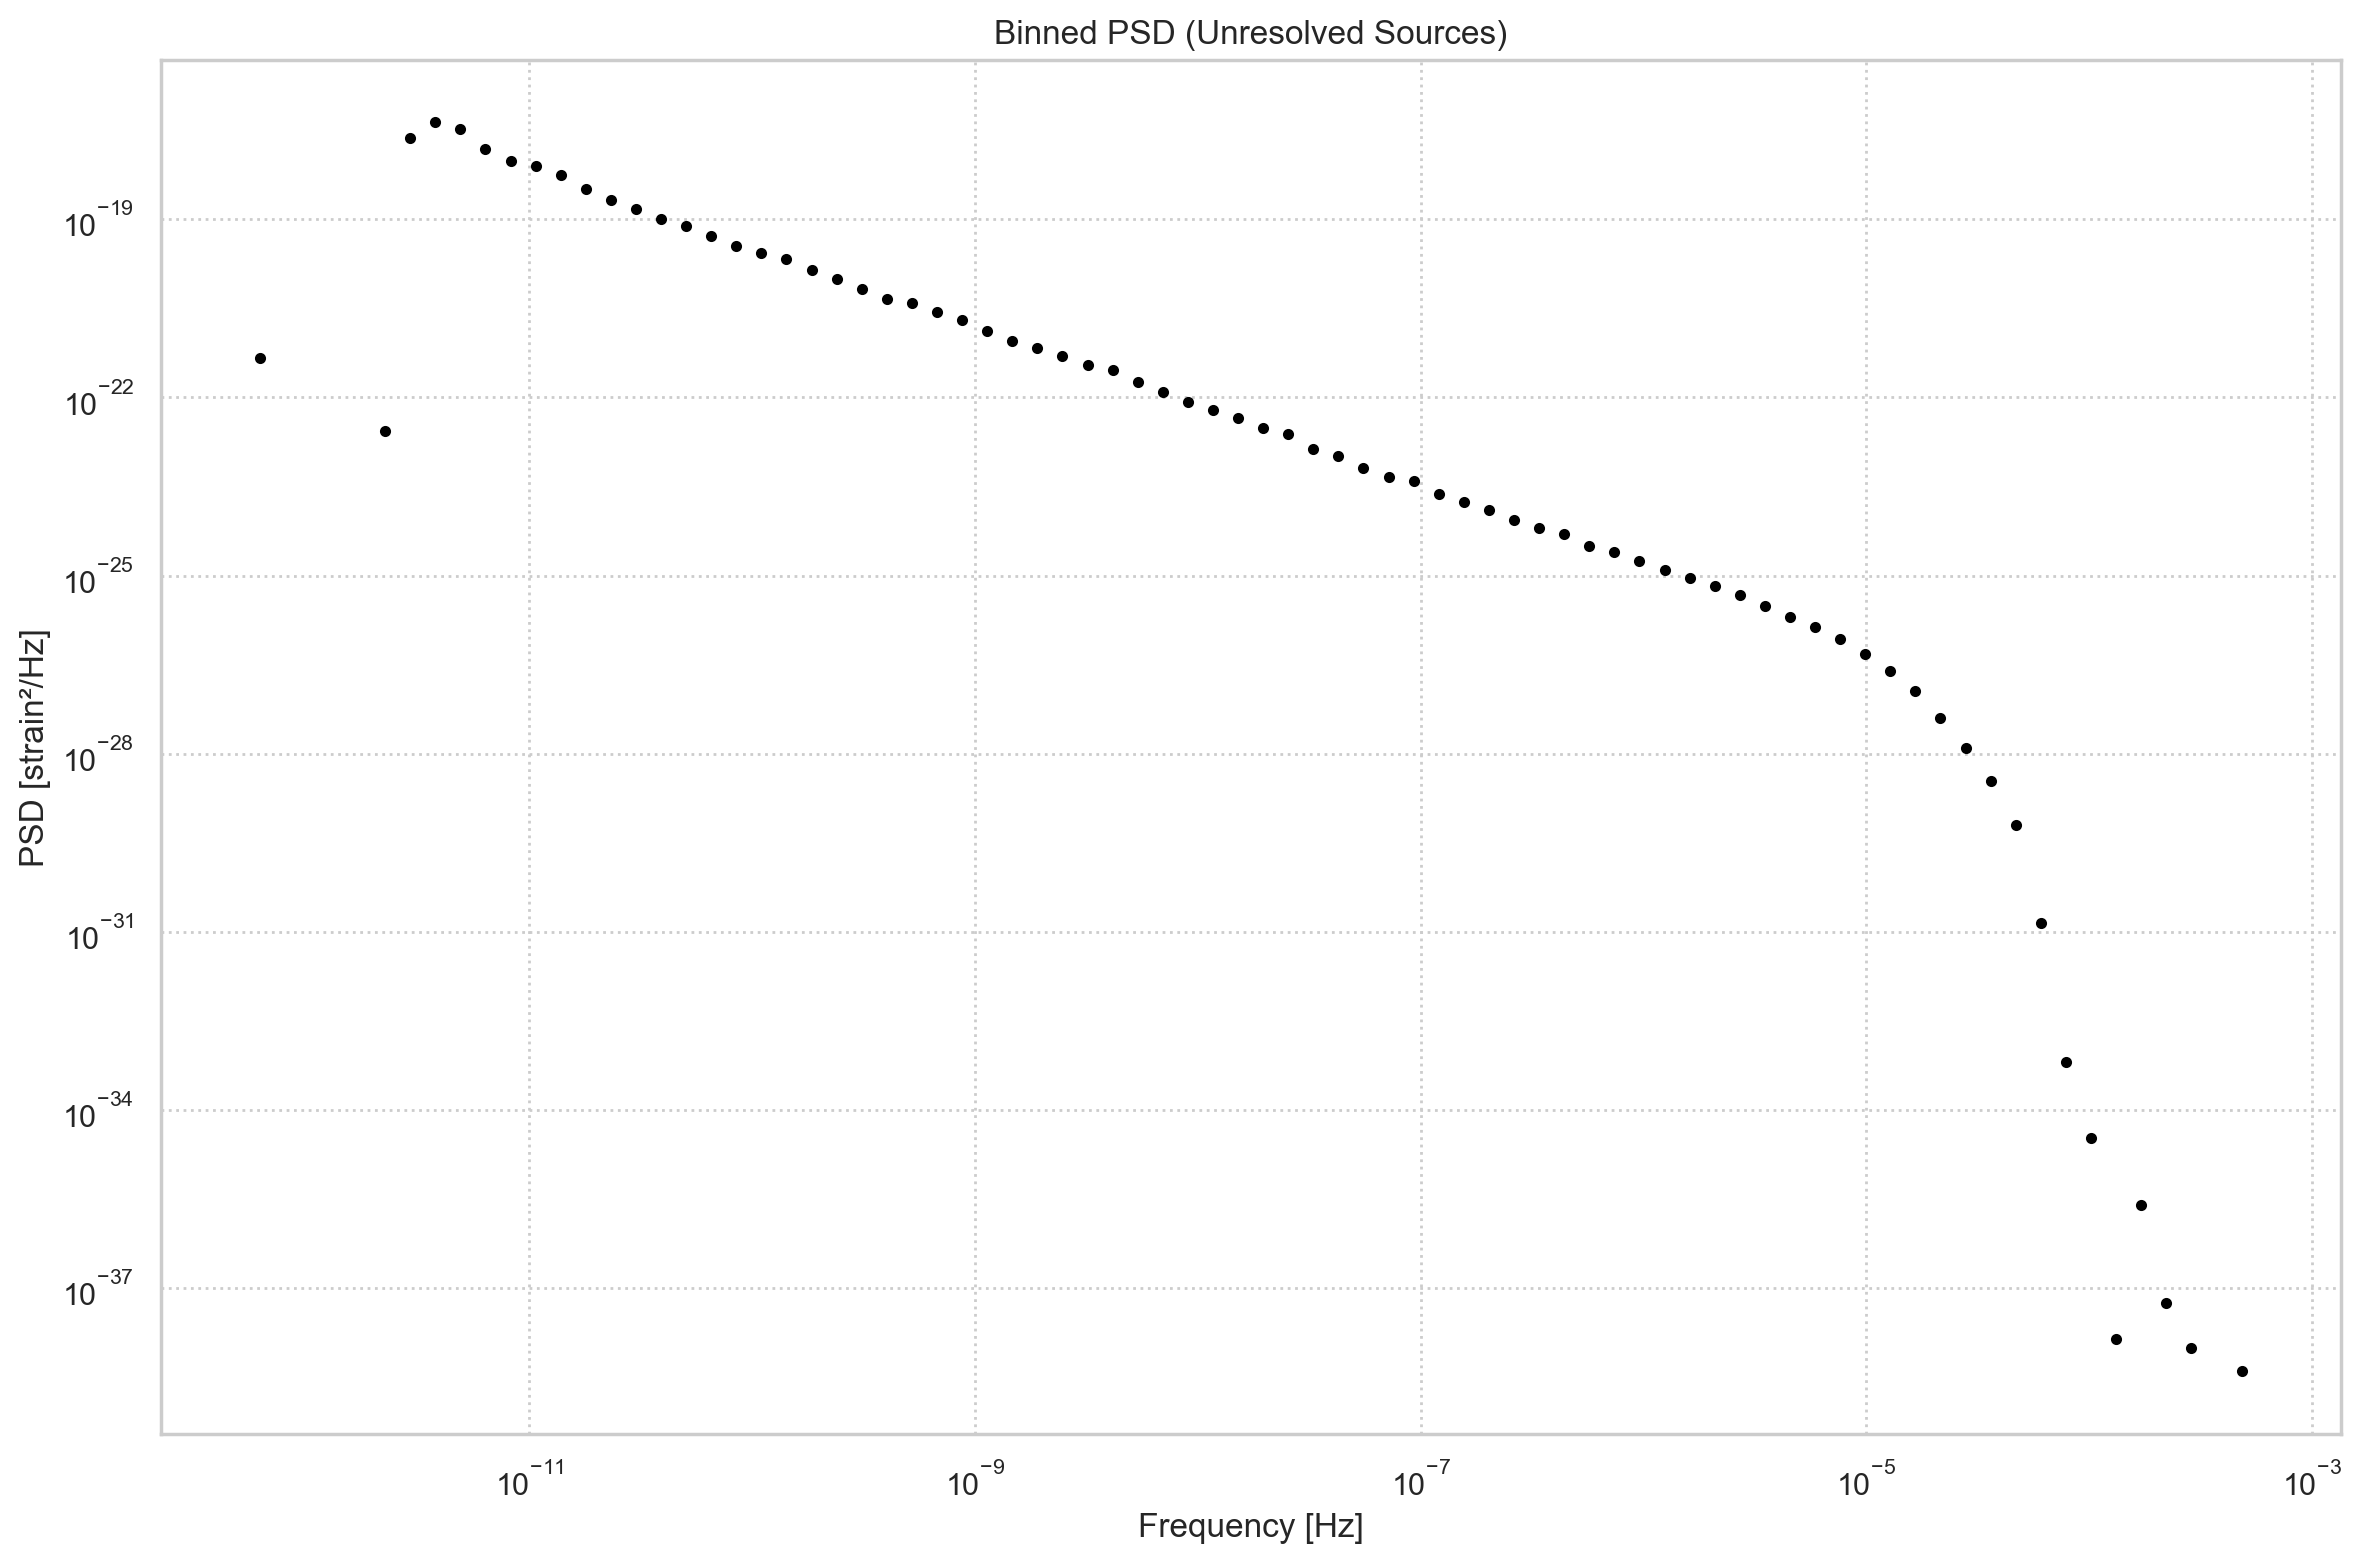

In [29]:
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(g1010_0021, dist_1010_0021)

## G1110 - 014

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 9970268 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	5454334 sources are stationary
		2748010 sources are stationary and circular
		2706324 sources are stationary and eccentric
	4515934 sources are evolving
		4515934 sources are evolving and circular


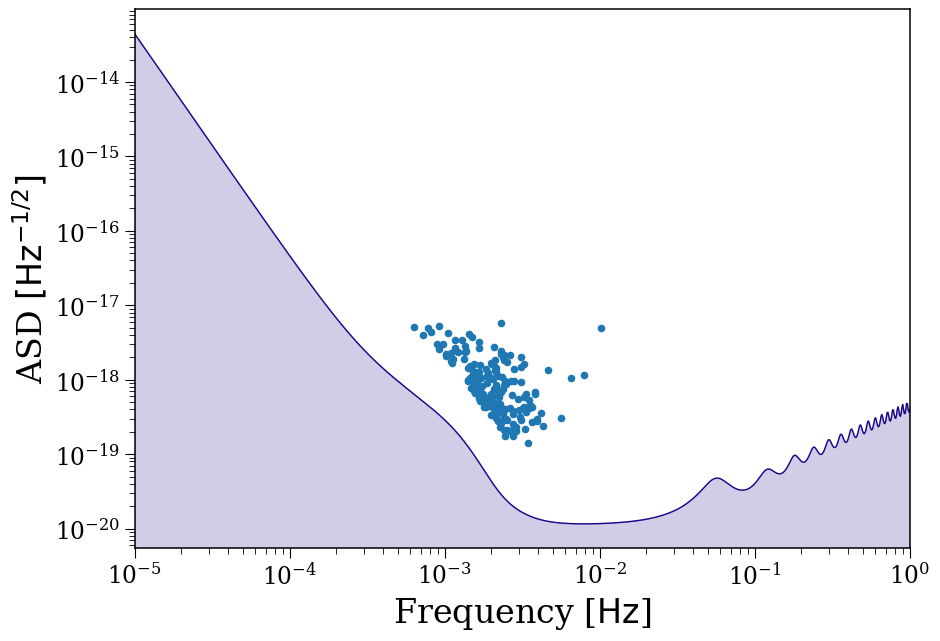

In [7]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1110_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1110_014_merged.parquet")

# Extract parameters from COSMIC output
m_1_1110_014 = g1110_014['mass_1'].values * u.Msun
m_2_1110_014 = g1110_014['mass_2'].values * u.Msun
f_orb_1110_014 = (1 / (g1110_014['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1110_014 = g1110_014['ecc'].values

# Simulate distance spread across galaxy
dist_1110_014 = (((g1110_014['x_kpc'])**2 + (g1110_014['y_kpc'])**2 + (g1110_014['z_kpc'])**2)**(0.5)).values * u.kpc
s_1110_014 = source.Source(m_1=m_1_1110_014, m_2=m_2_1110_014, ecc=ecc_1110_014, dist=dist_1110_014, f_orb=f_orb_1110_014)

snr = s_1110_014.get_snr(verbose=True)
fig, ax = s_1110_014.plot_sources_on_sc(snr_cutoff=7)
#plt.savefig(f"/Users/neelpanchal/extracted_data/LISA-cutoff_{galaxy_name}.png", dpi=500, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


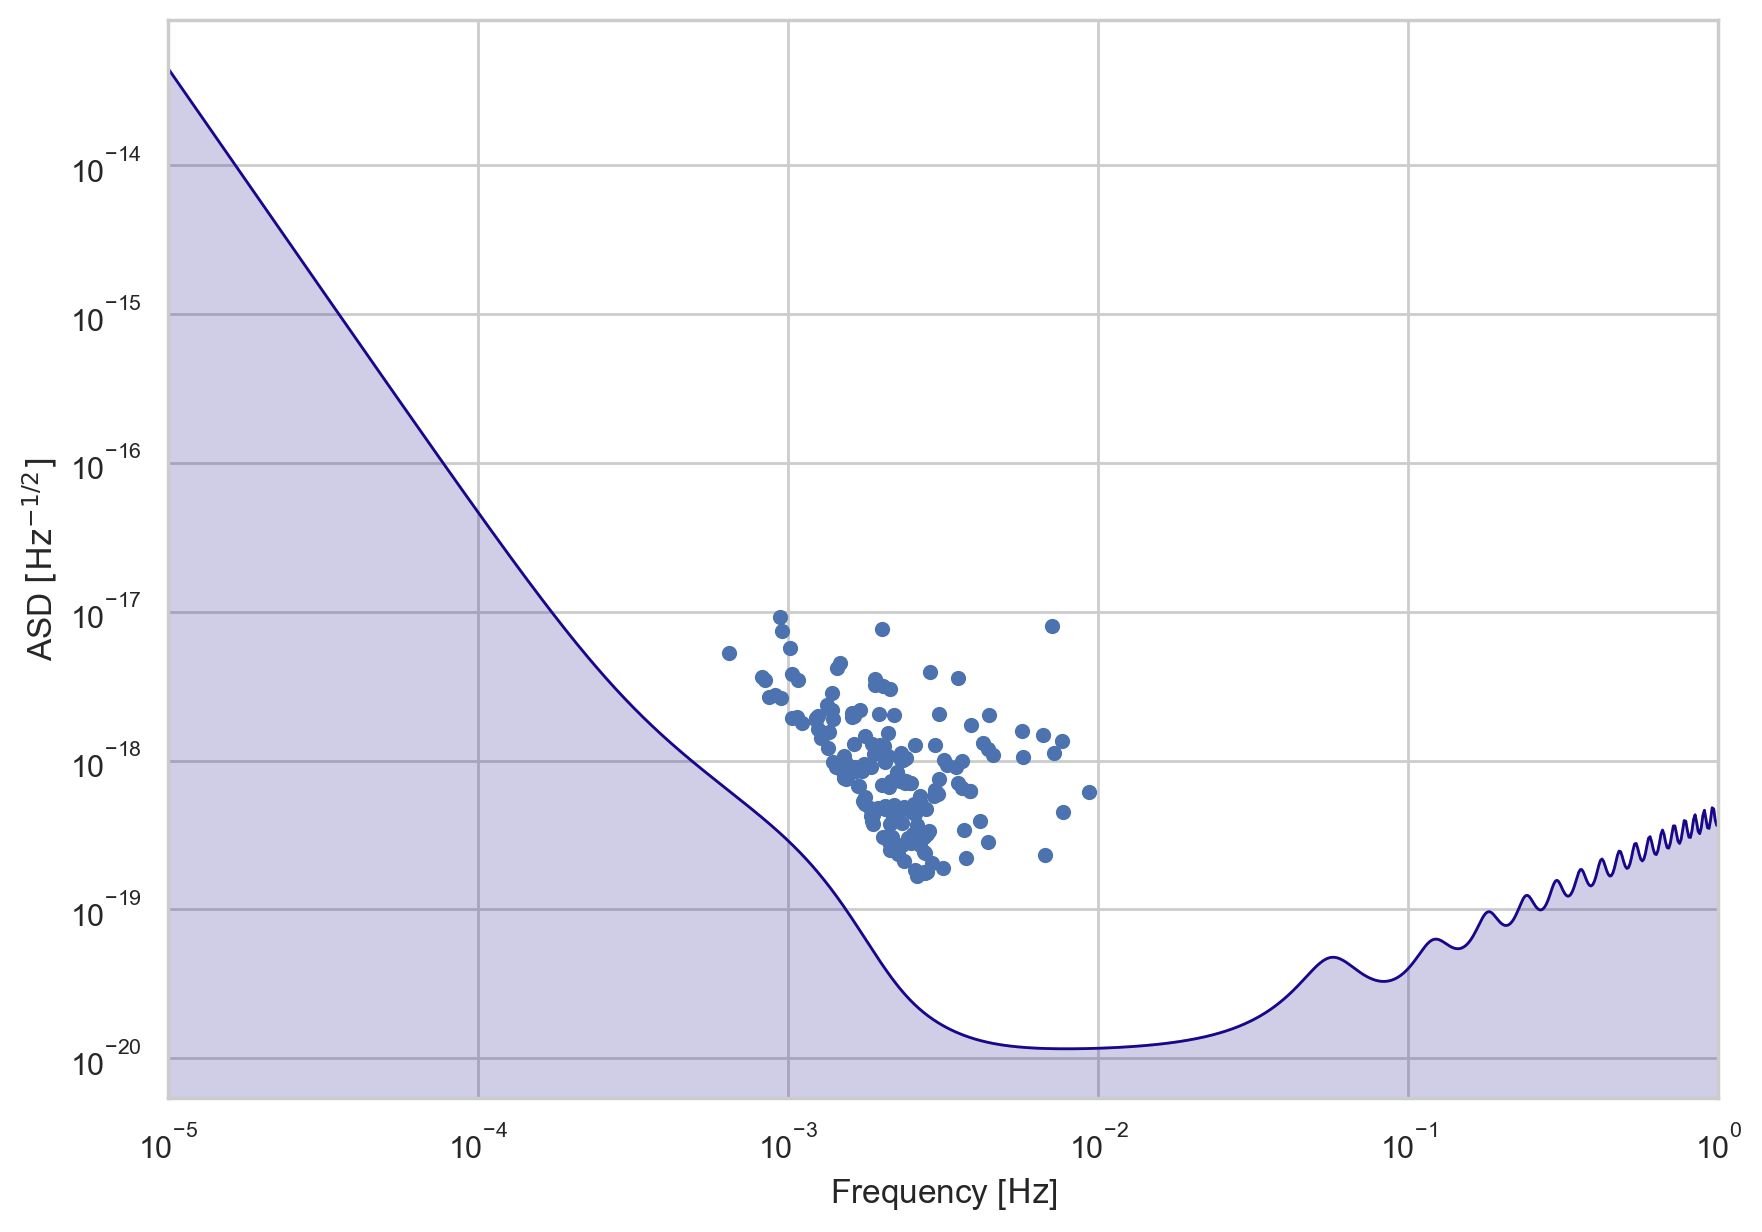

In [25]:
fig, ax = s_1010_014.plot_sources_on_sc(snr_cutoff=7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


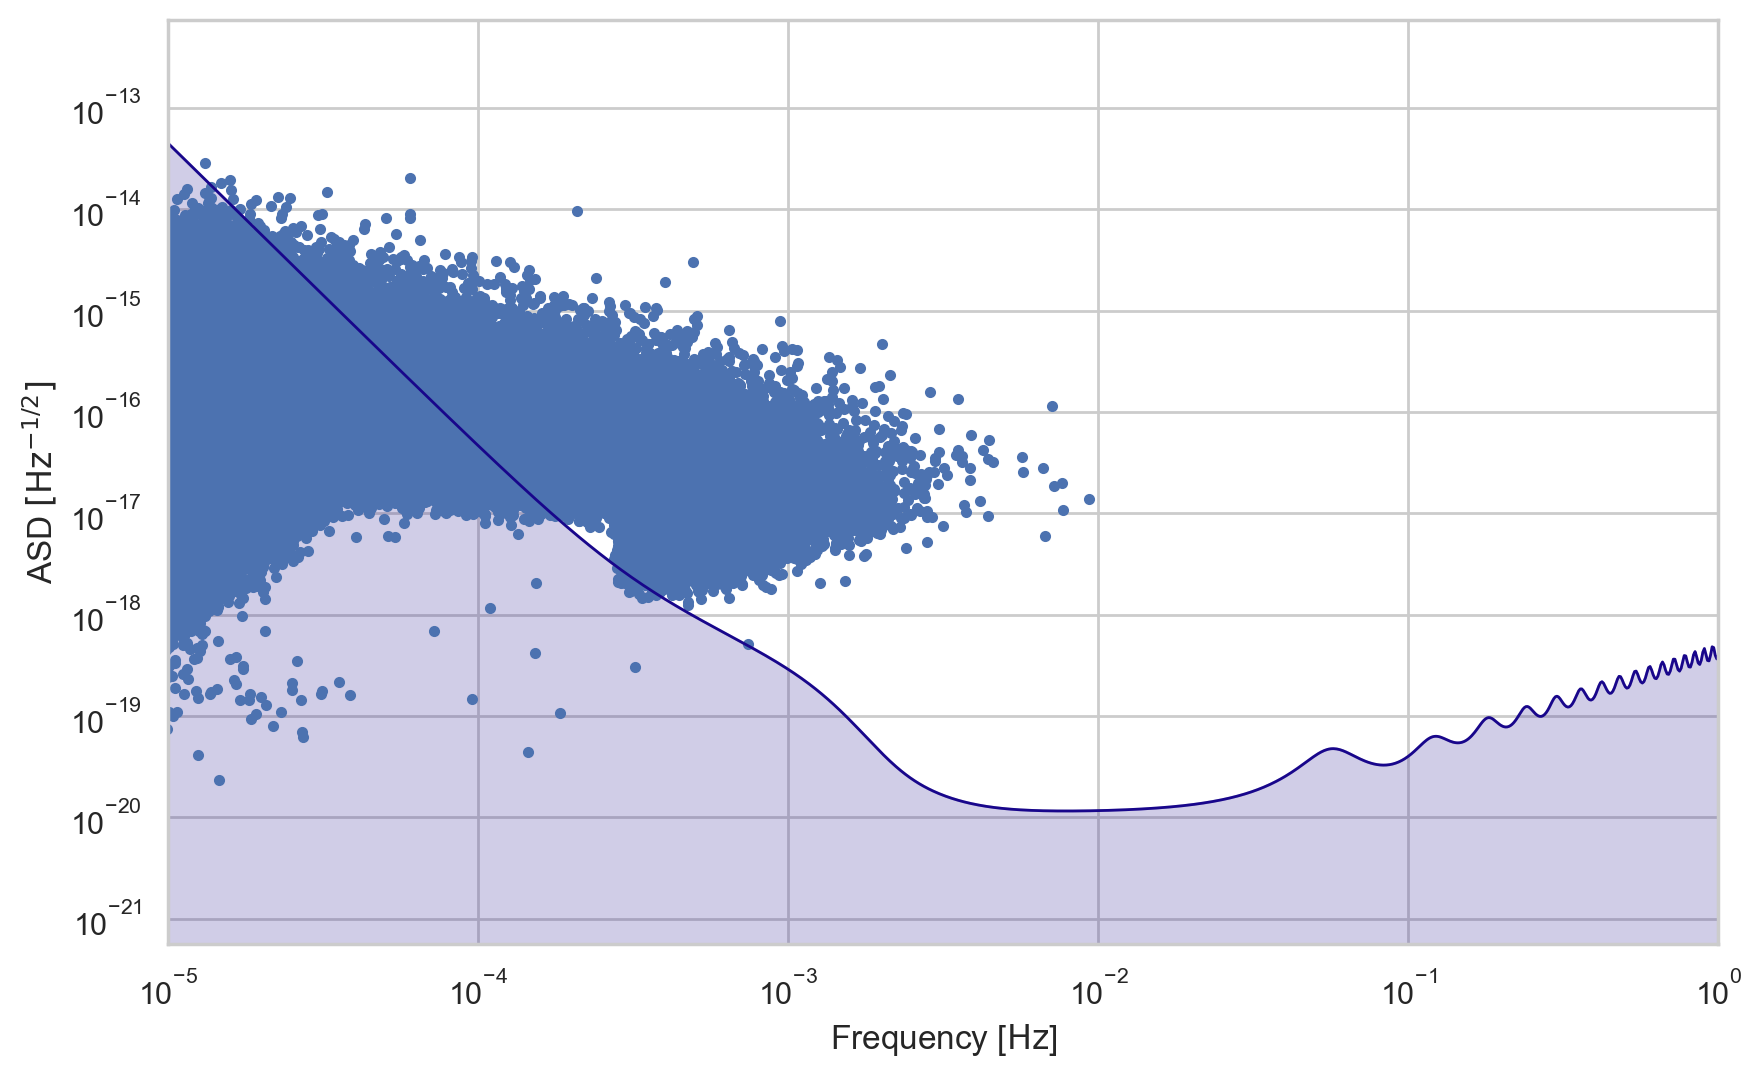

<Figure size 1200x800 with 0 Axes>

In [177]:
from legwork import strain
import legwork.visualisation as visualisation
import matplotlib.pyplot as plt
import seaborn as sns
f_gw_1110_014 = 2 * f_orb_1110_014

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1110_014 = chirp_mass(m_1_1110_014, m_2_1110_014)
h_c_1110_014 = strain.h_c_n(
    m_c=m_c_1110_014,
    f_orb=f_orb_1110_014,
    ecc=ecc_1110_014,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1110_014
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw.value, h_c, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1110_014")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

## Fitting Model Cornish - g1110_014

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


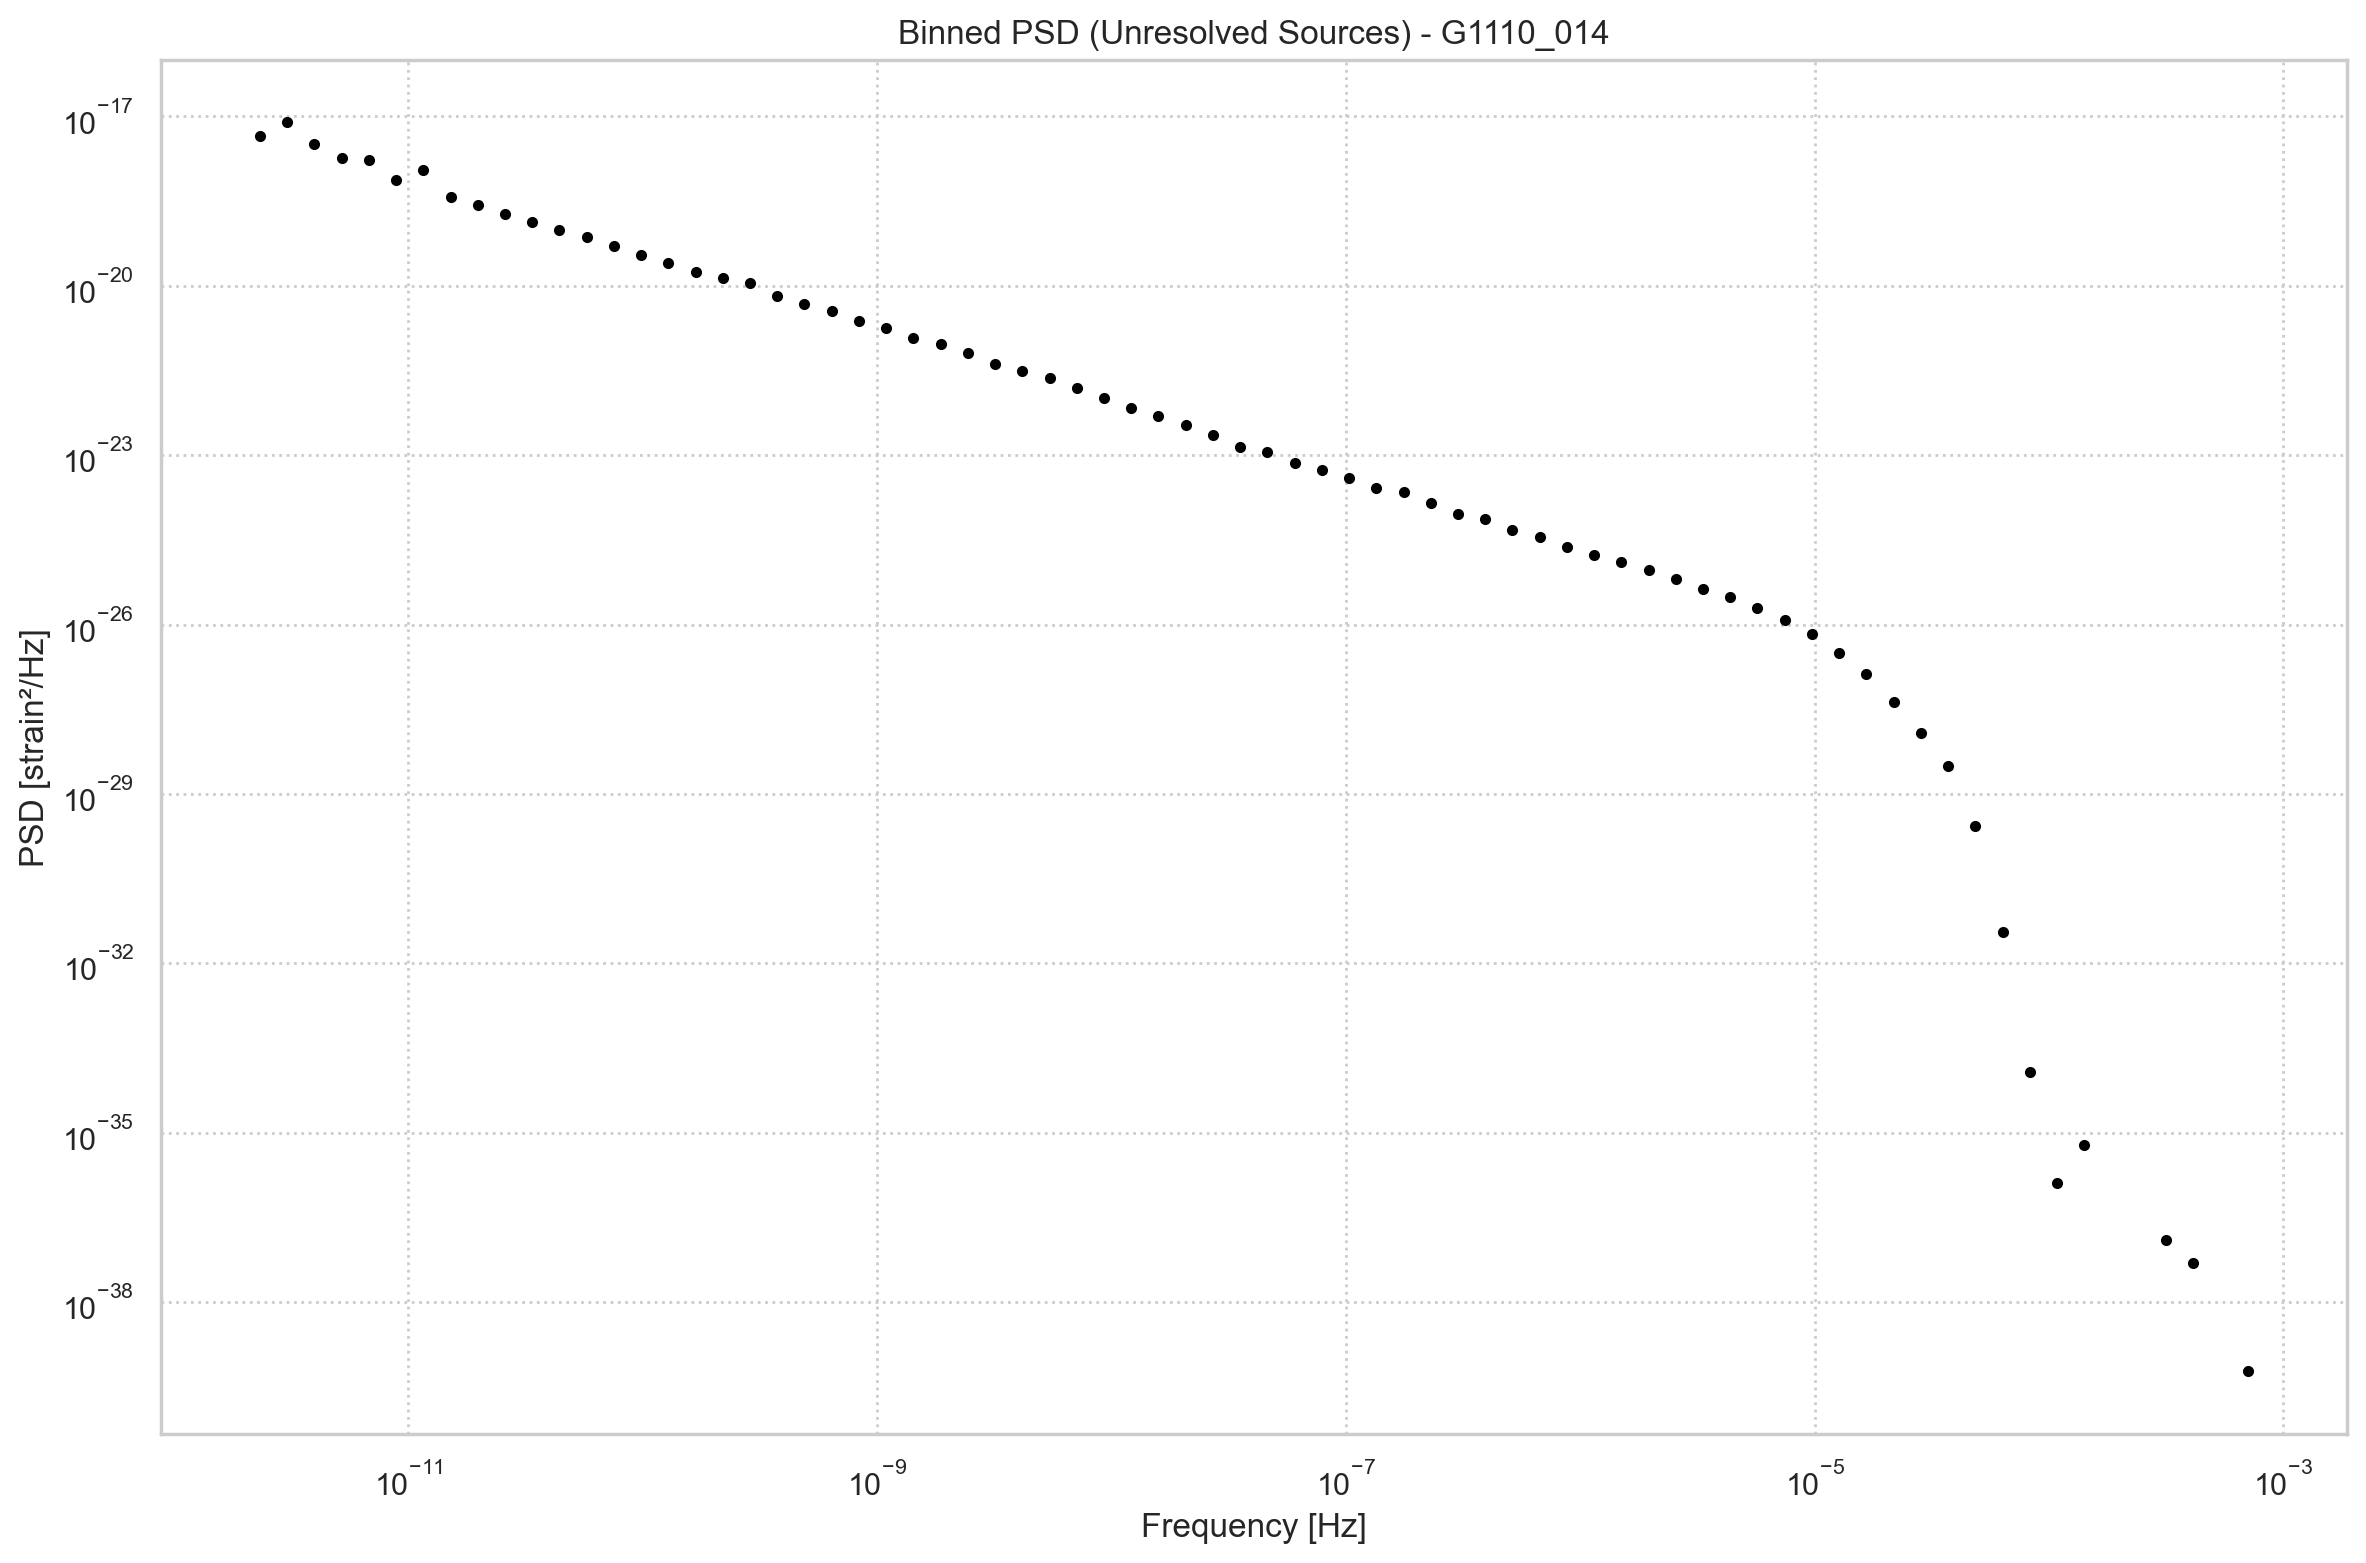

In [49]:
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(g1110_014, dist_1110_014, galaxy_name = "G1110_014")

## G1110 - 0021

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 9812049 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	4898250 sources are stationary
		2556471 sources are stationary and circular
		2341779 sources are stationary and eccentric
	4913799 sources are evolving
		4913799 sources are evolving and circular


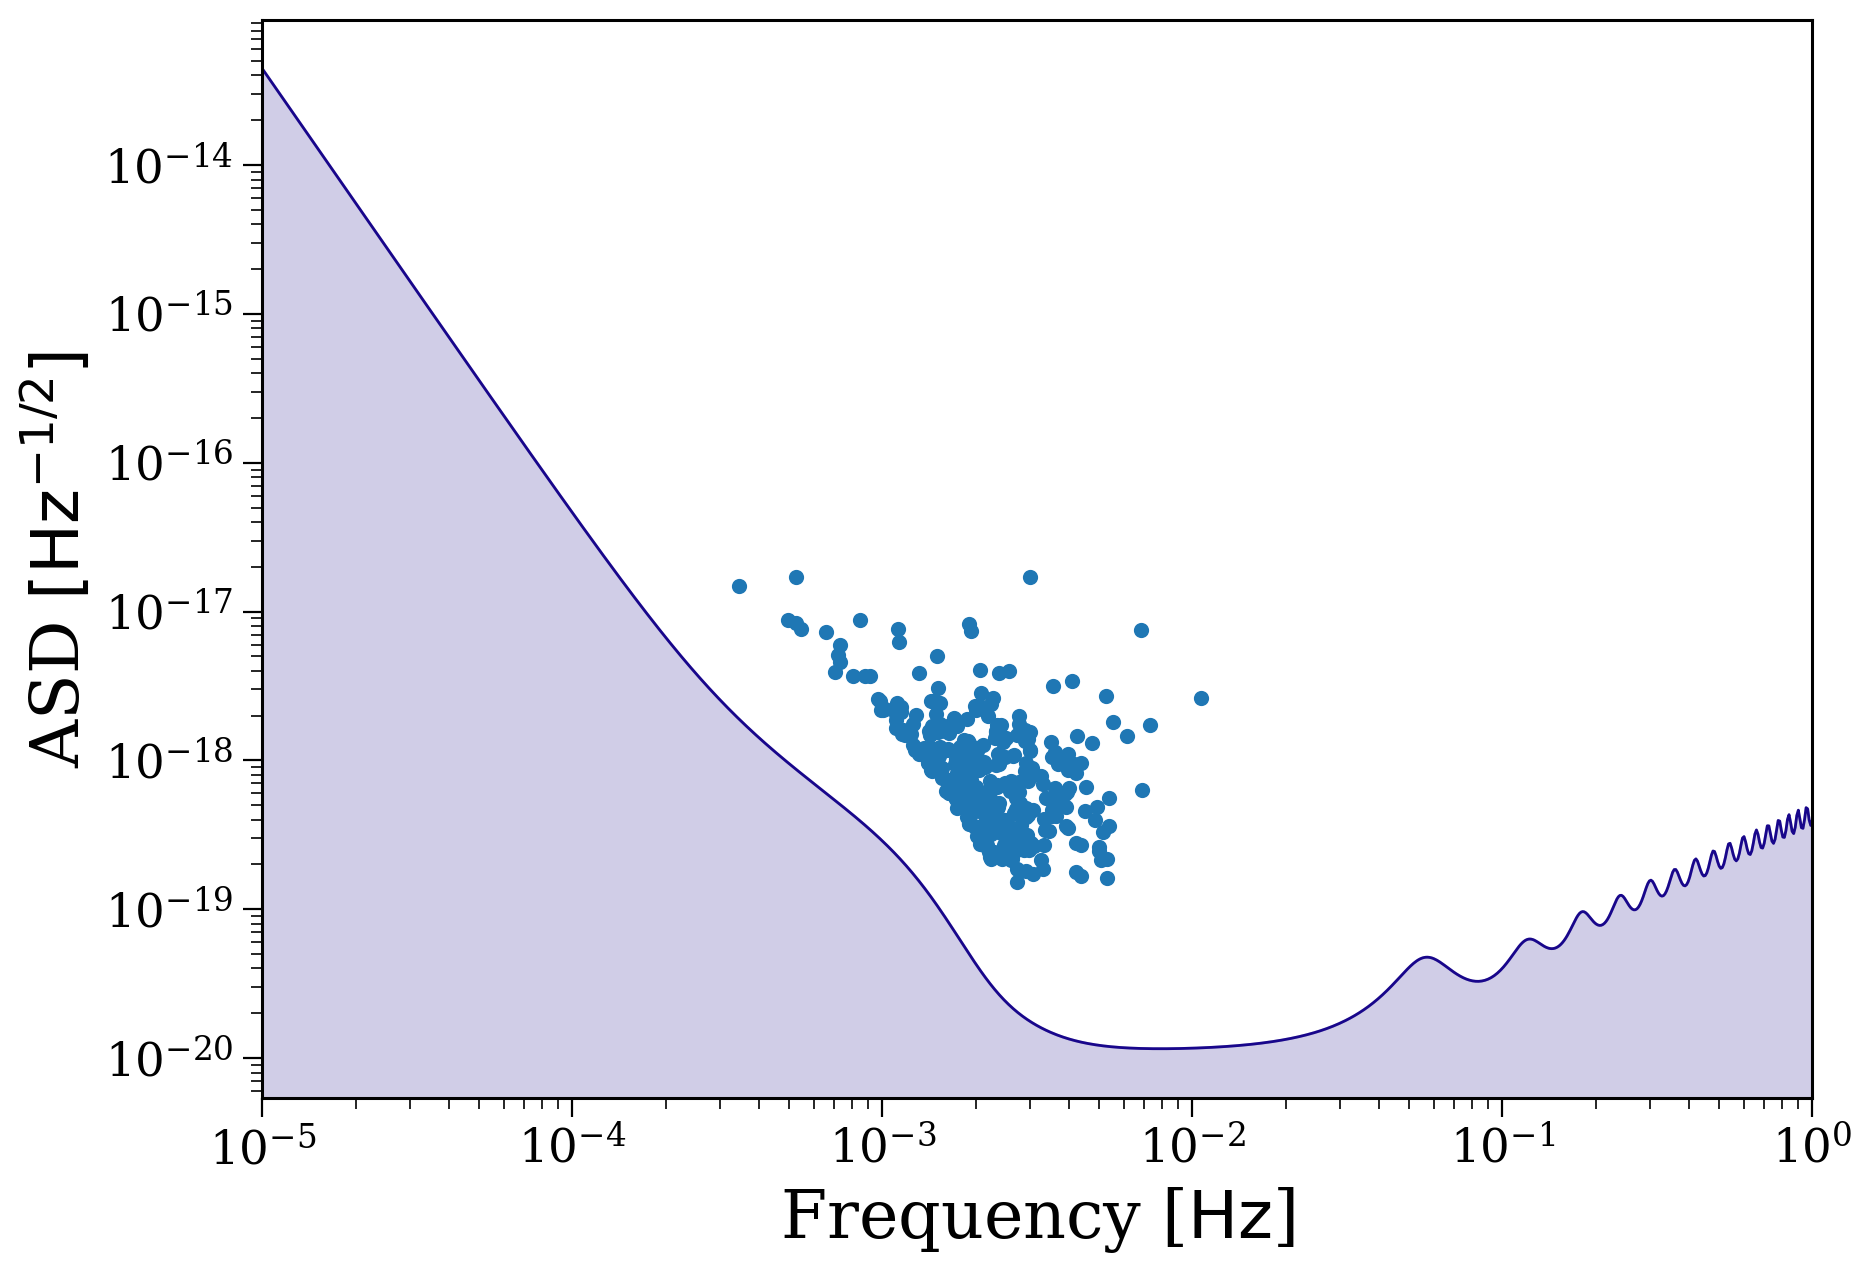

In [13]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1110_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1110_0021_merged.parquet")

# Extract parameters from COSMIC output
m_1_1110_0021 = g1110_0021['mass_1'].values * u.Msun
m_2_1110_0021 = g1110_0021['mass_2'].values * u.Msun
f_orb_1110_0021 = (1 / (g1110_0021['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1110_0021 = g1110_0021['ecc'].values

# Simulate distance spread across galaxy
dist_1110_0021 = (((g1110_0021['x_kpc'])**2 + (g1110_0021['y_kpc'])**2 + (g1110_0021['z_kpc'])**2)**(0.5)).values * u.kpc
s_1110_0021 = source.Source(m_1=m_1_1110_0021, m_2=m_2_1110_0021, ecc=ecc_1110_0021, dist=dist_1110_0021, f_orb=f_orb_1110_0021)
snr = s_1110_0021.get_snr(verbose=True)
fig, ax = s_1110_0021.plot_sources_on_sc(snr_cutoff=7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


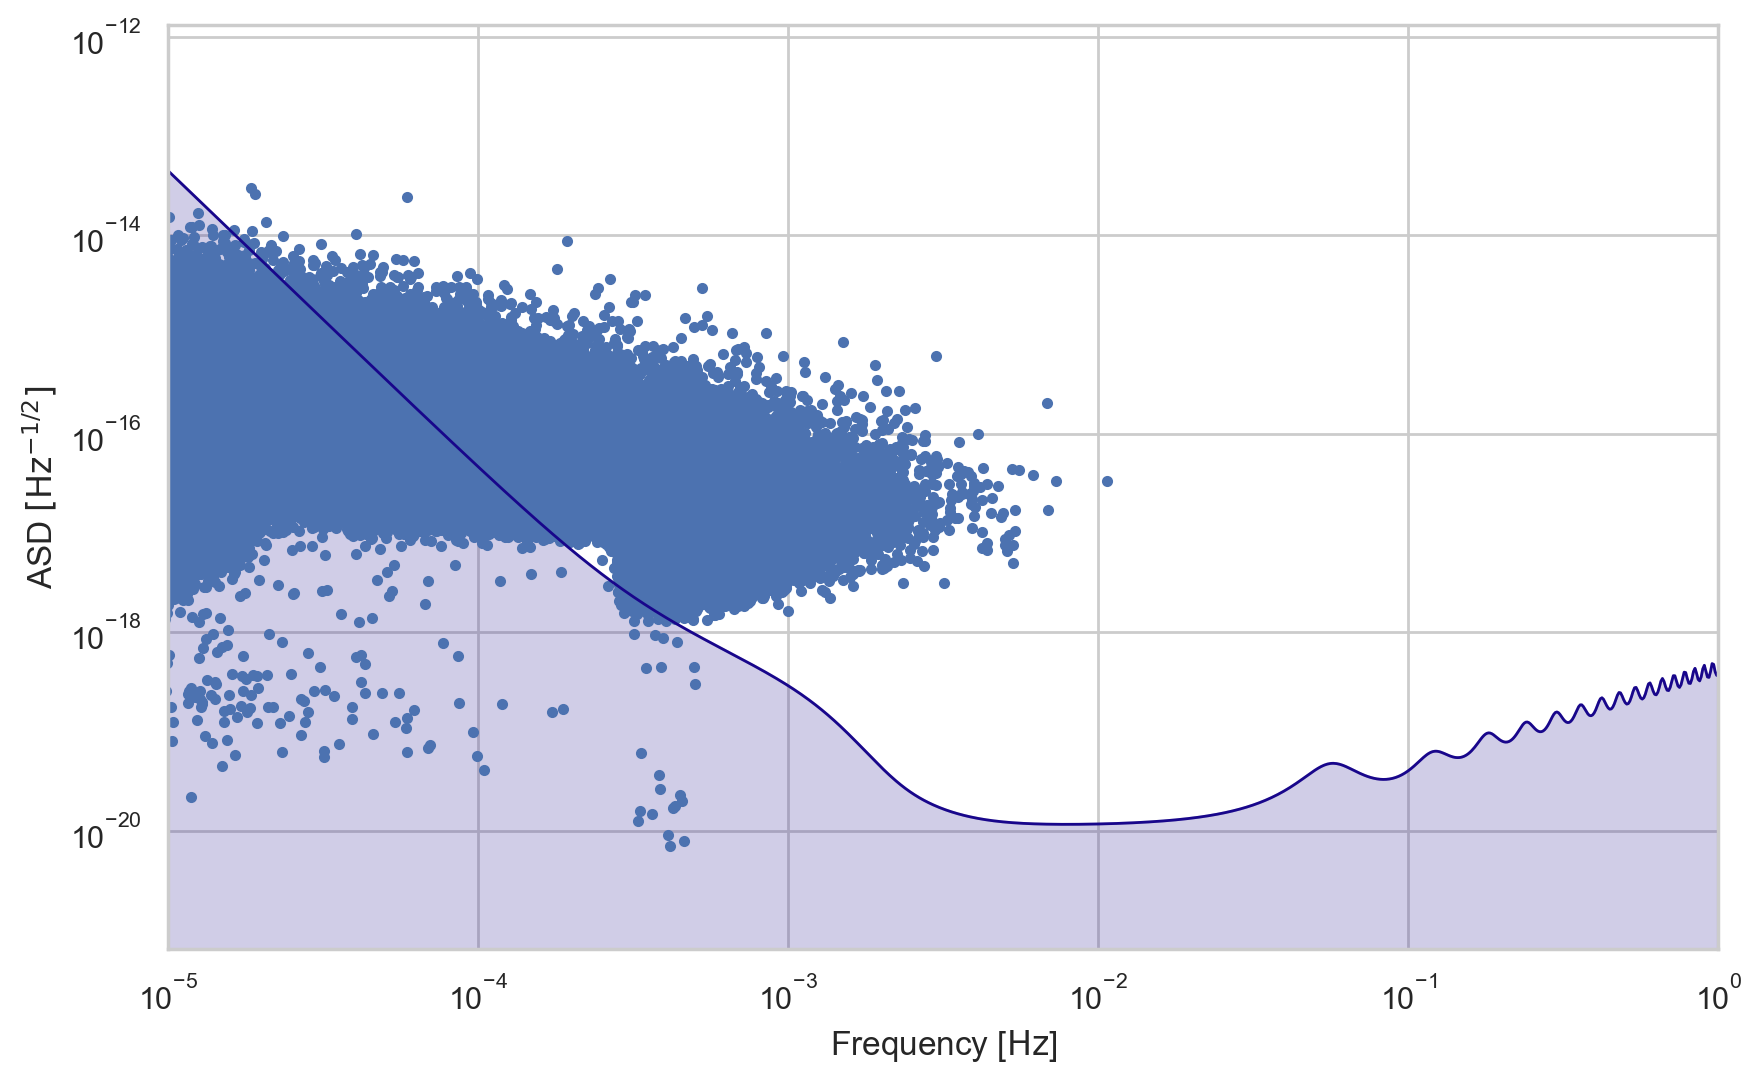

<Figure size 1200x800 with 0 Axes>

In [15]:
from legwork import strain
import legwork.visualisation as visualisation
import matplotlib.pyplot as plt
import seaborn as sns
f_gw_1110_0021 = 2 * f_orb_1110_0021

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1110_0021 = chirp_mass(m_1_1110_0021, m_2_1110_0021)
h_c_1110_0021 = strain.h_c_n(
    m_c=m_c_1110_0021,
    f_orb=f_orb_1110_0021,
    ecc=ecc_1110_0021,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1110_0021
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw_1110_0021.value, h_c_1110_0021, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1110_0021")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

# Fitting Model - Cornish - G1110_0021

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


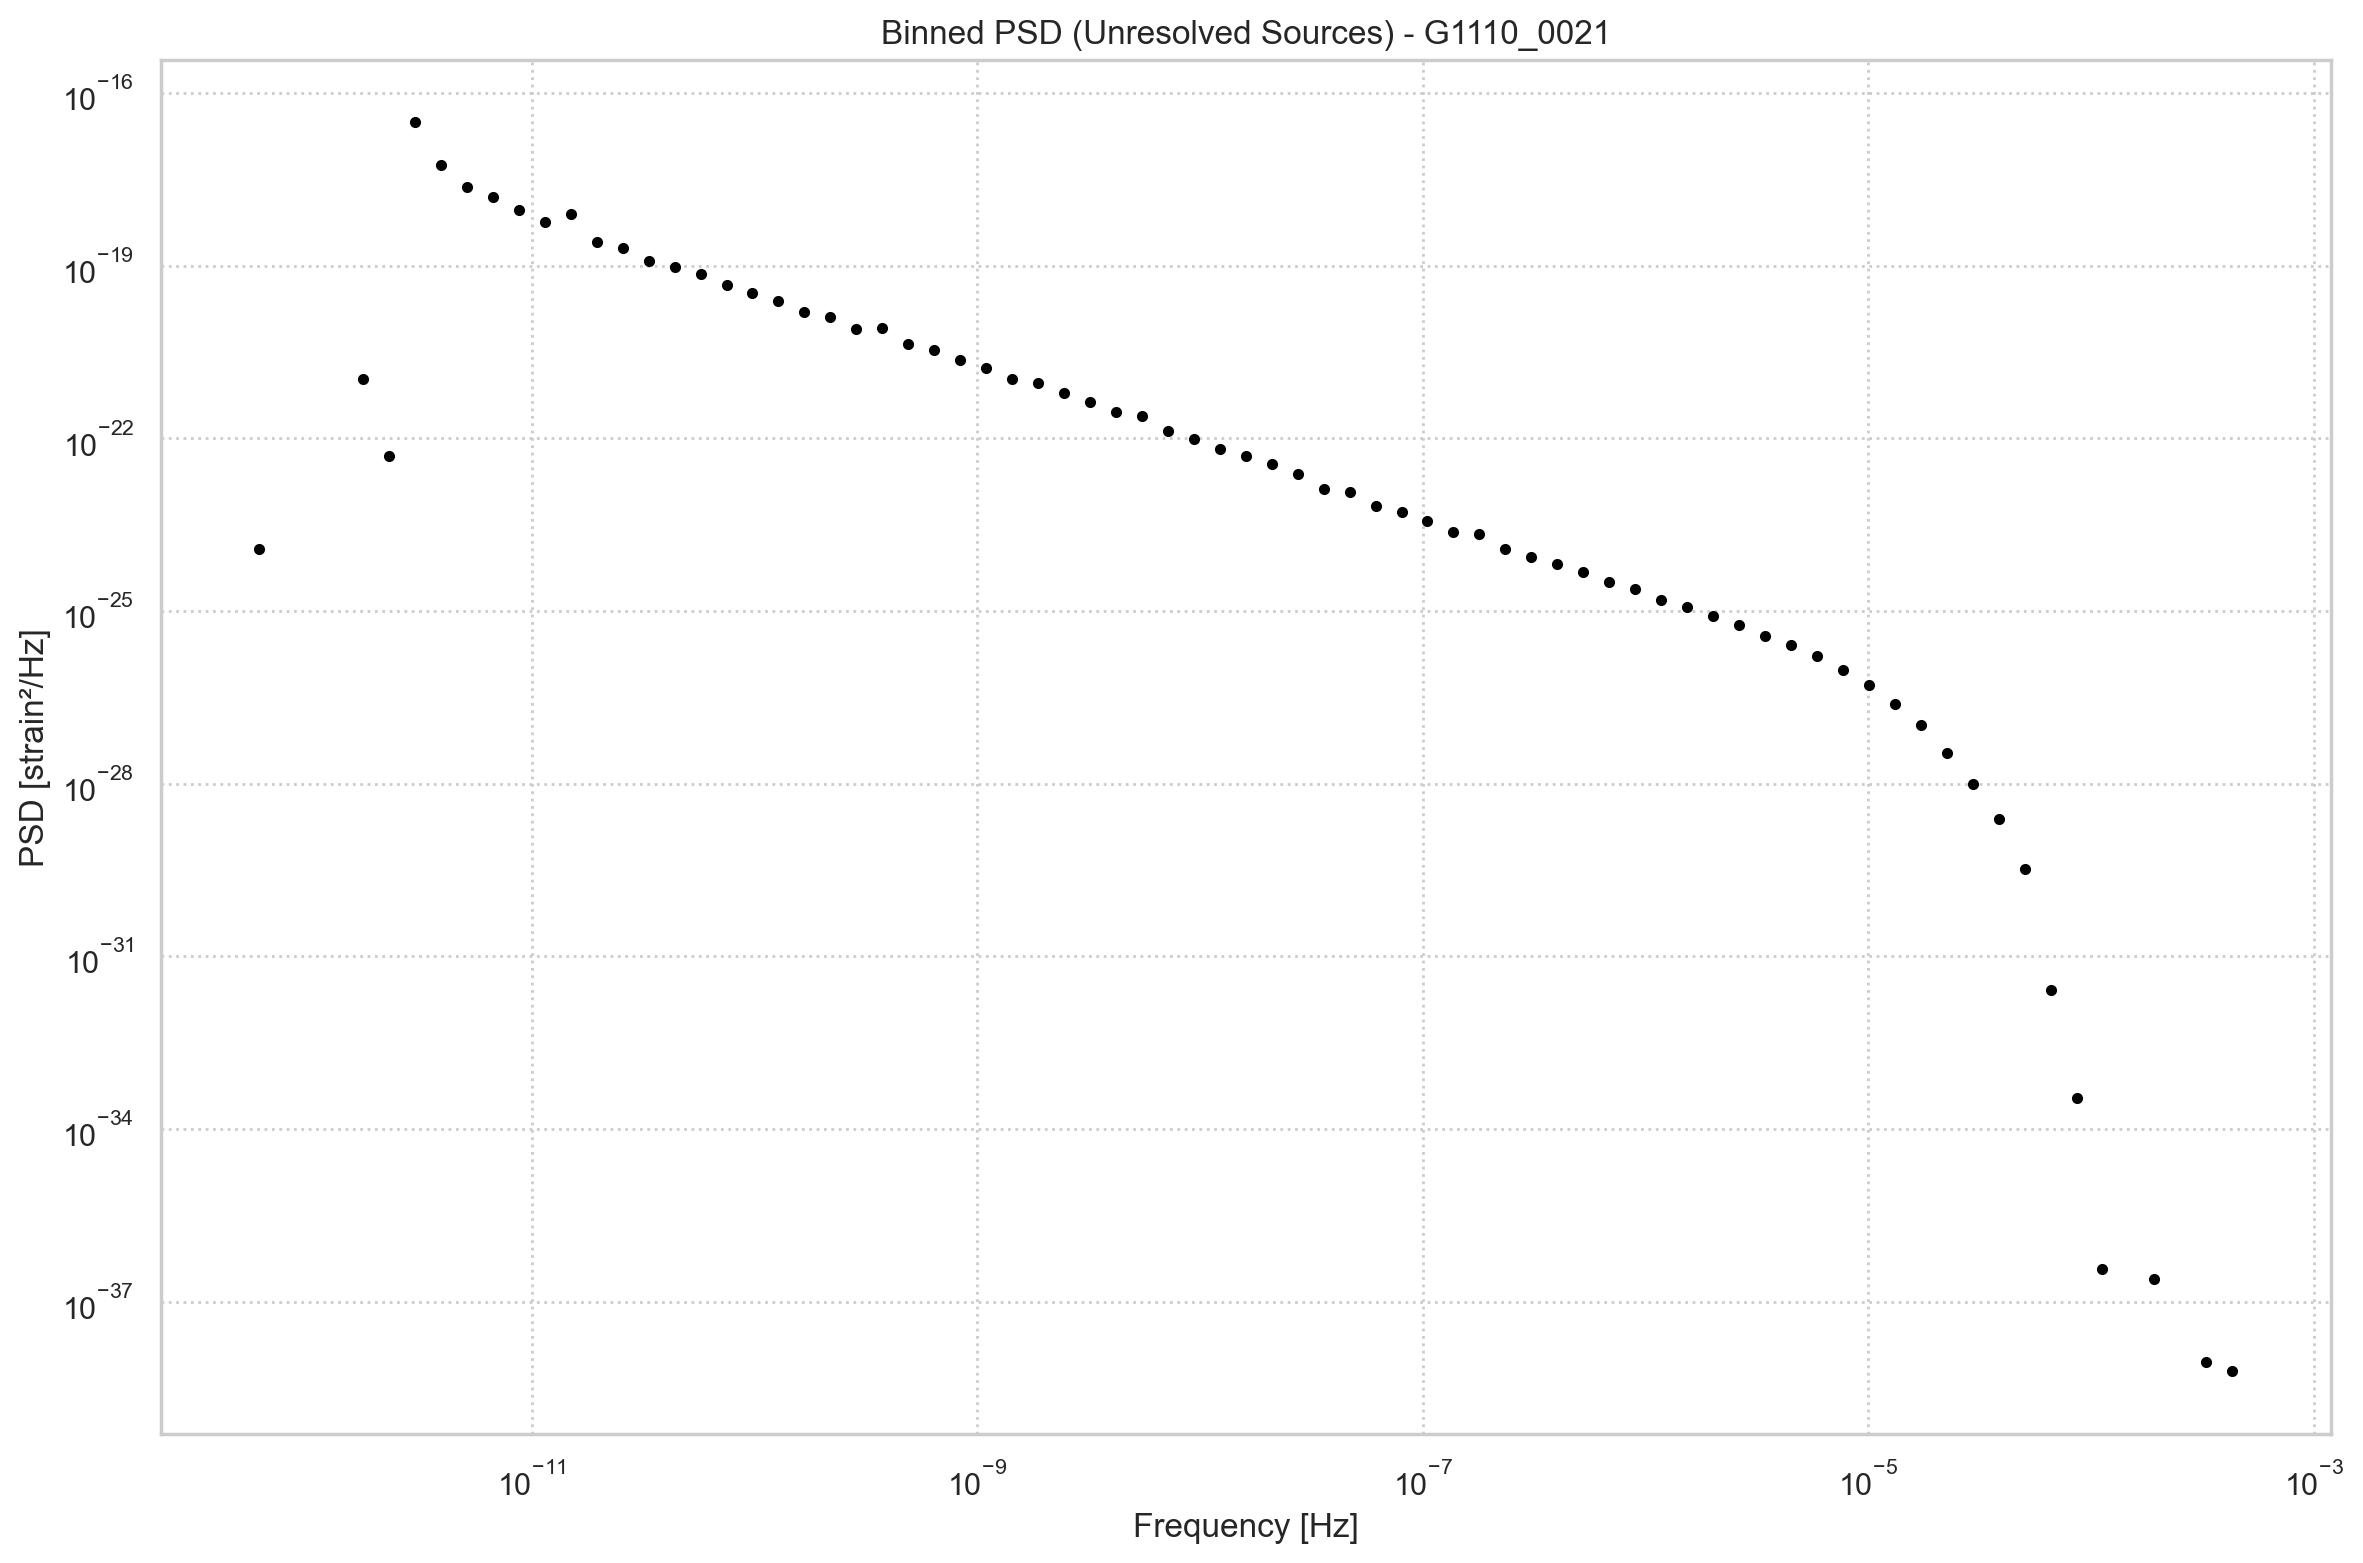

In [20]:
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(g1110_0021, dist_1110_0021, galaxy_name = "G1110_0021")

## G1111 - 014

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 9759505 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	4186491 sources are stationary
		2252502 sources are stationary and circular
		1933989 sources are stationary and eccentric
	5573014 sources are evolving
		5573014 sources are evolving and circular


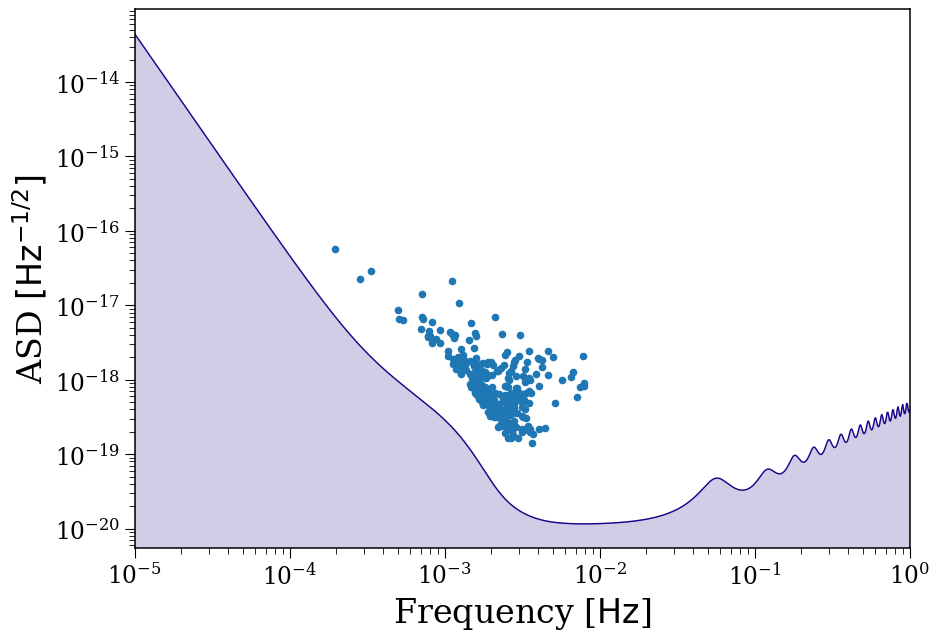

In [9]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1111_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1111_014_merged.parquet")

# Extract parameters from COSMIC output
m_1_1111_014 = g1111_014['mass_1'].values * u.Msun
m_2_1111_014 = g1111_014['mass_2'].values * u.Msun
f_orb_1111_014 = (1 / (g1111_014['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1111_014 = g1111_014['ecc'].values

# Simulate distance spread across galaxy
dist_1111_014 = (((g1111_014['x_kpc'])**2 + (g1111_014['y_kpc'])**2 + (g1111_014['z_kpc'])**2)**(0.5)).values * u.kpc
s_1111_014 = source.Source(m_1=m_1_1111_014, m_2=m_2_1111_014, ecc=ecc_1111_014, dist=dist_1111_014, f_orb=f_orb_1111_014)
snr = s_1111_014.get_snr(verbose=True)
fig, ax = s_1111_014.plot_sources_on_sc(snr_cutoff=7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


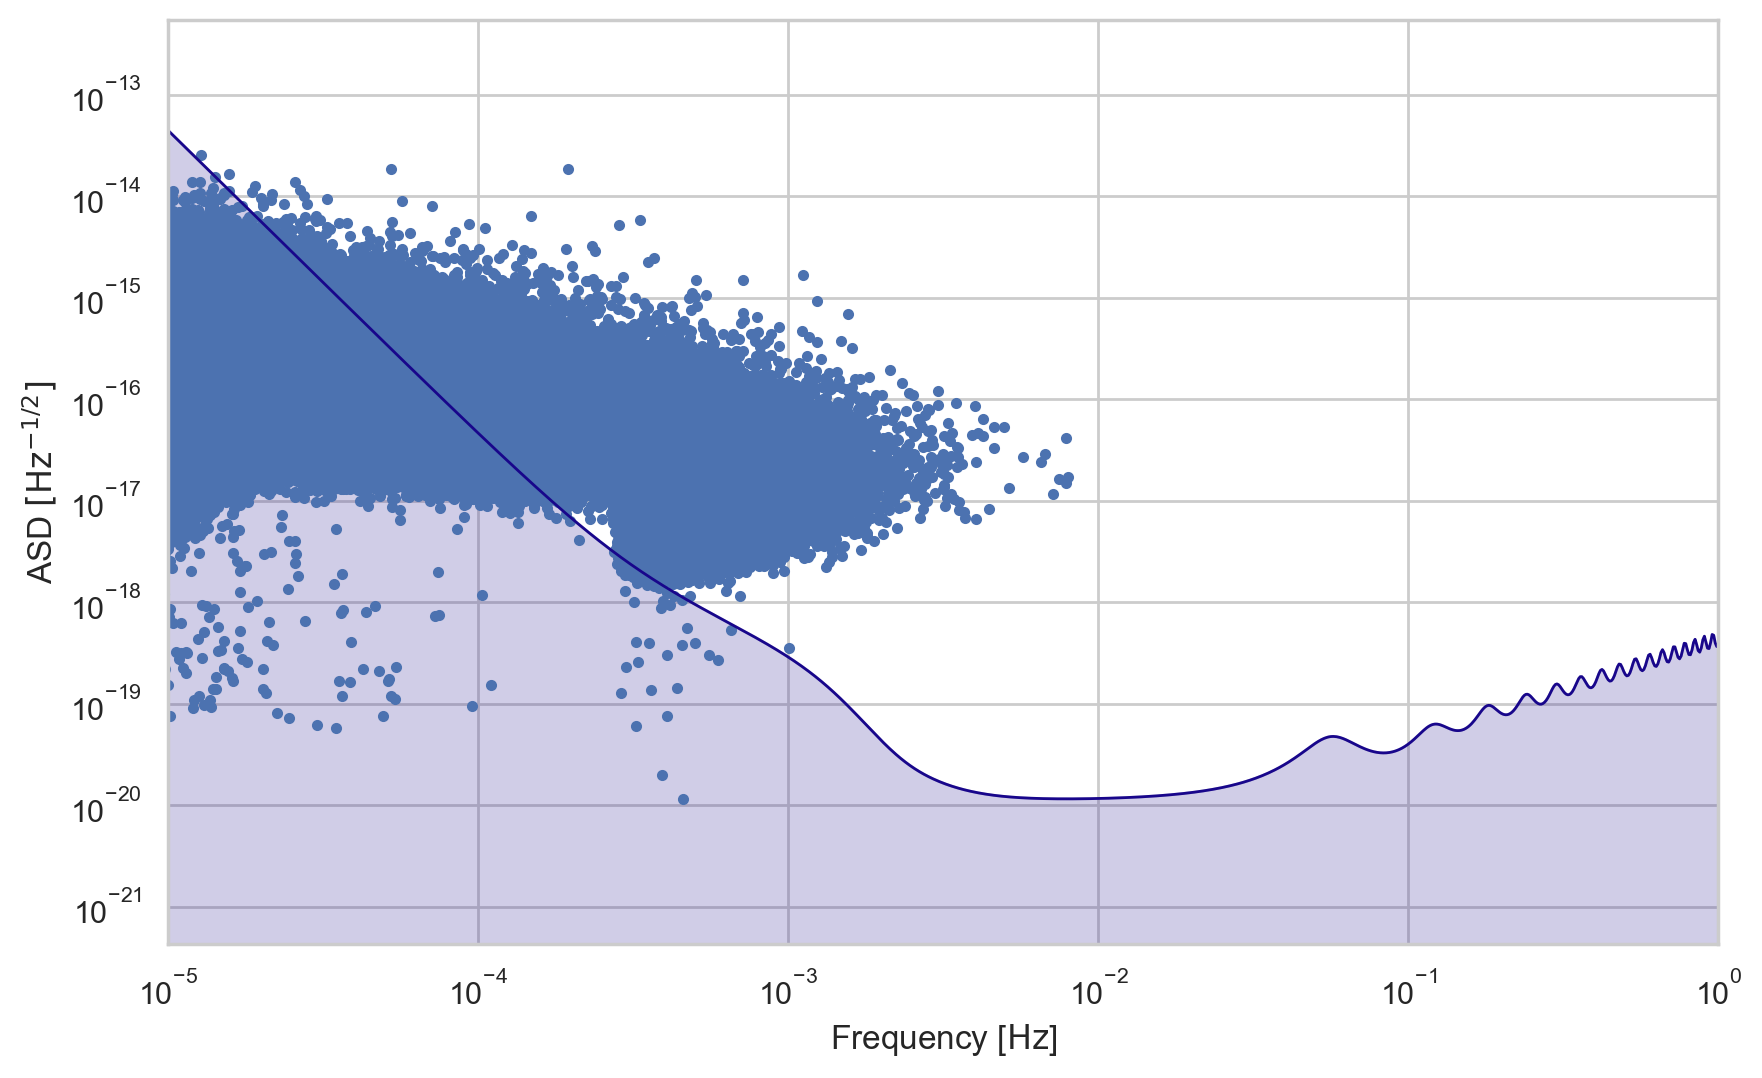

<Figure size 1200x800 with 0 Axes>

In [28]:
from legwork import strain
import legwork.visualisation as visualisation
import matplotlib.pyplot as plt
import seaborn as sns
f_gw_1111_014 = 2 * f_orb_1111_014

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1111_014 = chirp_mass(m_1_1111_014, m_2_1111_014)
h_c_1111_014 = strain.h_c_n(
    m_c=m_c_1111_014,
    f_orb=f_orb_1111_014,
    ecc=ecc_1111_014,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1111_014
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw_1111_014.value, h_c_1111_014, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1111_014")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


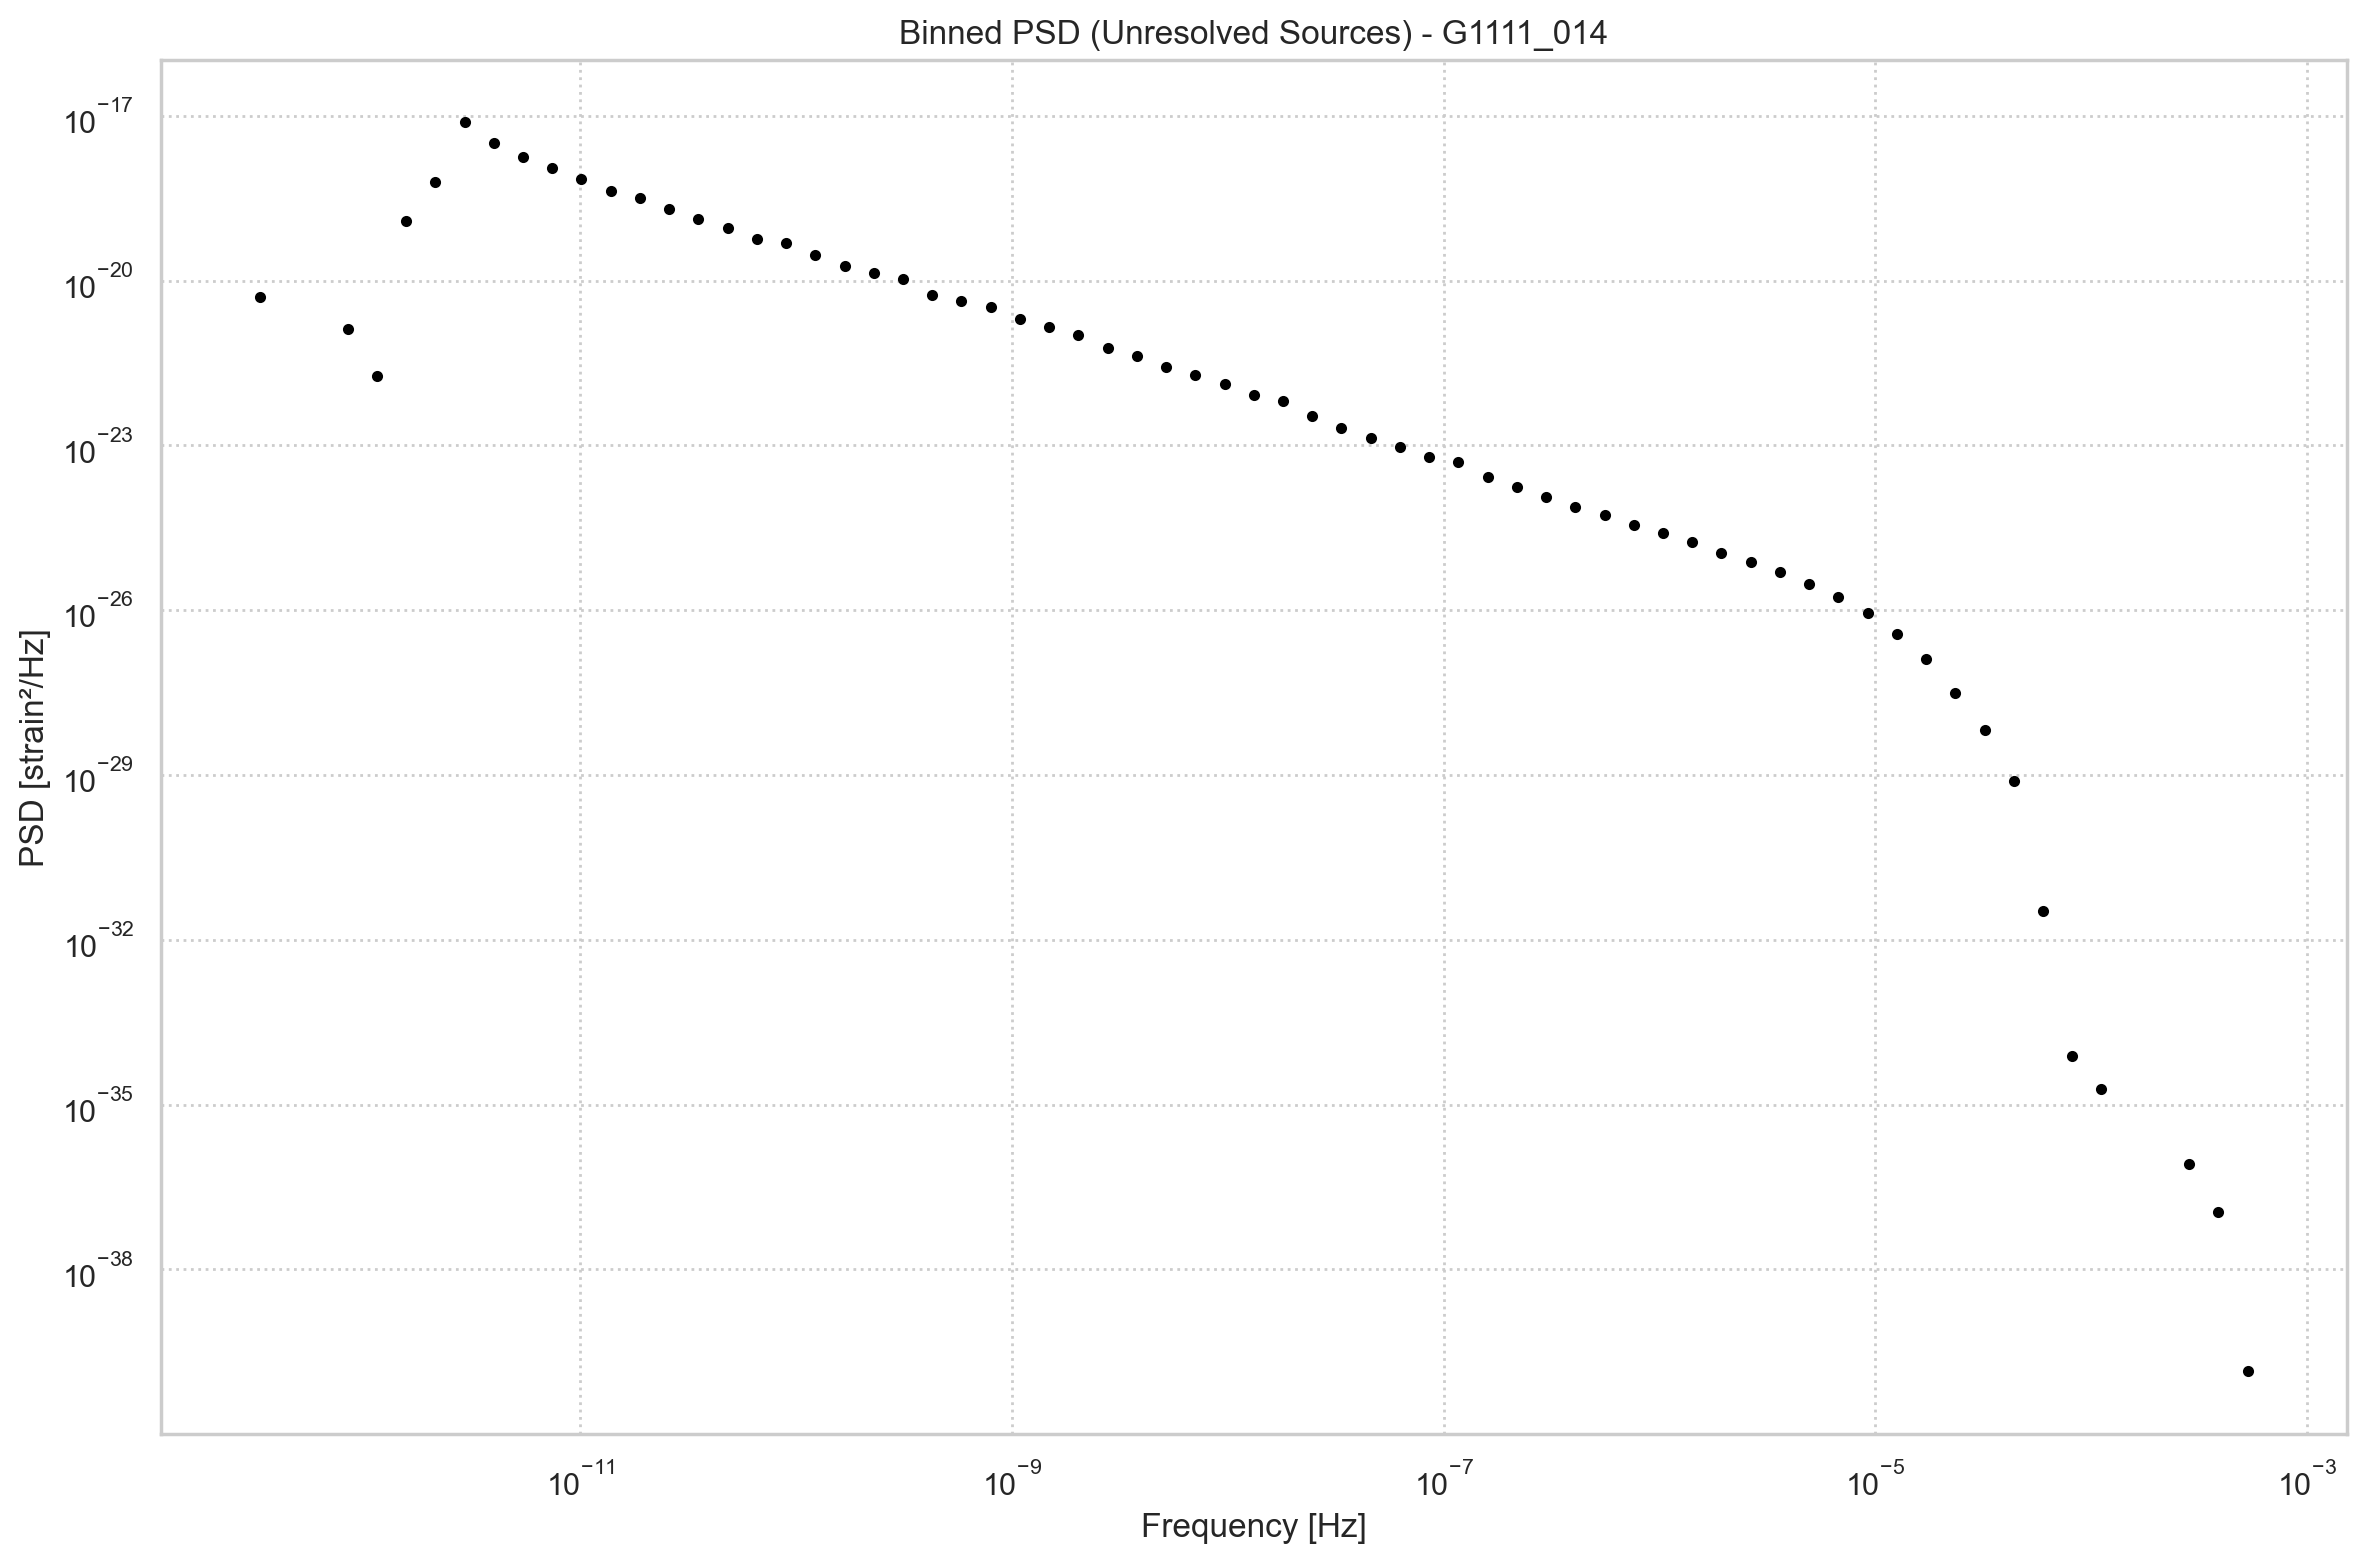

In [30]:
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(g1111_014, dist_1111_014, galaxy_name = "G1111_014")

## G1111 - 0021

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 9657244 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	3748245 sources are stationary
		2061295 sources are stationary and circular
		1686950 sources are stationary and eccentric
	5908999 sources are evolving
		5908999 sources are evolving and circular


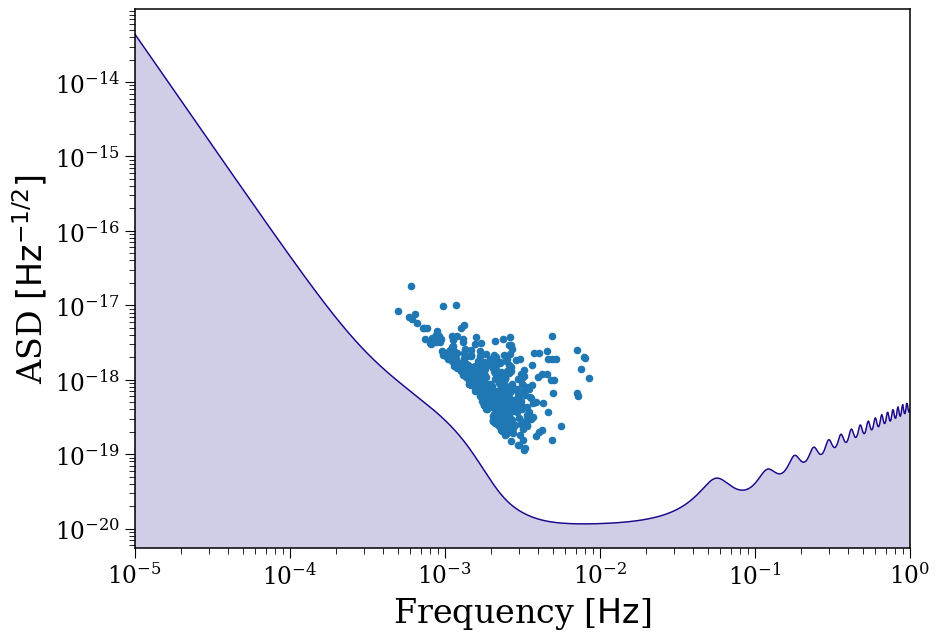

In [13]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1111_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1111_0021_merged.parquet")

# Extract parameters from COSMIC output
m_1_1111_0021 = g1111_0021['mass_1'].values * u.Msun
m_2_1111_0021 = g1111_0021['mass_2'].values * u.Msun
f_orb_1111_0021 = (1 / (g1111_0021['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1111_0021 = g1111_0021['ecc'].values

# Simulate distance spread across galaxy
dist_1111_0021 = (((g1111_0021['x_kpc'])**2 + (g1111_0021['y_kpc'])**2 + (g1111_0021['z_kpc'])**2)**(0.5)).values * u.kpc
s_1111_0021 = source.Source(m_1=m_1_1111_0021, m_2=m_2_1111_0021, ecc=ecc_1111_0021, dist=dist_1111_0021, f_orb=f_orb_1111_0021)
snr = s_1111_0021.get_snr(verbose=True)
fig, ax = s_1111_0021.plot_sources_on_sc(snr_cutoff=7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


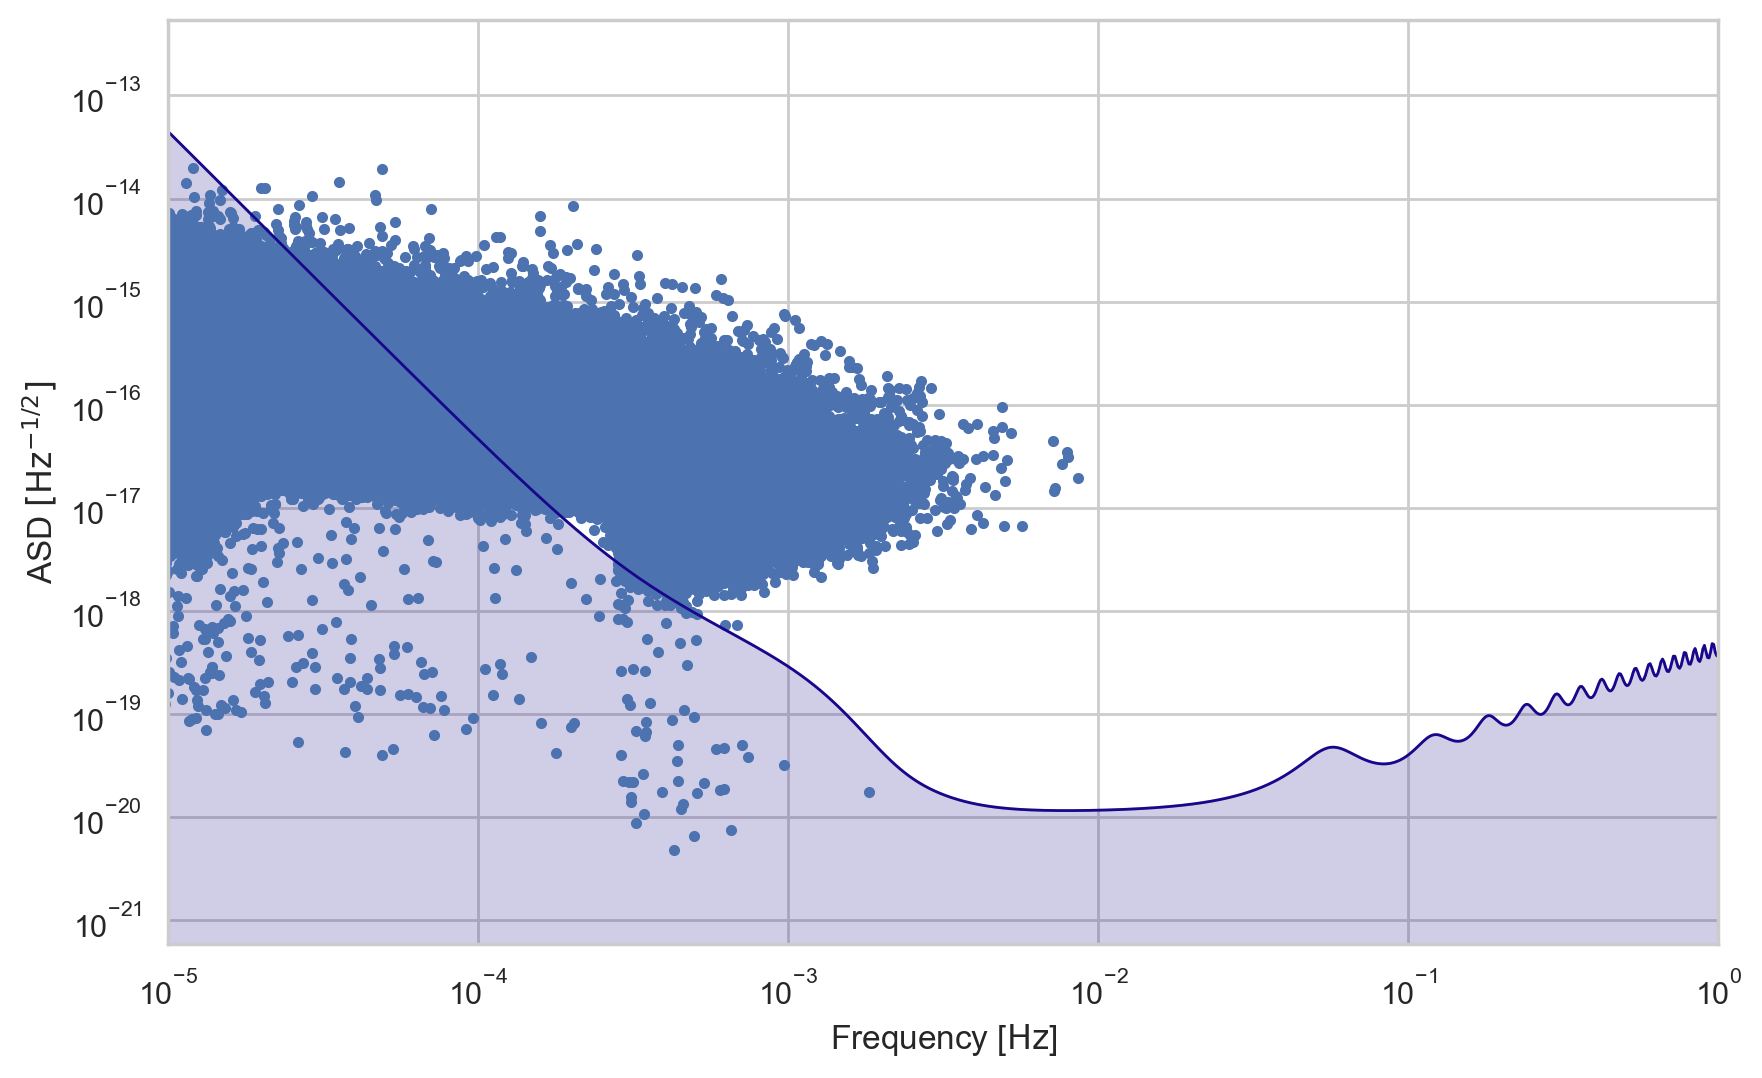

<Figure size 1200x800 with 0 Axes>

In [15]:
from legwork import strain
import legwork.visualisation as visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#loading the file again
g1111_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1111_0021_merged.parquet")

# Extract parameters from COSMIC output
m_1_1111_0021 = g1111_0021['mass_1'].values * u.Msun
m_2_1111_0021 = g1111_0021['mass_2'].values * u.Msun
f_orb_1111_0021 = (1 / (g1111_0021['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1111_0021 = g1111_0021['ecc'].values

f_gw_1111_0021 = 2 * f_orb_1111_0021
dist_1111_0021 = (((g1111_0021['x_kpc'])**2 + (g1111_0021['y_kpc'])**2 + (g1111_0021['z_kpc'])**2)**(0.5)).values * u.kpc

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1111_0021 = chirp_mass(m_1_1111_0021, m_2_1111_0021)
h_c_1111_0021 = strain.h_c_n(
    m_c=m_c_1111_0021,
    f_orb=f_orb_1111_0021,
    ecc=ecc_1111_0021,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1111_0021
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw_1111_0021.value, h_c_1111_0021, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1111_0021")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


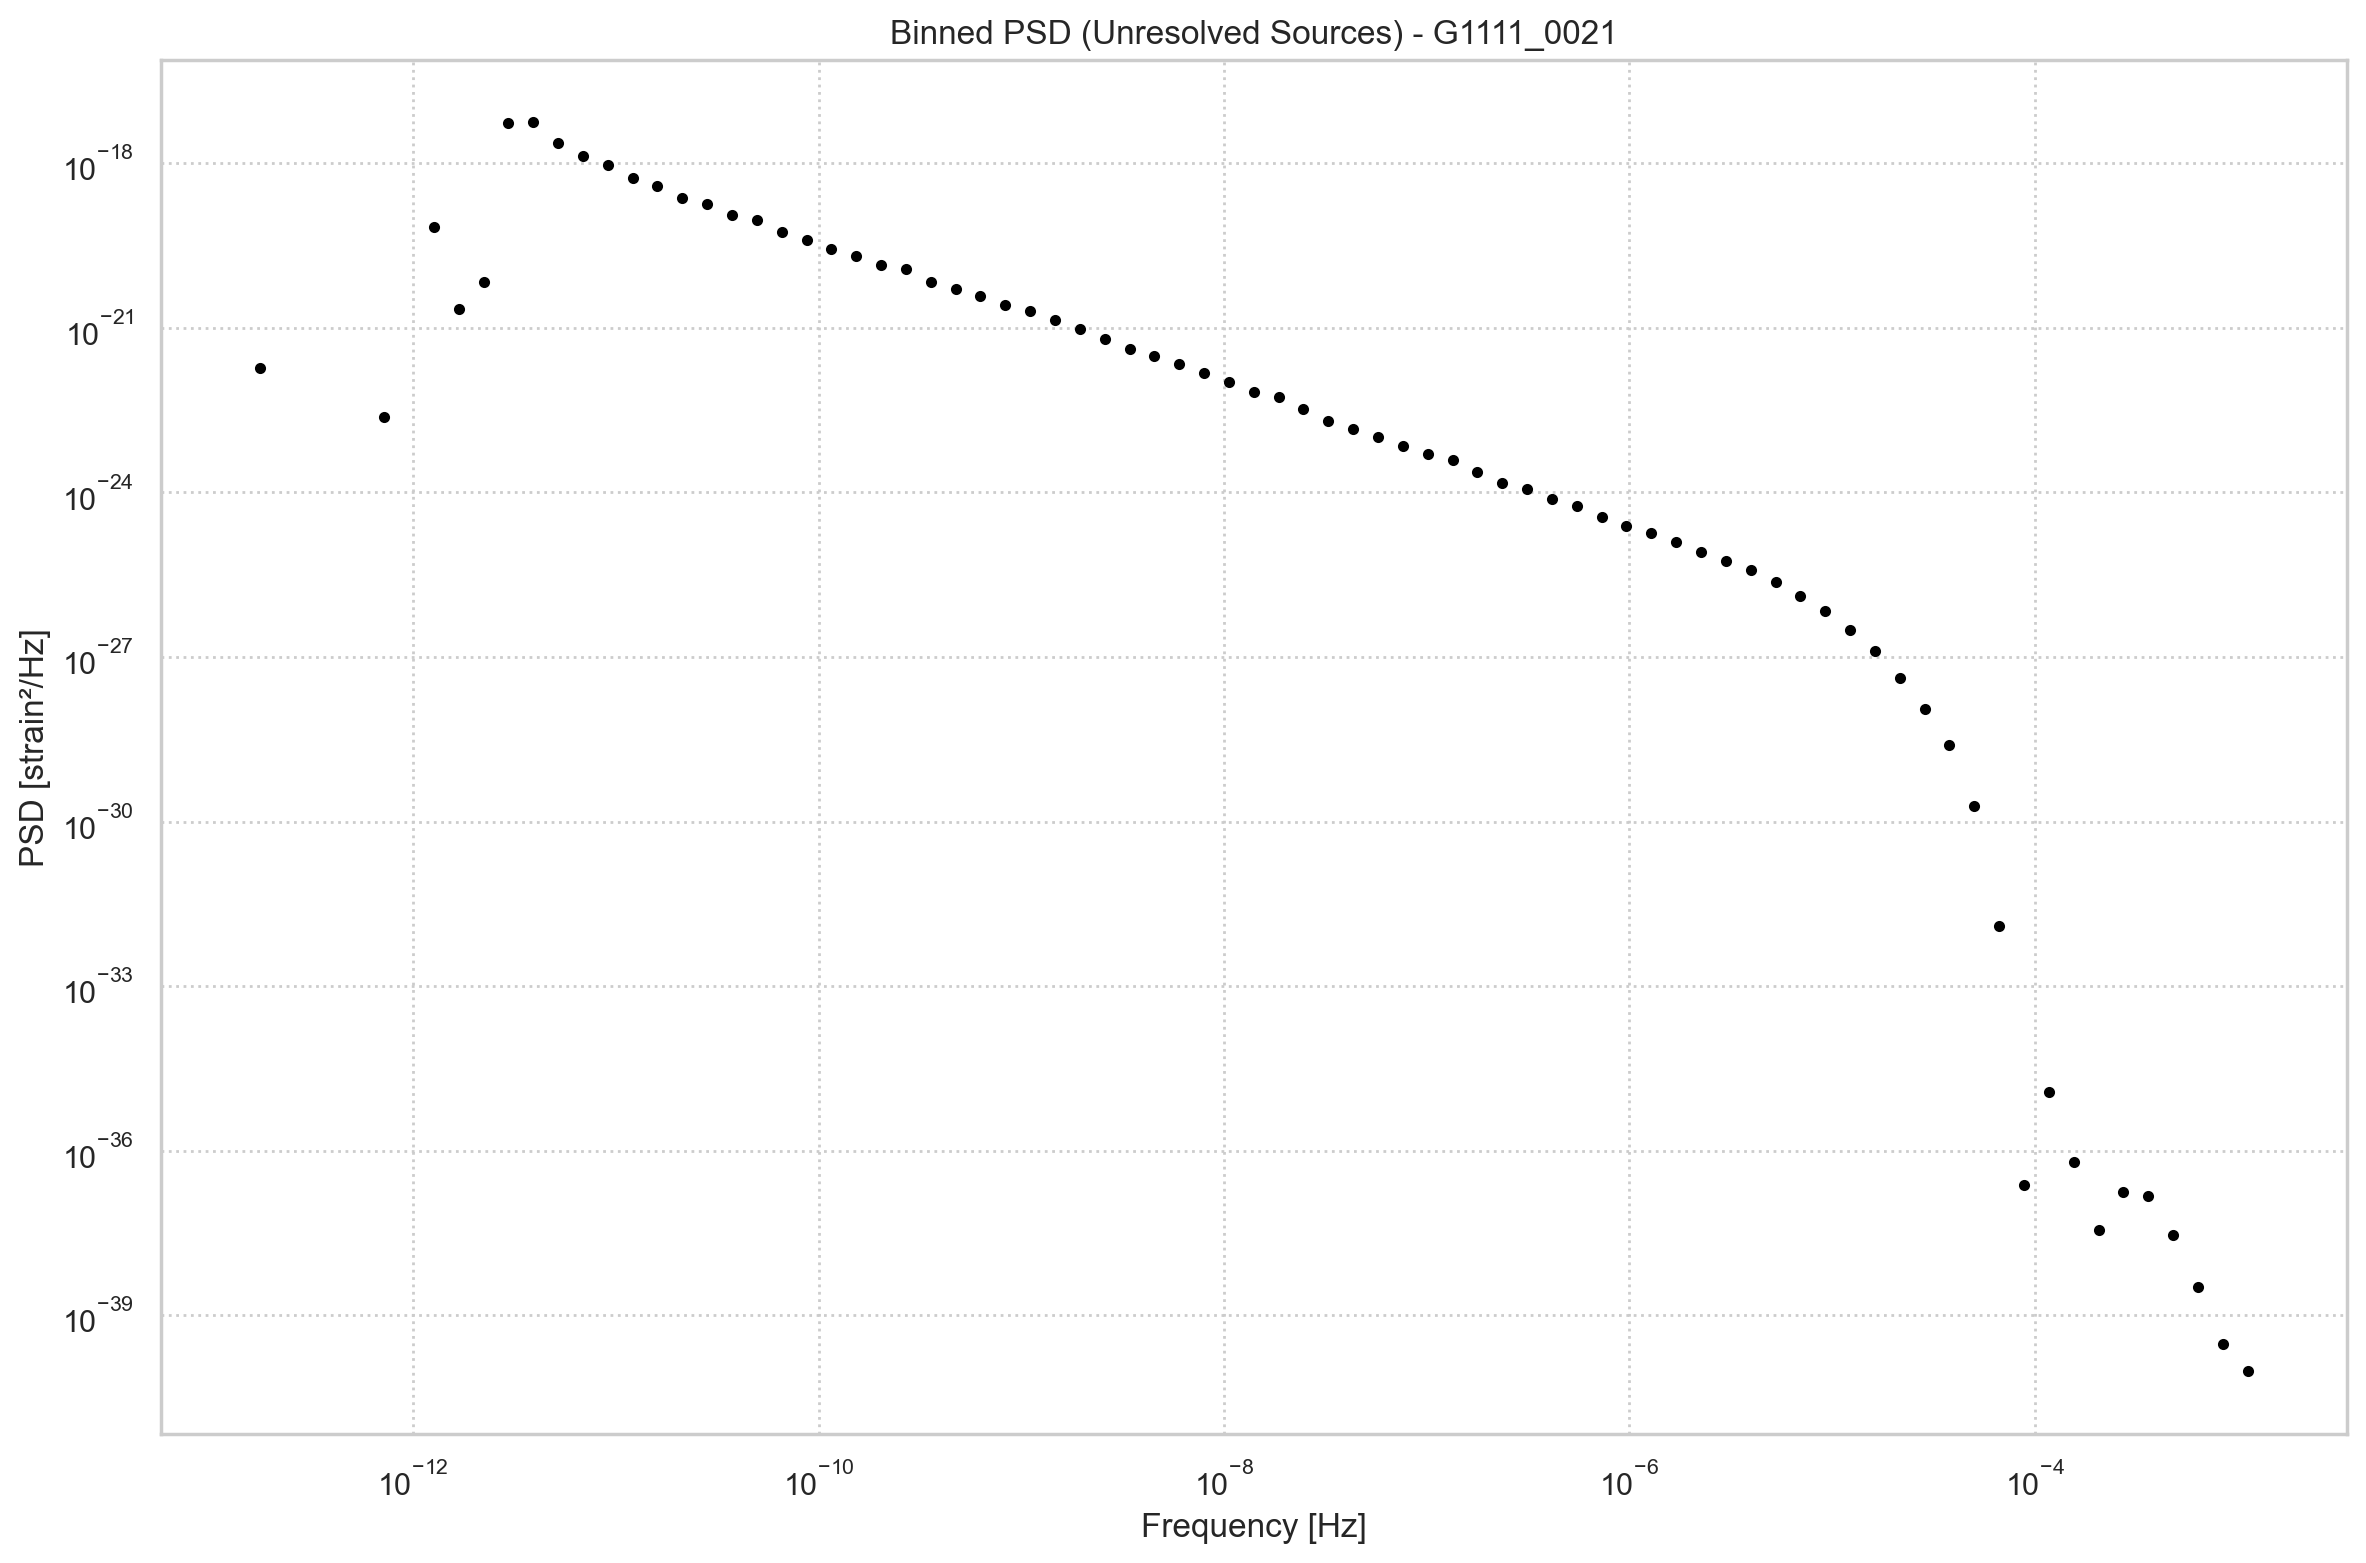

In [36]:
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(g1111_0021, dist_1111_0021, galaxy_name = 'G1111_0021')

## G1210 - 014

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 9718273 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	4383759 sources are stationary
		2457184 sources are stationary and circular
		1926575 sources are stationary and eccentric
	5334514 sources are evolving
		5334514 sources are evolving and circular


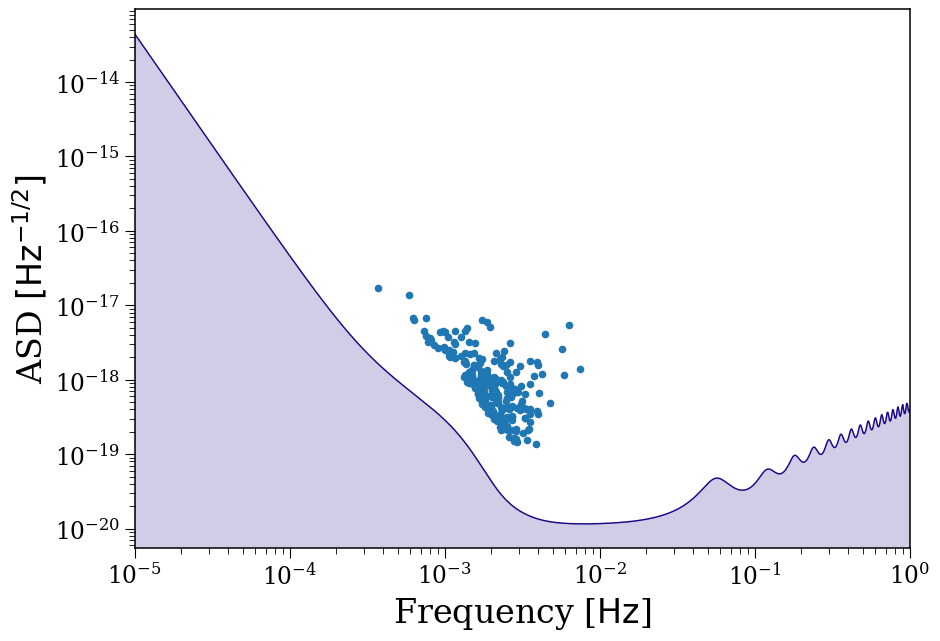

In [15]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1210_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_014_merged.parquet")

# Extract parameters from COSMIC output
m_1_1210_014 = g1210_014['mass_1'].values * u.Msun
m_2_1210_014 = g1210_014['mass_2'].values * u.Msun
f_orb_1210_014 = (1 / (g1210_014['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1210_014 = g1210_014['ecc'].values

# Simulate distance spread across galaxy
dist_1210_014 = (((g1210_014['x_kpc'])**2 + (g1210_014['y_kpc'])**2 + (g1210_014['z_kpc'])**2)**(0.5)).values * u.kpc
s_1210_014 = source.Source(m_1=m_1_1210_014, m_2=m_2_1210_014, ecc=ecc_1210_014, dist=dist_1210_014, f_orb=f_orb_1210_014)
snr = s_1210_014.get_snr(verbose=True)
fig, ax = s_1210_014.plot_sources_on_sc(snr_cutoff=7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


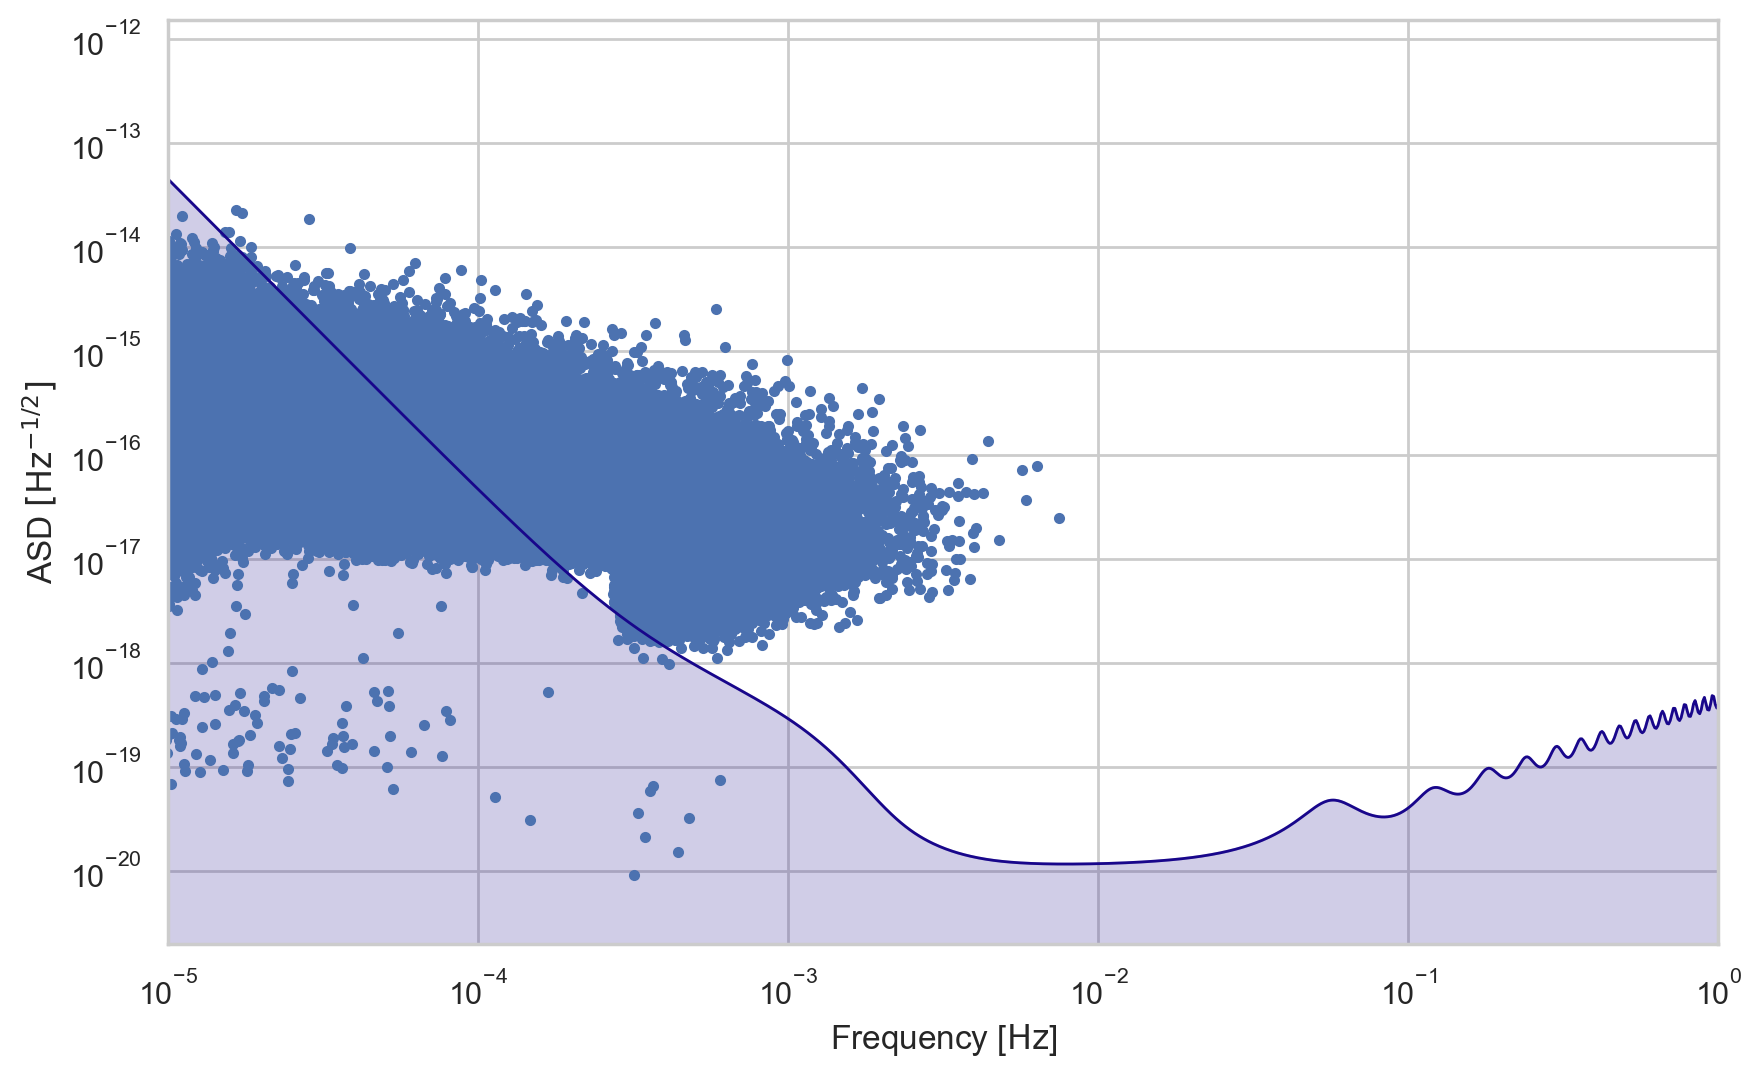

<Figure size 1200x800 with 0 Axes>

In [19]:
g1210_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_014_merged.parquet")

# Extract parameters from COSMIC output
m_1_1210_014 = g1210_014['mass_1'].values * u.Msun
m_2_1210_014 = g1210_014['mass_2'].values * u.Msun
f_orb_1210_014 = (1 / (g1210_014['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1210_014 = g1210_014['ecc'].values

f_gw_1210_014 = 2 * f_orb_1210_014
dist_1210_014 = (((g1210_014['x_kpc'])**2 + (g1210_014['y_kpc'])**2 + (g1210_014['z_kpc'])**2)**(0.5)).values * u.kpc

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1210_014 = chirp_mass(m_1_1210_014, m_2_1210_014)
h_c_1210_014 = strain.h_c_n(
    m_c=m_c_1210_014,
    f_orb=f_orb_1210_014,
    ecc=ecc_1210_014,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1210_014
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw_1210_014.value, h_c_1210_014, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1210_014")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


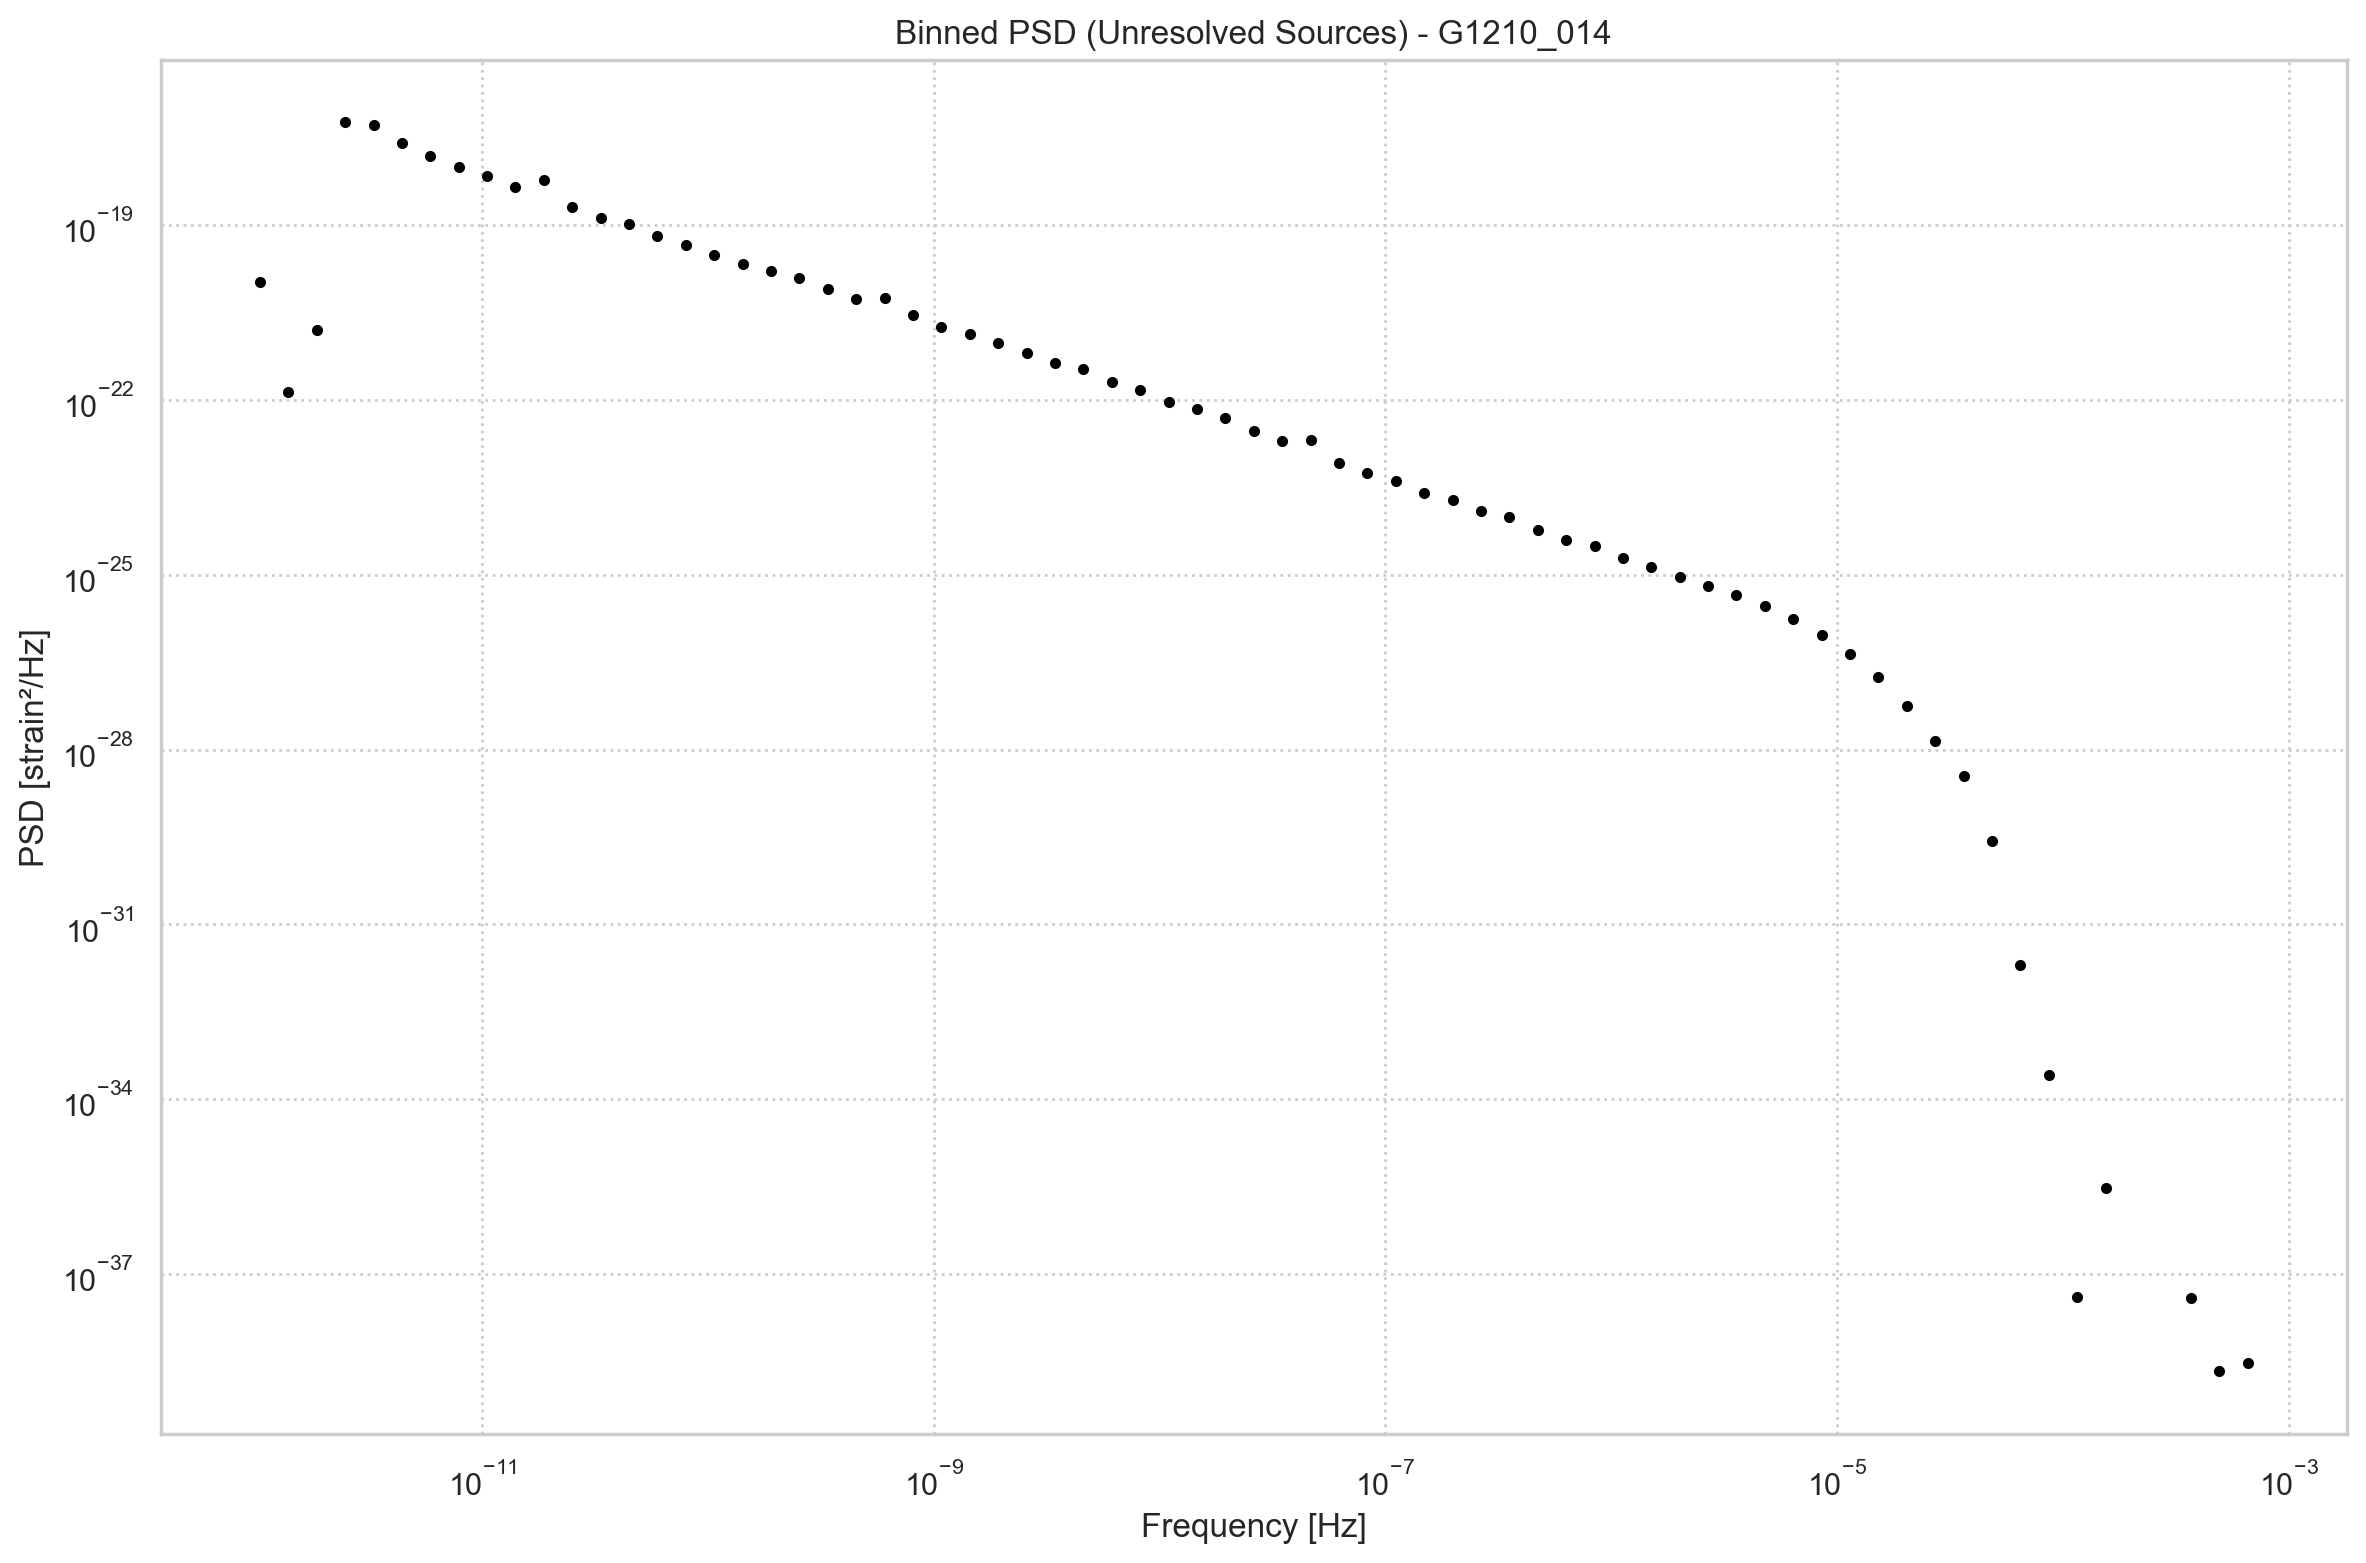

In [42]:
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(g1210_014, dist_1210_014, galaxy_name = 'G1210_014')

## G1210 - 0021

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Calculating SNR for 9717164 sources
	0 sources have already merged


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


	3975933 sources are stationary
		2327291 sources are stationary and circular
		1648642 sources are stationary and eccentric
	5741231 sources are evolving
		5741231 sources are evolving and circular


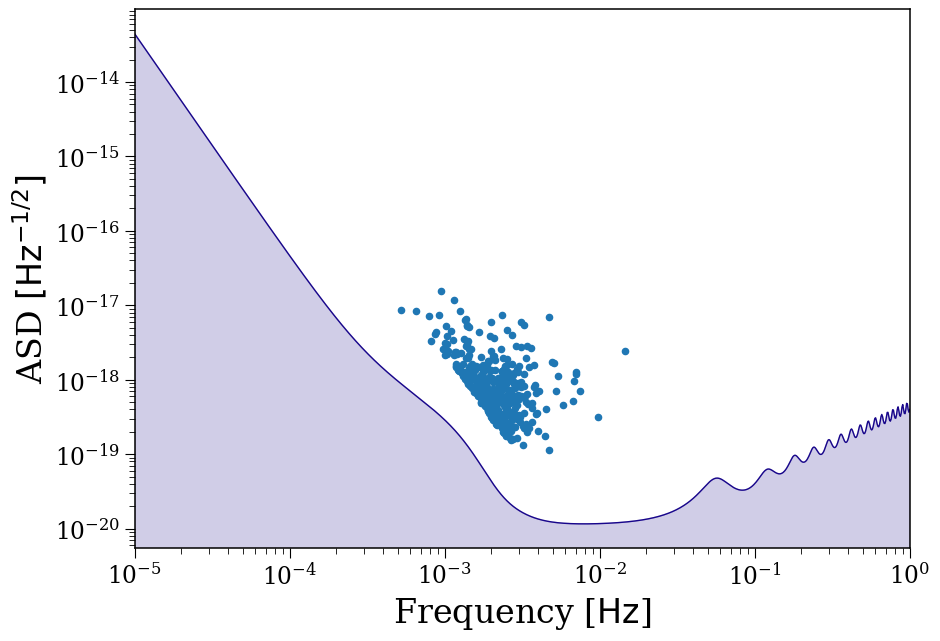

In [17]:
from legwork import source, visualisation
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

#loading the file again
g1210_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_0021_merged.parquet")

# Extract parameters from COSMIC output
m_1_1210_0021 = g1210_0021['mass_1'].values * u.Msun
m_2_1210_0021 = g1210_0021['mass_2'].values * u.Msun
f_orb_1210_0021 = (1 / (g1210_0021['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1210_0021 = g1210_0021['ecc'].values

# Simulate distance spread across galaxy
dist_1210_0021 = (((g1210_0021['x_kpc'])**2 + (g1210_0021['y_kpc'])**2 + (g1210_0021['z_kpc'])**2)**(0.5)).values * u.kpc
s_1210_0021 = source.Source(m_1=m_1_1210_0021, m_2=m_2_1210_0021, ecc=ecc_1210_0021, dist=dist_1210_0021, f_orb=f_orb_1210_0021)
snr = s_1210_0021.get_snr(verbose=True)
fig, ax = s_1210_0021.plot_sources_on_sc(snr_cutoff=7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


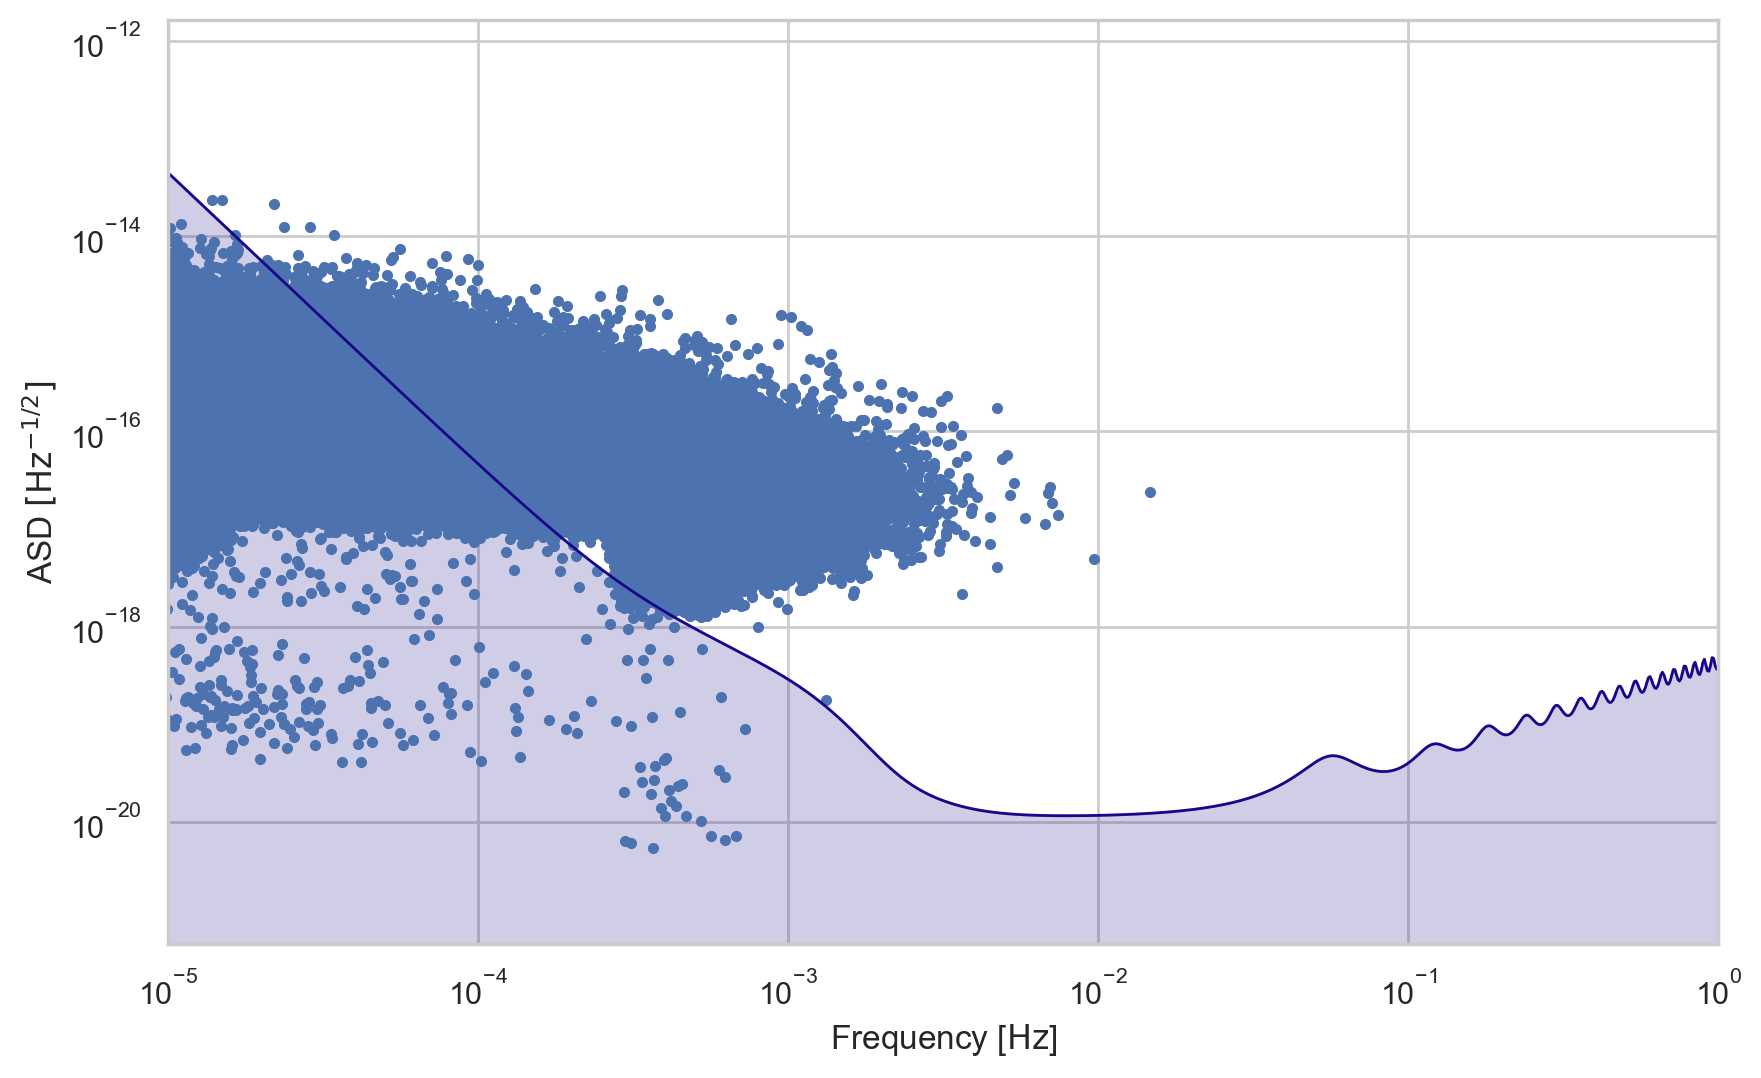

<Figure size 1200x800 with 0 Axes>

In [17]:
g1210_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_0021_merged.parquet")

# Extract parameters from COSMIC output
m_1_1210_0021 = g1210_0021['mass_1'].values * u.Msun
m_2_1210_0021 = g1210_0021['mass_2'].values * u.Msun
f_orb_1210_0021 = (1 / (g1210_0021['porb'].values * u.day)).to(u.Hz)  # Convert period to Hz
ecc_1210_0021 = g1210_0021['ecc'].values

f_gw_1210_0021 = 2 * f_orb_1210_0021
dist_1210_0021 = (((g1210_0021['x_kpc'])**2 + (g1210_0021['y_kpc'])**2 + (g1210_0021['z_kpc'])**2)**(0.5)).values * u.kpc

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c_1210_0021 = chirp_mass(m_1_1210_0021, m_2_1210_0021)
h_c_1210_0021 = strain.h_c_n(
    m_c=m_c_1210_0021,
    f_orb=f_orb_1210_0021,
    ecc=ecc_1210_0021,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist_1210_0021
).flatten()

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw_1210_0021.value, h_c_1210_0021, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity - g1111_0021")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


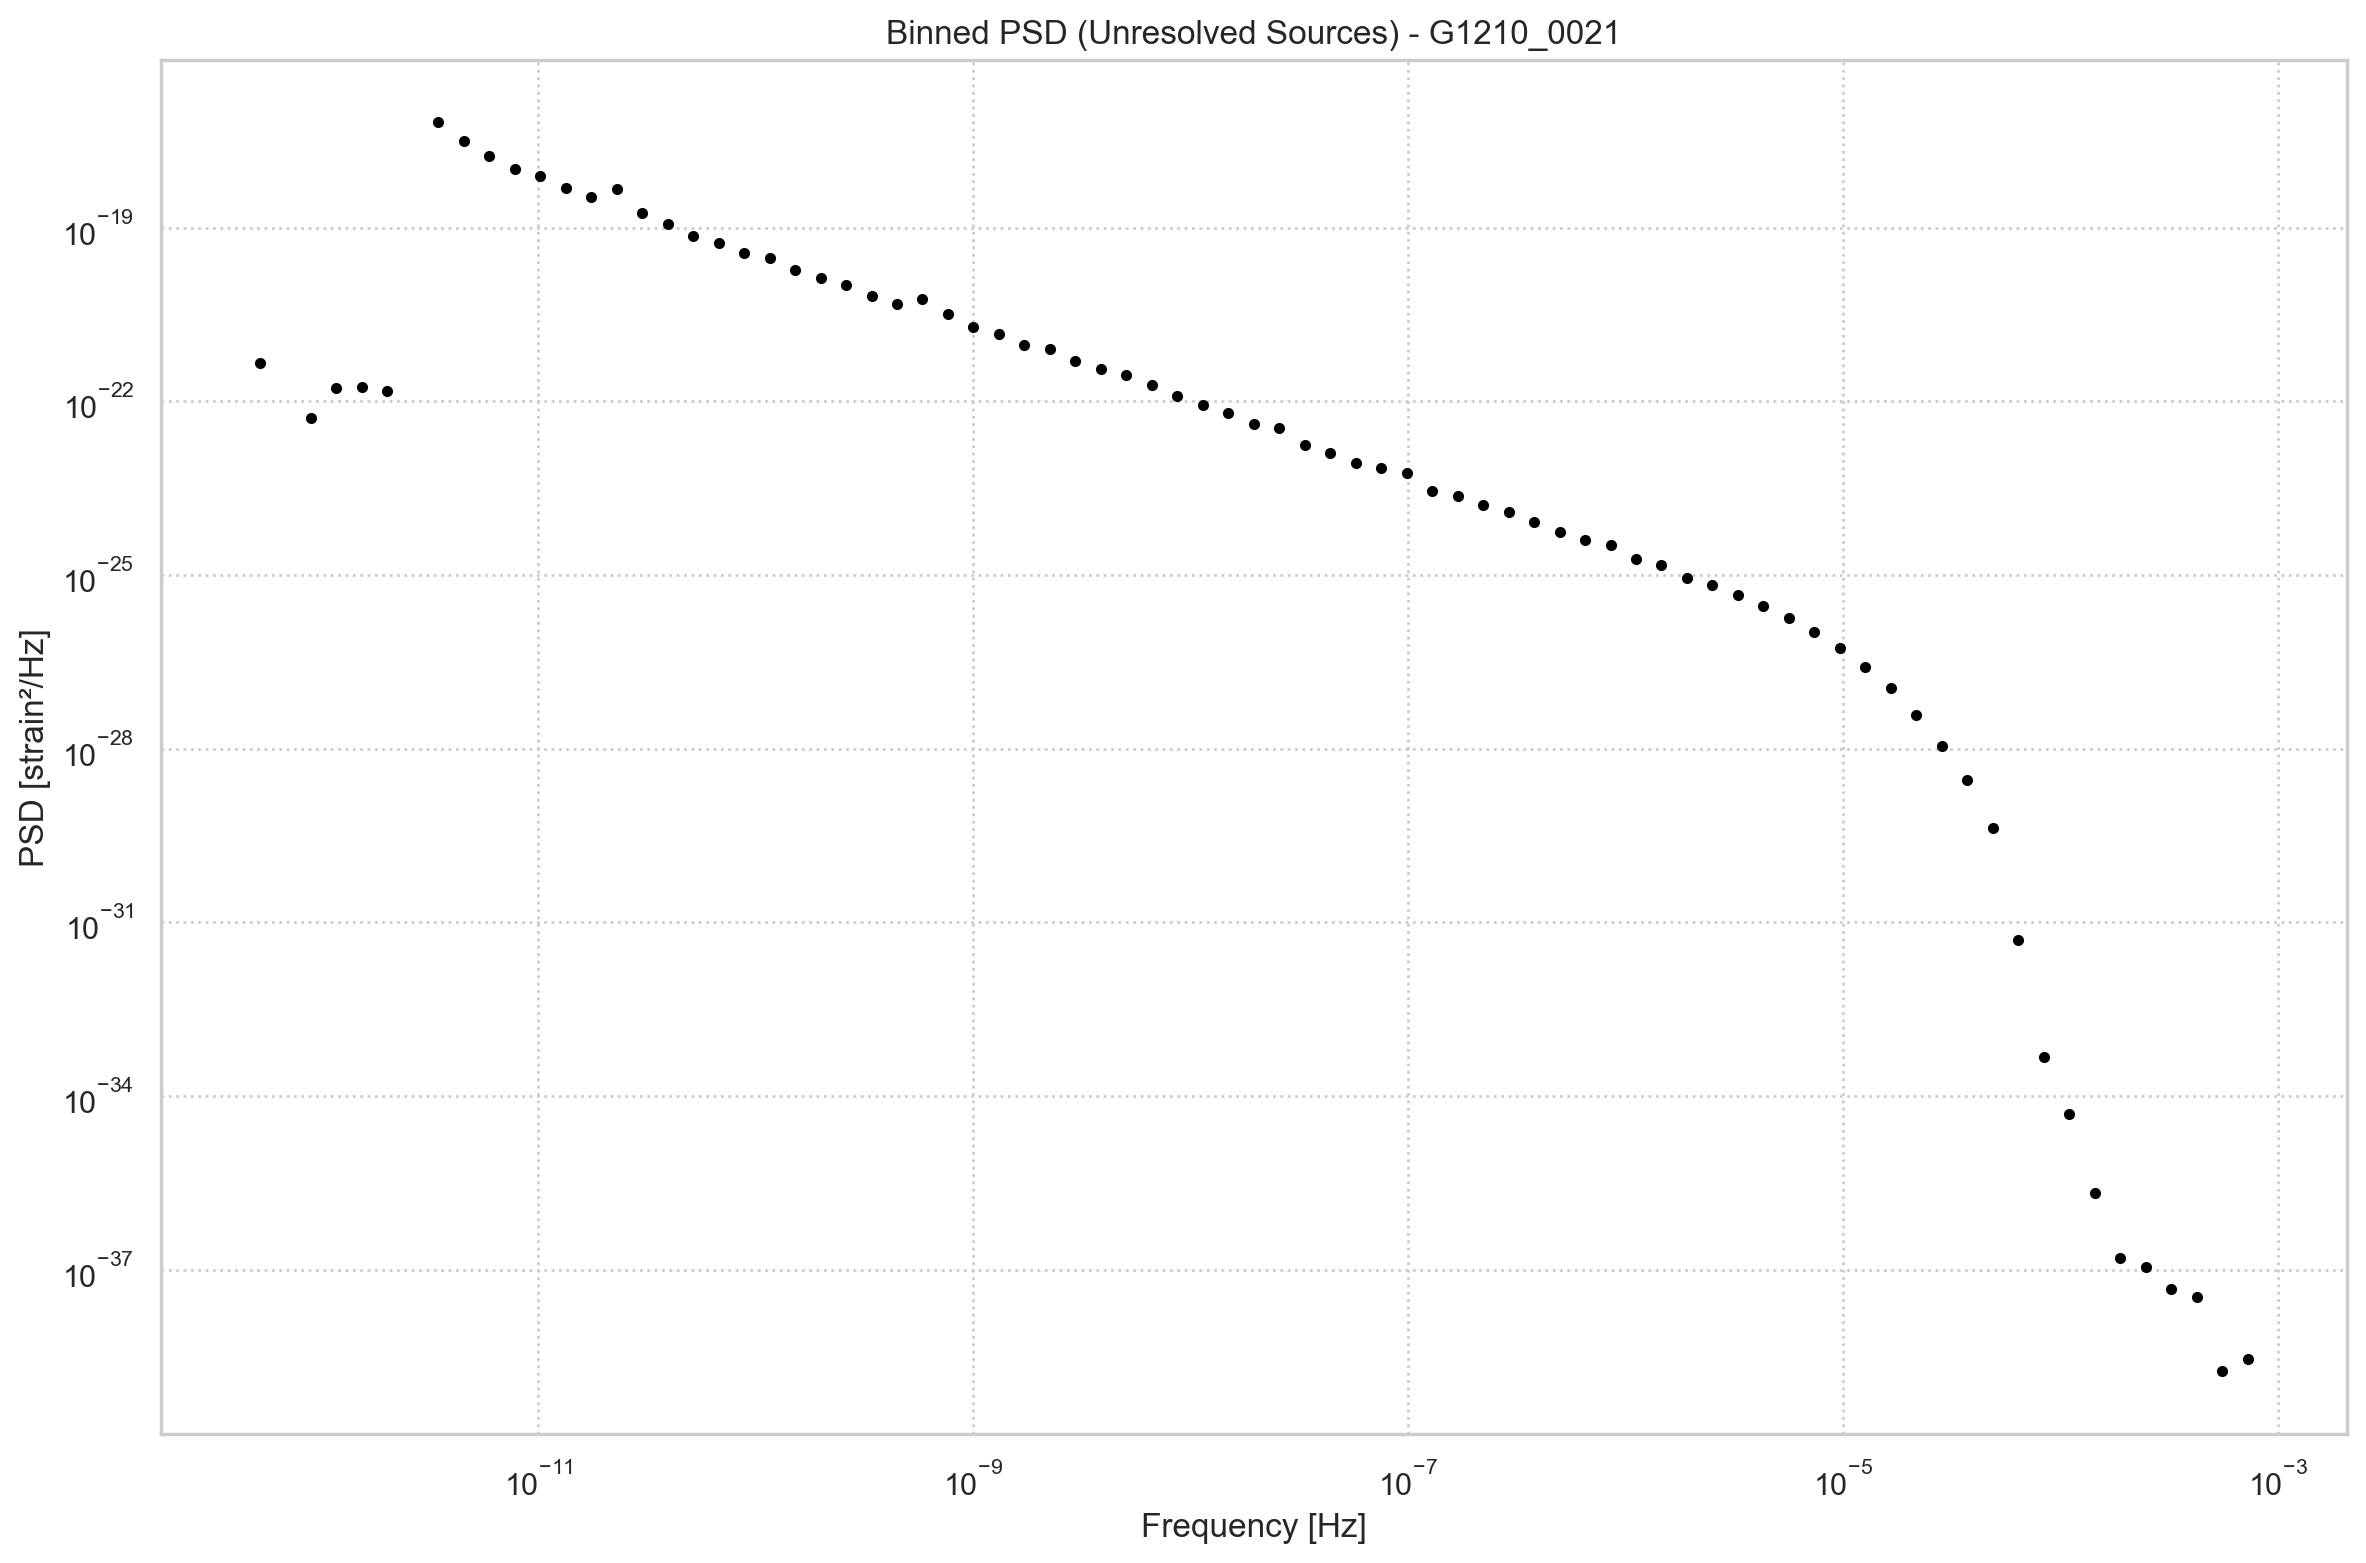

In [54]:
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(g1210_0021, dist_1210_0021, galaxy_name = 'G1210_0021')

In [50]:
import legwork
legwork.psd.get_confusion_noise_robson19(f_orb_1210_014)
print(len(legwork.psd.get_confusion_noise_robson19(f_orb_1210_014)))

/opt/anaconda3/lib/python3.12/site-packages/legwork/psd.py:289: RuntimeWarning: invalid value encountered in power
  confusion_noise = 9e-45 * f**(-7 / 3.) * np.exp(-f**(alpha[ind]) + beta[ind]
/opt/anaconda3/lib/python3.12/site-packages/legwork/psd.py:290: RuntimeWarning: invalid value encountered in sin
  * f * np.sin(kappa[ind] * f))\


9718273


/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


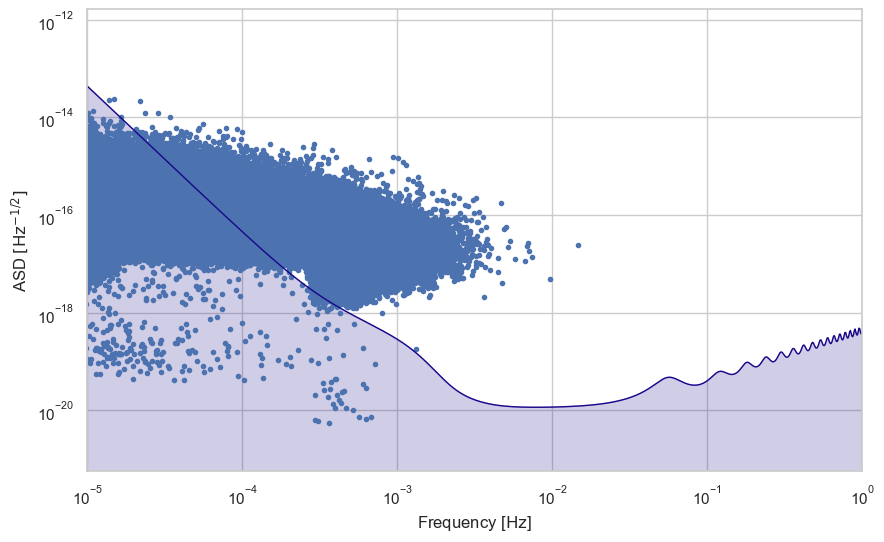

<Figure size 1200x800 with 0 Axes>

In [62]:
from legwork import strain
import legwork.visualisation as visualisation
import matplotlib.pyplot as plt
import seaborn as sns
f_gw = 2 * f_orb

def chirp_mass(m1, m2):
    return ((m1 * m2)**(3/5)) / ((m1 + m2)**(1/5))

m_c = chirp_mass(m_1, m_2)
h_c = strain.h_c_n(
    m_c=m_c,
    f_orb=f_orb,
    ecc=ecc,
    n=2,  # n=2 harmonic dominates for circular binaries
    dist=dist
).flatten()

dist = dist

# Set style
sns.set(style="whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot sources
ax.loglog(f_gw.value, h_c, '.', label='WD Binaries', alpha=1)

# Add LISA Sensitivity Curve
freqs = np.logspace(-5, 0, 1000) * u.Hz
visualisation.plot_sensitivity_curve(frequency_range=freqs, fig = fig, ax=ax)

# Customize
ax.set_title("Gravitational Wave Sources vs LISA Sensitivity")
ax.set_xlabel("Gravitational Wave Frequency [Hz]")
ax.set_ylabel("Characteristic Strain")
ax.legend()
plt.tight_layout()
plt.show()

## Fitting Model.

In [181]:
print(f"Min f_gw: {np.min(f_gw):.2e}")
print(f"Max f_gw: {np.max(f_gw):.2e} ")
print(f"Min h_c:  {np.min(h_c):.2e}")
print(f"Max h_c:  {np.max(h_c):.2e}")

Min f_gw: 3.07e-14 Hz
Max f_gw: 1.46e-02 Hz 
Min h_c:  0.00e+00
Max h_c:  6.11e-13


## Fitting Model - Cornish - G1210_0021

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_78138/3086595195.py:60: RuntimeWarning: overflow encountered in exp
  return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))


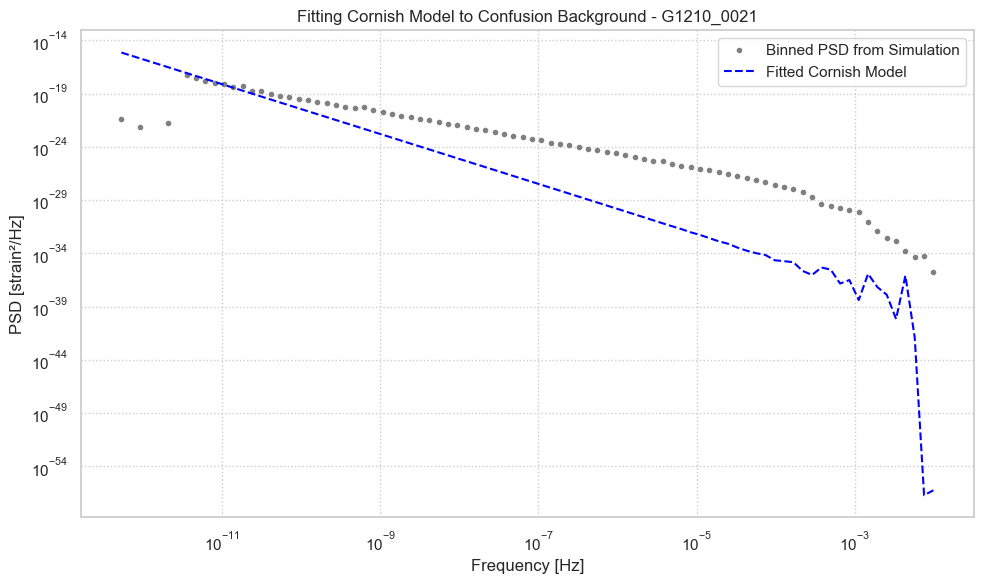

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from legwork import psd

# Set Seaborn white background
sns.set_context("talk")
sns.set_style("whitegrid")

# Load Cornish parameters
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results.csv")

# Cornish Model
def cornish_psd(f, A, alpha, beta, kappa, gamma, f_k):
    return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))

freqs_plot = np.logspace(-13, -2, 1000) * u.Hz
robson_confusion = psd.get_confusion_noise_robson19(freqs_plot)

# Galaxy mapping
galaxy_info = {
    "g1010_014": "g1010_014_merged.parquet",
    "g1010_0021": "g1010_0021_merged.parquet",
    "g1110_014": "g1110_014_merged.parquet",
    "g1110_0021": "g1110_0021_merged.parquet",
    "g1111_014": "g1111_014_merged.parquet",
    "g1111_0021": "g1111_0021_merged.parquet",
    "g1210_014": "g1210_014_merged.parquet",
    "g1210_0021": "g1210_0021_merged.parquet",
}

# --- NOW: One Plot at a Time ---

for idx, row in df.iterrows():
    galaxy_name = row['Galaxy']

    # Load galaxy data
    galaxy_data = pd.read_parquet(f"/Users/neelpanchal/extracted_data/{galaxy_info[galaxy_name]}")
    dist_array = np.sqrt(
        galaxy_data['x_kpc'].values**2 +
        galaxy_data['y_kpc'].values**2 +
        galaxy_data['z_kpc'].values**2
    ) * u.kpc

    # Bin unresolved
    f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
        galaxy_data, dist_array, galaxy_name=galaxy_name, plot=False
    )

    A = row['A']
    alpha = row['alpha']
    beta = row['beta']
    kappa = row['kappa']
    gamma = row['gamma']
    f_k = row['f_k']

    cornish_fit = cornish_psd(freqs_plot.value, A, alpha, beta, kappa, gamma, f_k)

    # Start fresh figure
    plt.figure(figsize=(10, 7))
    
    # Plot all
    plt.loglog(f_fit_unresolved, psd_fit_unresolved, '-', color='black', lw=1.5, label='Binned PSD')
    plt.loglog(freqs_plot.value, cornish_fit, '-', color='royalblue', lw=2.5, label='Fitted Cornish Model')
    plt.loglog(freqs_plot.value, robson_confusion.value, '-', color='forestgreen', lw=2, label='Robson+19 Confusion')

    # Set aesthetics
    plt.xlim(1e-13, 1e-2)
    plt.ylim(1e-43, 1e-10)

    plt.xlabel('Frequency [Hz]', fontsize=18)
    plt.ylabel('PSD [strain²/Hz]', fontsize=18)
    plt.title(f"Cornish Fit vs Robson+19 - {galaxy_name}", fontsize=20, pad=15)
    
    plt.grid(False)
    plt.legend(fontsize=14)
    plt.tight_layout()

    # Save separately
    plt.savefig(f"/Users/neelpanchal/extracted_data/clean_cornish_fit_{galaxy_name}.png", dpi=500, bbox_inches='tight')
    plt.show()

    print(f"✅ Finished plot for {galaxy_name}")


/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1462/3308240109.py:9: RuntimeWarning: overflow encountered in exp
  return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))


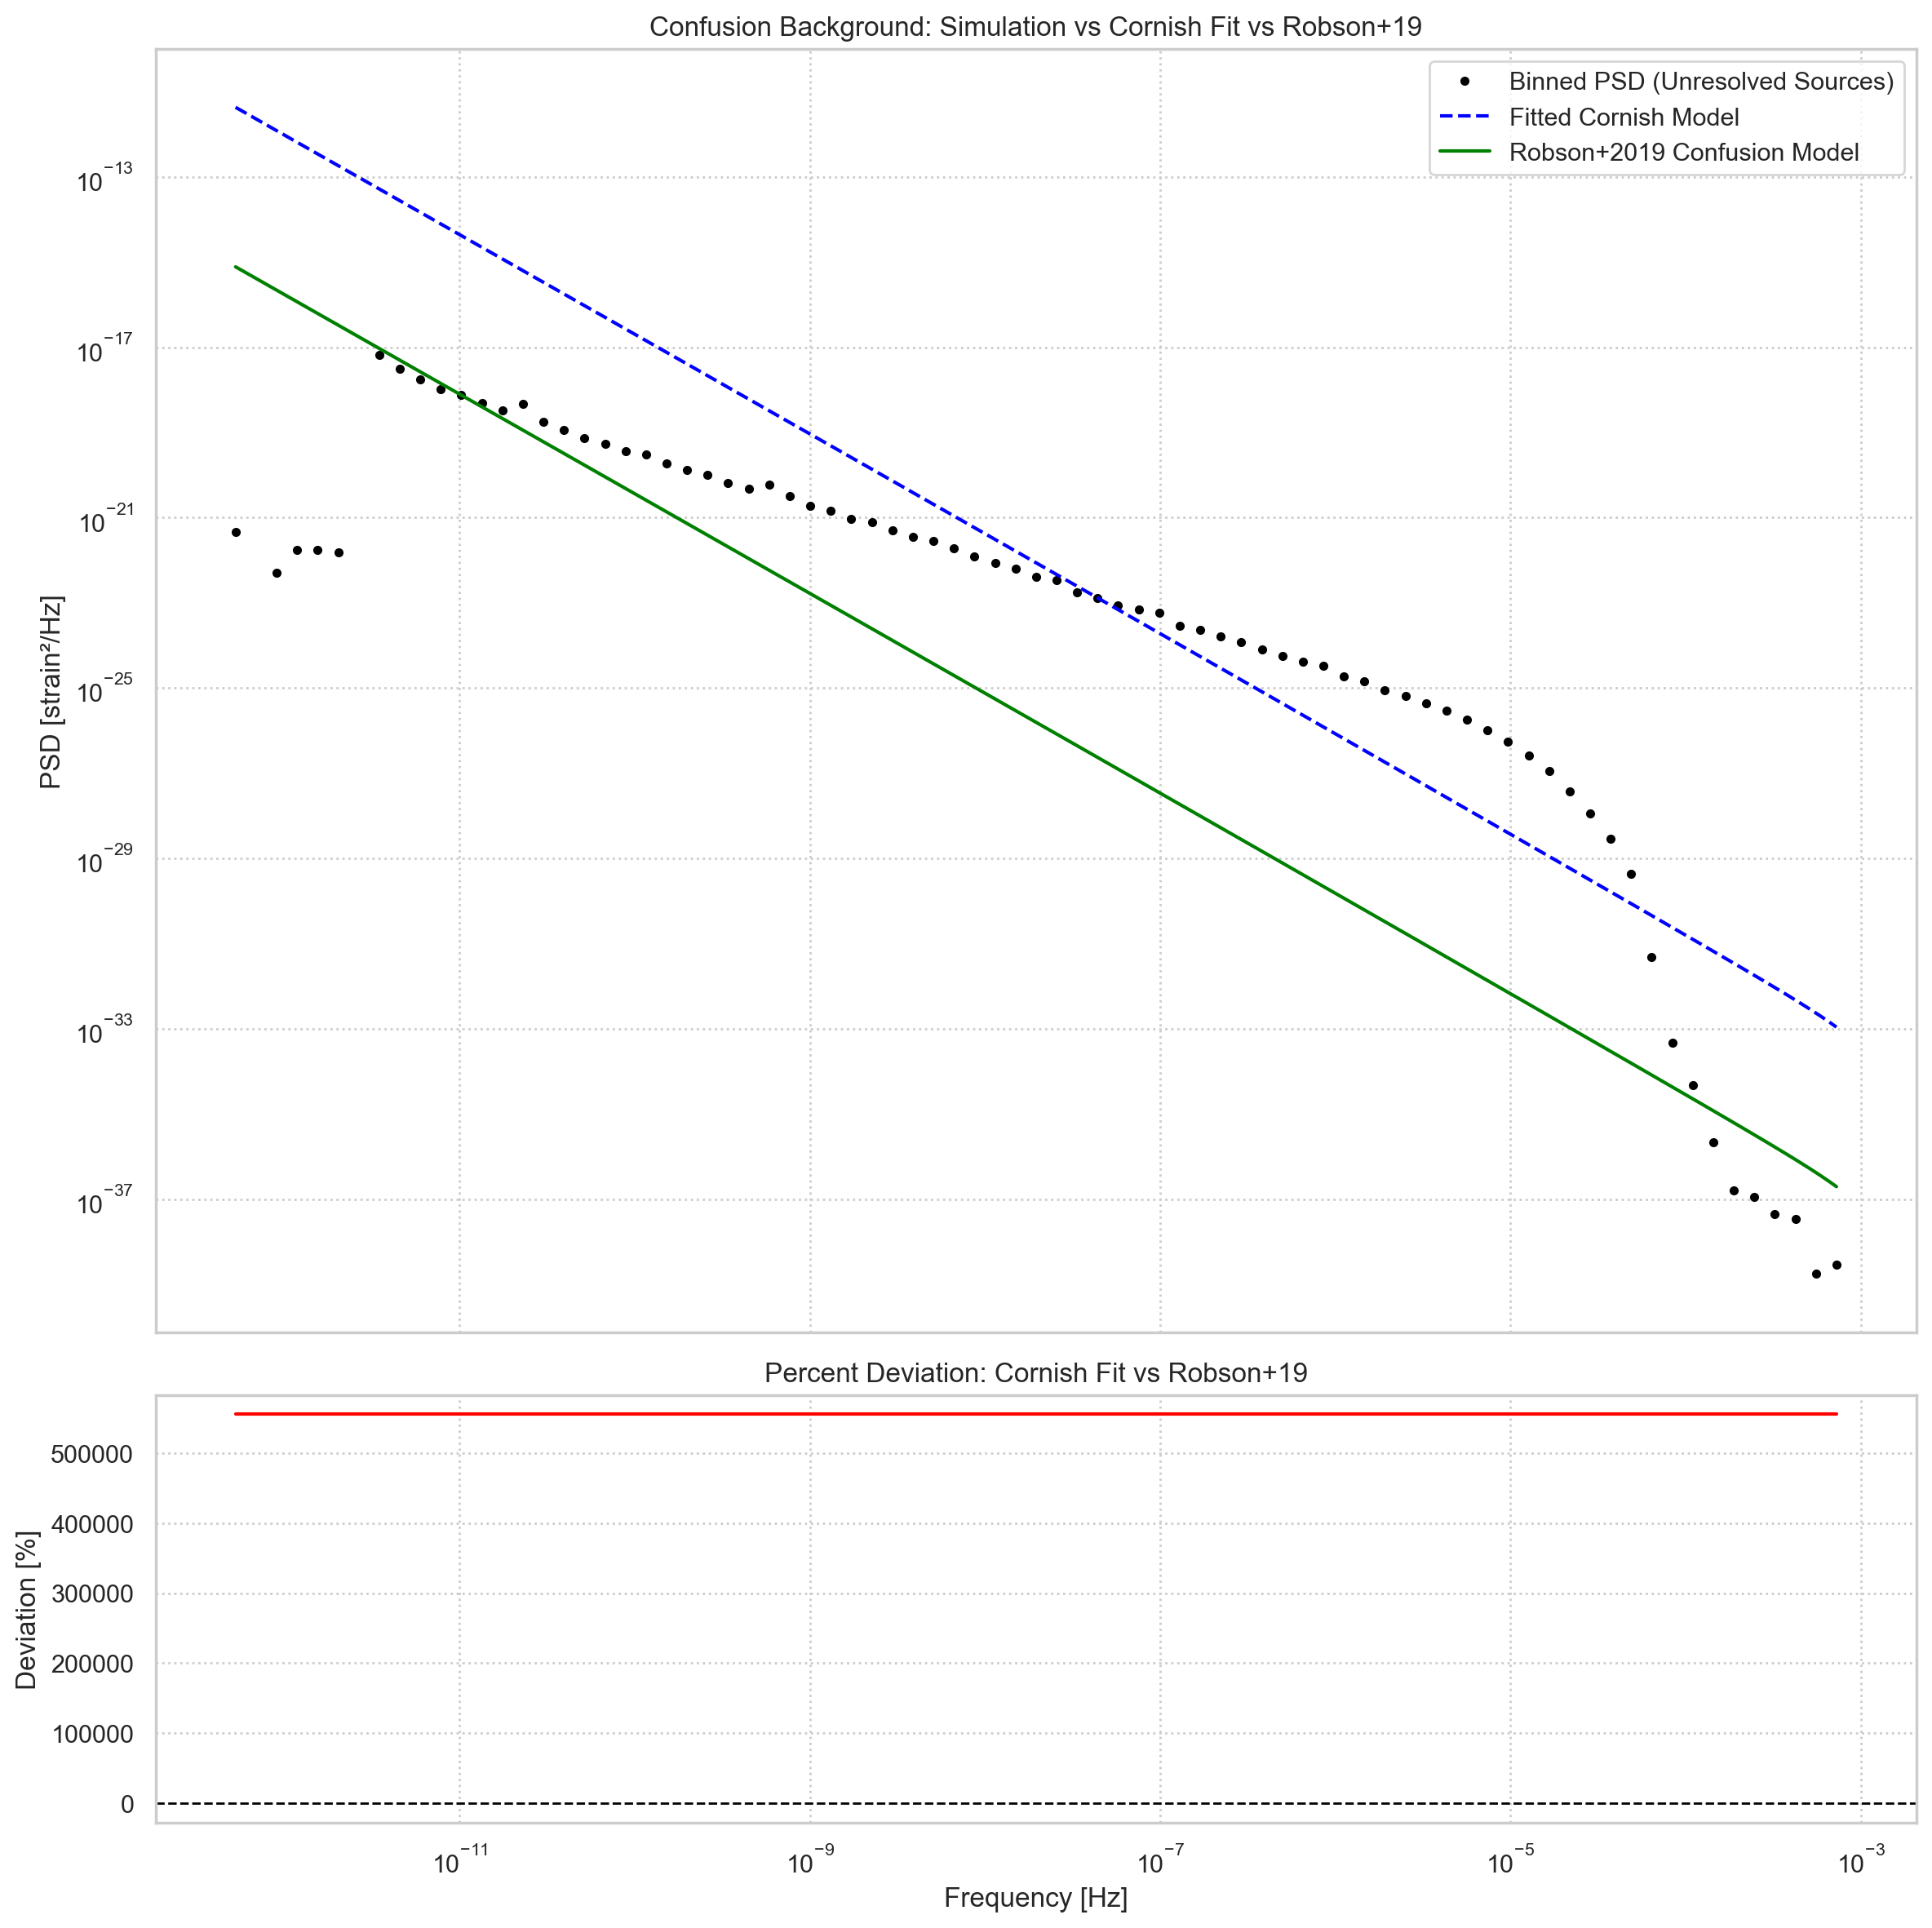

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from legwork import strain
from scipy.optimize import curve_fit

# Define Cornish model
def cornish_psd(f, A, alpha, beta, kappa, gamma, f_k):
    return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))

# Step 1: Get unresolved PSD without auto-plot
f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1210_0021, 
    dist_1210_0021, 
    galaxy_name='G1210_0021', 
    plot=False
)

# Step 2: Fit Cornish model
p0 = [9e-45, 0.138, -221, 521, 1680, 0.00113]  # Good initial guess
popt, _ = curve_fit(cornish_psd, f_fit_unresolved, psd_fit_unresolved, p0=p0, bounds=(
        [1e-50, 0.01, -300, 100, 500, 1e-5],  # Lower bounds
        [1e-40, 0.5, 300, 1000, 9000, 0.1]      # Upper bounds
    ),
    maxfev=20000
)

popc, _ = curve_fit(cornish_psd, f_fit_unresolved, psd_fit_unresolved, p0=p0)
#-------------------------------------------------------------
# --- Calculate Deviation ---

cornish_fit_on_f_plot = cornish_psd(f_plot.value, *popt)

plt.loglog(f_fit_unresolved, psd_fit_unresolved, '.', label='Binned PSD (Unresolved Sources)', color='black')
plt.loglog(f_plot.value, cornish_fit_on_f_plot, '--', label='Fitted Cornish Model', color='blue')
plt.loglog(f_plot.value, conf_noise_robson.value, '-', label='Robson+2019 Confusion Model', color='green')
plt.set_ylabel("PSD [strain²/Hz]")
plt.set_title("Confusion Background: Simulation vs Cornish Fit vs Robson+19")
plt.grid(True, which="both", ls=":")
plt.legend()
plt.show()

In [124]:
type(legwork.psd.power_spectral_density(f_orb_1210_0021, instrument='LISA', custom_psd=None, t_obs='auto', L='auto', approximate_R=False, confusion_noise='auto'))

astropy.units.quantity.Quantity

In [146]:
print("Best-fit Cornish parameters:")
param_names = ["A", "alpha", "beta", "kappa", "gamma", "f_k"]
for name, value in zip(param_names, popt):
    print(f"{name}: {value:.3e}")

Best-fit Cornish parameters:
A: 5.000e-41
alpha: 1.380e-01
beta: -2.210e+02
kappa: 5.210e+02
gamma: 1.680e+03
f_k: 1.130e-03


In [242]:
all_results = []

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from legwork import psd
import astropy.units as u

# Define Cornish Model
def cornish_psd(f, A, alpha, beta, kappa, gamma, f_k):
    return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))

# The new function with SNS style
def fit_cornish_and_store_with_plot(galaxy_name, f_fit_unresolved, psd_fit_unresolved, kstar1, kstar2, metallicity, num_binaries):
    """
    Fit Cornish model on binned PSD, plot result using Seaborn style, and return parameters + metadata as dictionary.
    """
    # Step 0: Set Seaborn Style
    sns.set_style("white")
    sns.set_palette("bright")

    # Step 1: Fit the Cornish model
    p0 = [9e-45, 0.138, -221, 521, 1680, 0.00113]  # Initial guess
    try:
        popt, _ = curve_fit(
            cornish_psd,
            f_fit_unresolved, psd_fit_unresolved,
            p0=p0,
            bounds=(
                [1e-45, -2.0, -2000, 0, 0.1, 1e-7],
                [1e-40, 5.0, 2000, 5000, 50000, 1]
            ),
            maxfev=20000
        )
    except Exception as e:
        print(f"⚠️ Warning: Cornish fit failed for {galaxy_name}. Error: {e}")
        popt = [np.nan]*6

    # Step 2: Plot with Seaborn Style
    freqs_plot = np.logspace(-13, -2, 1000) * u.Hz
    robson_confusion = psd.get_confusion_noise_robson19(freqs_plot)

    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot binned PSD
    ax.plot(f_fit_unresolved, psd_fit_unresolved, '.', label='Binned PSD (Unresolved Sources)', color='black', markersize=5)

    # Plot Cornish Fit
    ax.plot(freqs_plot.value, cornish_psd(freqs_plot.value, *popt), '--', label='Fitted Cornish Model', color='blue')

    # Plot Robson Model
    ax.plot(freqs_plot.value, robson_confusion.value, '-', label='Robson+19 Confusion Model', color='green')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e-13, 1e-2)
    ax.set_ylim(1e-43, 1e-10)

    ax.set_xlabel('Frequency [Hz]', fontsize=14)
    ax.set_ylabel('PSD [strain²/Hz]', fontsize=14)
    ax.set_title(f'Cornish Fit - {galaxy_name}', fontsize=16)

    ax.legend(fontsize=12)
    ax.grid(False)  # No background grid

    plt.tight_layout()
    plt.show()

    # Step 3: Store everything
    result = {
        "Galaxy": galaxy_name,
        "kstar1": kstar1,
        "kstar2": kstar2,
        "Metallicity": metallicity,
        "Num_Binaries": num_binaries,
        "A": popt[0],
        "alpha": popt[1],
        "beta": popt[2],
        "kappa": popt[3],
        "gamma": popt[4],
        "f_k": popt[5]
    }
    
    return result


## Cornish - Fit Function - loose bounds

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from legwork import psd
import astropy.units as u

# Define Cornish Model
def cornish_psd(f, A, alpha, beta, kappa, gamma, f_k):
    return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))

# The new function with SNS style
def fit_cornish_and_store_with_plot_nb(galaxy_name, f_fit_unresolved, psd_fit_unresolved, kstar1, kstar2, metallicity, num_binaries):
    """
    Fit Cornish model on binned PSD, plot result using Seaborn style, and return parameters + metadata as dictionary.
    """
    # Step 0: Set Seaborn Style
    sns.set_style("white")
    sns.set_palette("bright")

    # Step 1: Fit the Cornish model
    p0 = [9e-45, 0.138, -221, 521, 1680, 0.00113]  # Initial guess
    try:
        popt, _ = curve_fit(
            cornish_psd,
            f_fit_unresolved, psd_fit_unresolved,
            p0=p0,
            bounds=(
                [1e-55, -5.0, -5000, 0, 0.01, 1e-8],
                [1e-34, 10.0, 5000, 10000, 100000, 1]
            ),
            maxfev=30000
        )
    except Exception as e:
        print(f"⚠️ Warning: Cornish fit failed for {galaxy_name}. Error: {e}")
        popt = [np.nan]*6

    # Step 2: Plot with Seaborn Style
    freqs_plot = np.logspace(-13, -2, 1000) * u.Hz
    robson_confusion = psd.get_confusion_noise_robson19(freqs_plot)

    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot binned PSD
    ax.plot(f_fit_unresolved, psd_fit_unresolved, '.', label='Binned PSD (Unresolved Sources)', color='black', markersize=5)

    # Plot Cornish Fit
    ax.plot(freqs_plot.value, cornish_psd(freqs_plot.value, *popt), '--', label='Fitted Cornish Model', color='blue')

    # Plot Robson Model
    ax.plot(freqs_plot.value, robson_confusion.value, '-', label='Robson+19 Confusion Model', color='green')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e-13, 1e-2)
    ax.set_ylim(1e-43, 1e-10)

    ax.set_xlabel('Frequency [Hz]', fontsize=14)
    ax.set_ylabel('PSD [strain²/Hz]', fontsize=14)
    ax.set_title(f'Cornish Fit - {galaxy_name}', fontsize=16)

    ax.legend(fontsize=12)
    ax.grid(False)  # No background grid

    plt.tight_layout()
    plt.show()

    # Step 3: Store everything
    result = {
        "Galaxy": galaxy_name,
        "kstar1": kstar1,
        "kstar2": kstar2,
        "Metallicity": metallicity,
        "Num_Binaries": num_binaries,
        "A": popt[0],
        "alpha": popt[1],
        "beta": popt[2],
        "kappa": popt[3],
        "gamma": popt[4],
        "f_k": popt[5]
    }
    
    return result


/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


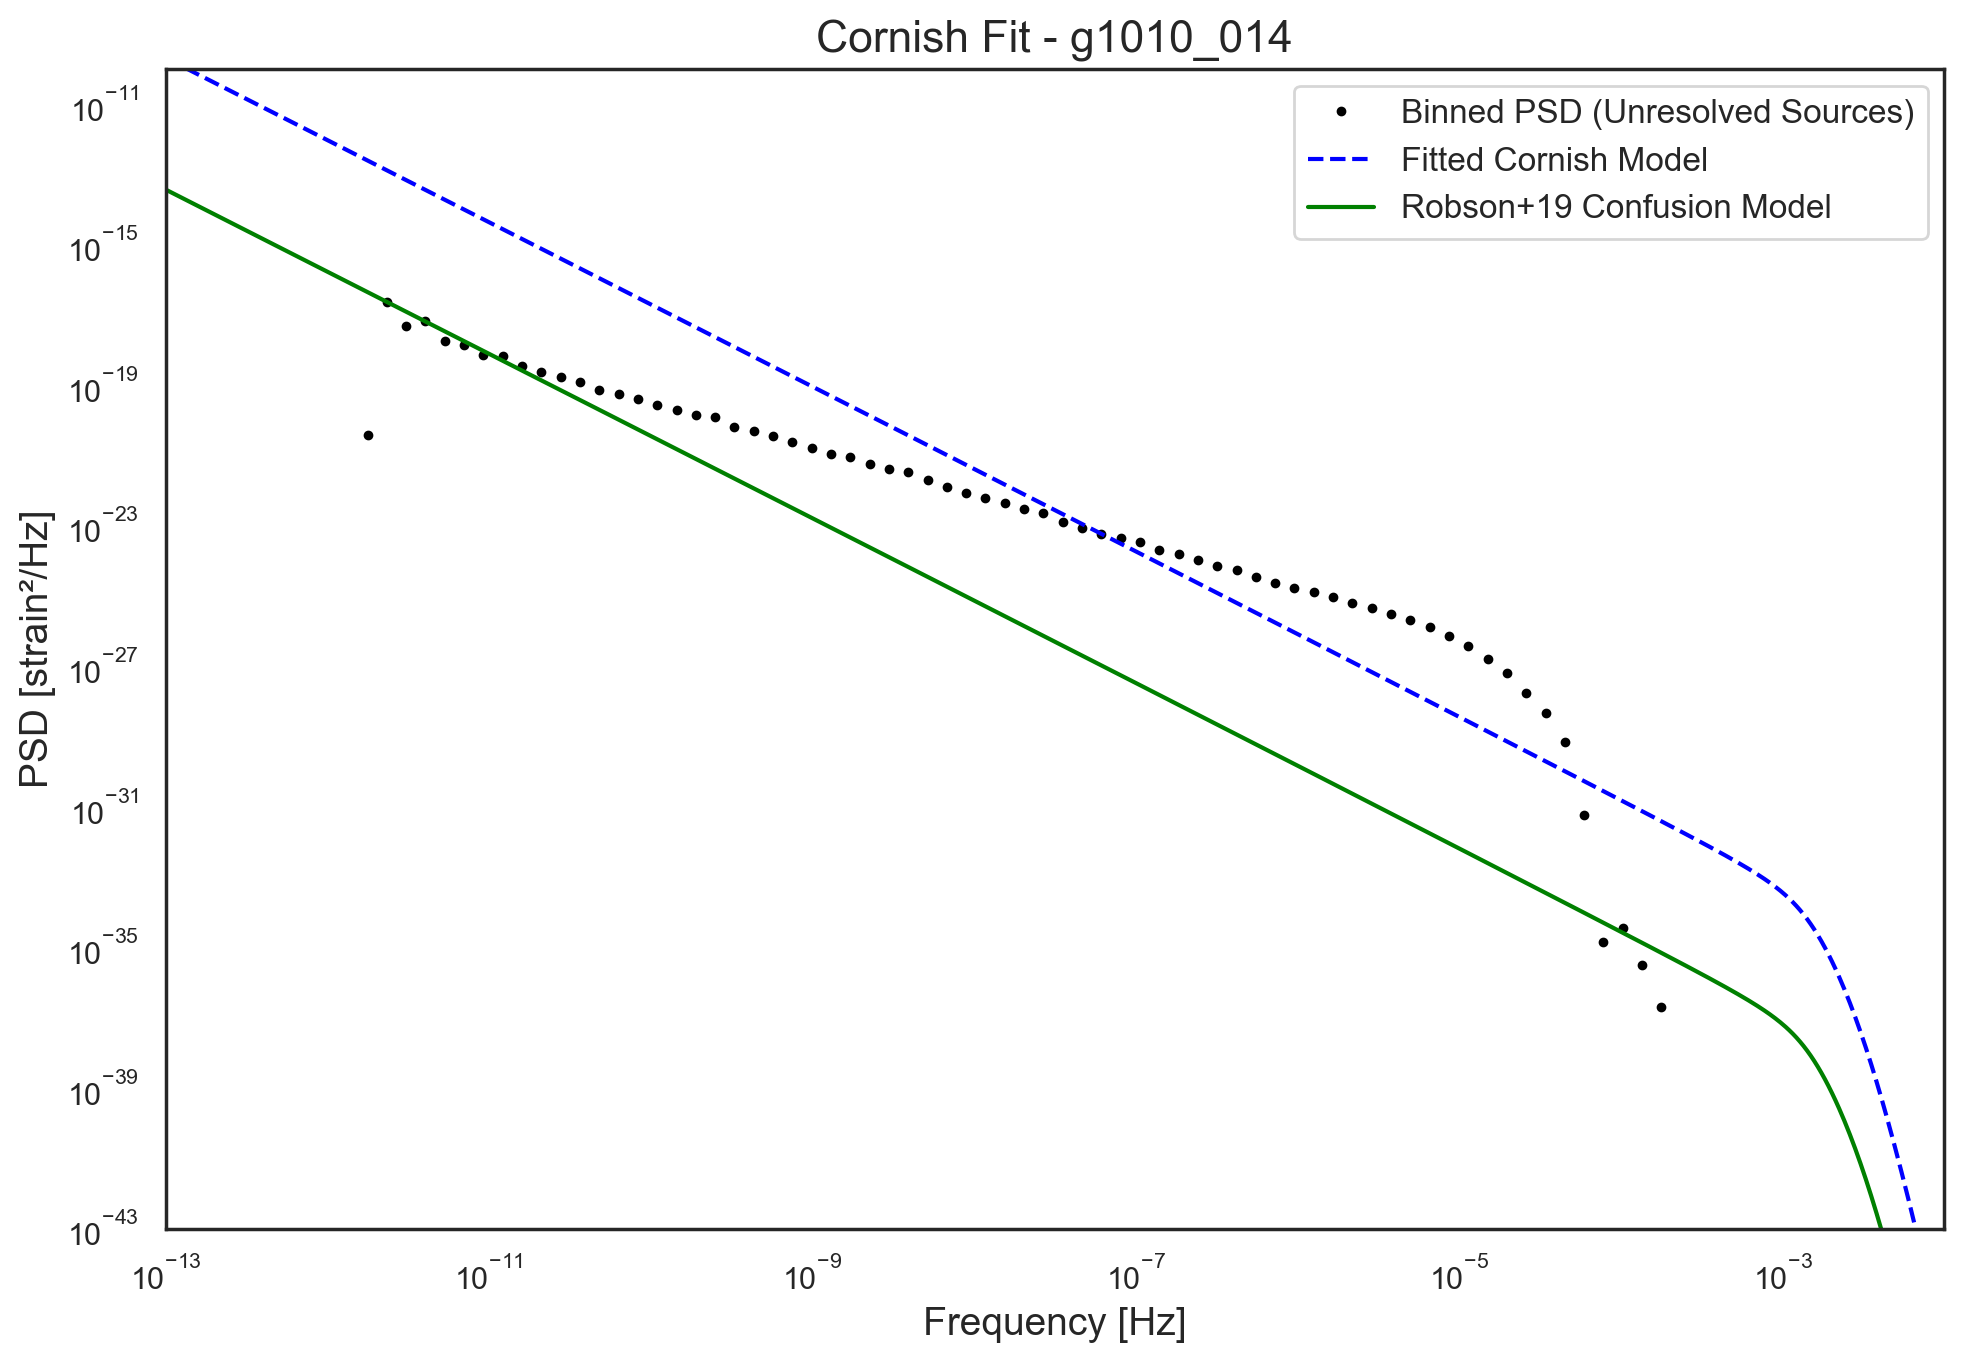

{'Galaxy': 'g1010_014', 'kstar1': 10, 'kstar2': 10, 'Metallicity': 0.014, 'Num_Binaries': 68, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [244]:
g1010_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1010_014_merged.parquet")
dist_1010_014 = (((g1010_014['x_kpc'])**2 + (g1010_014['y_kpc'])**2 + (g1010_014['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1010_014, dist_1010_014, galaxy_name='g1010_014', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1010_014',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=10,
    kstar2=10,
    metallicity=0.014,
    num_binaries=len(f_fit_unresolved)
)

all_results.append(result)
                
print(result)

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


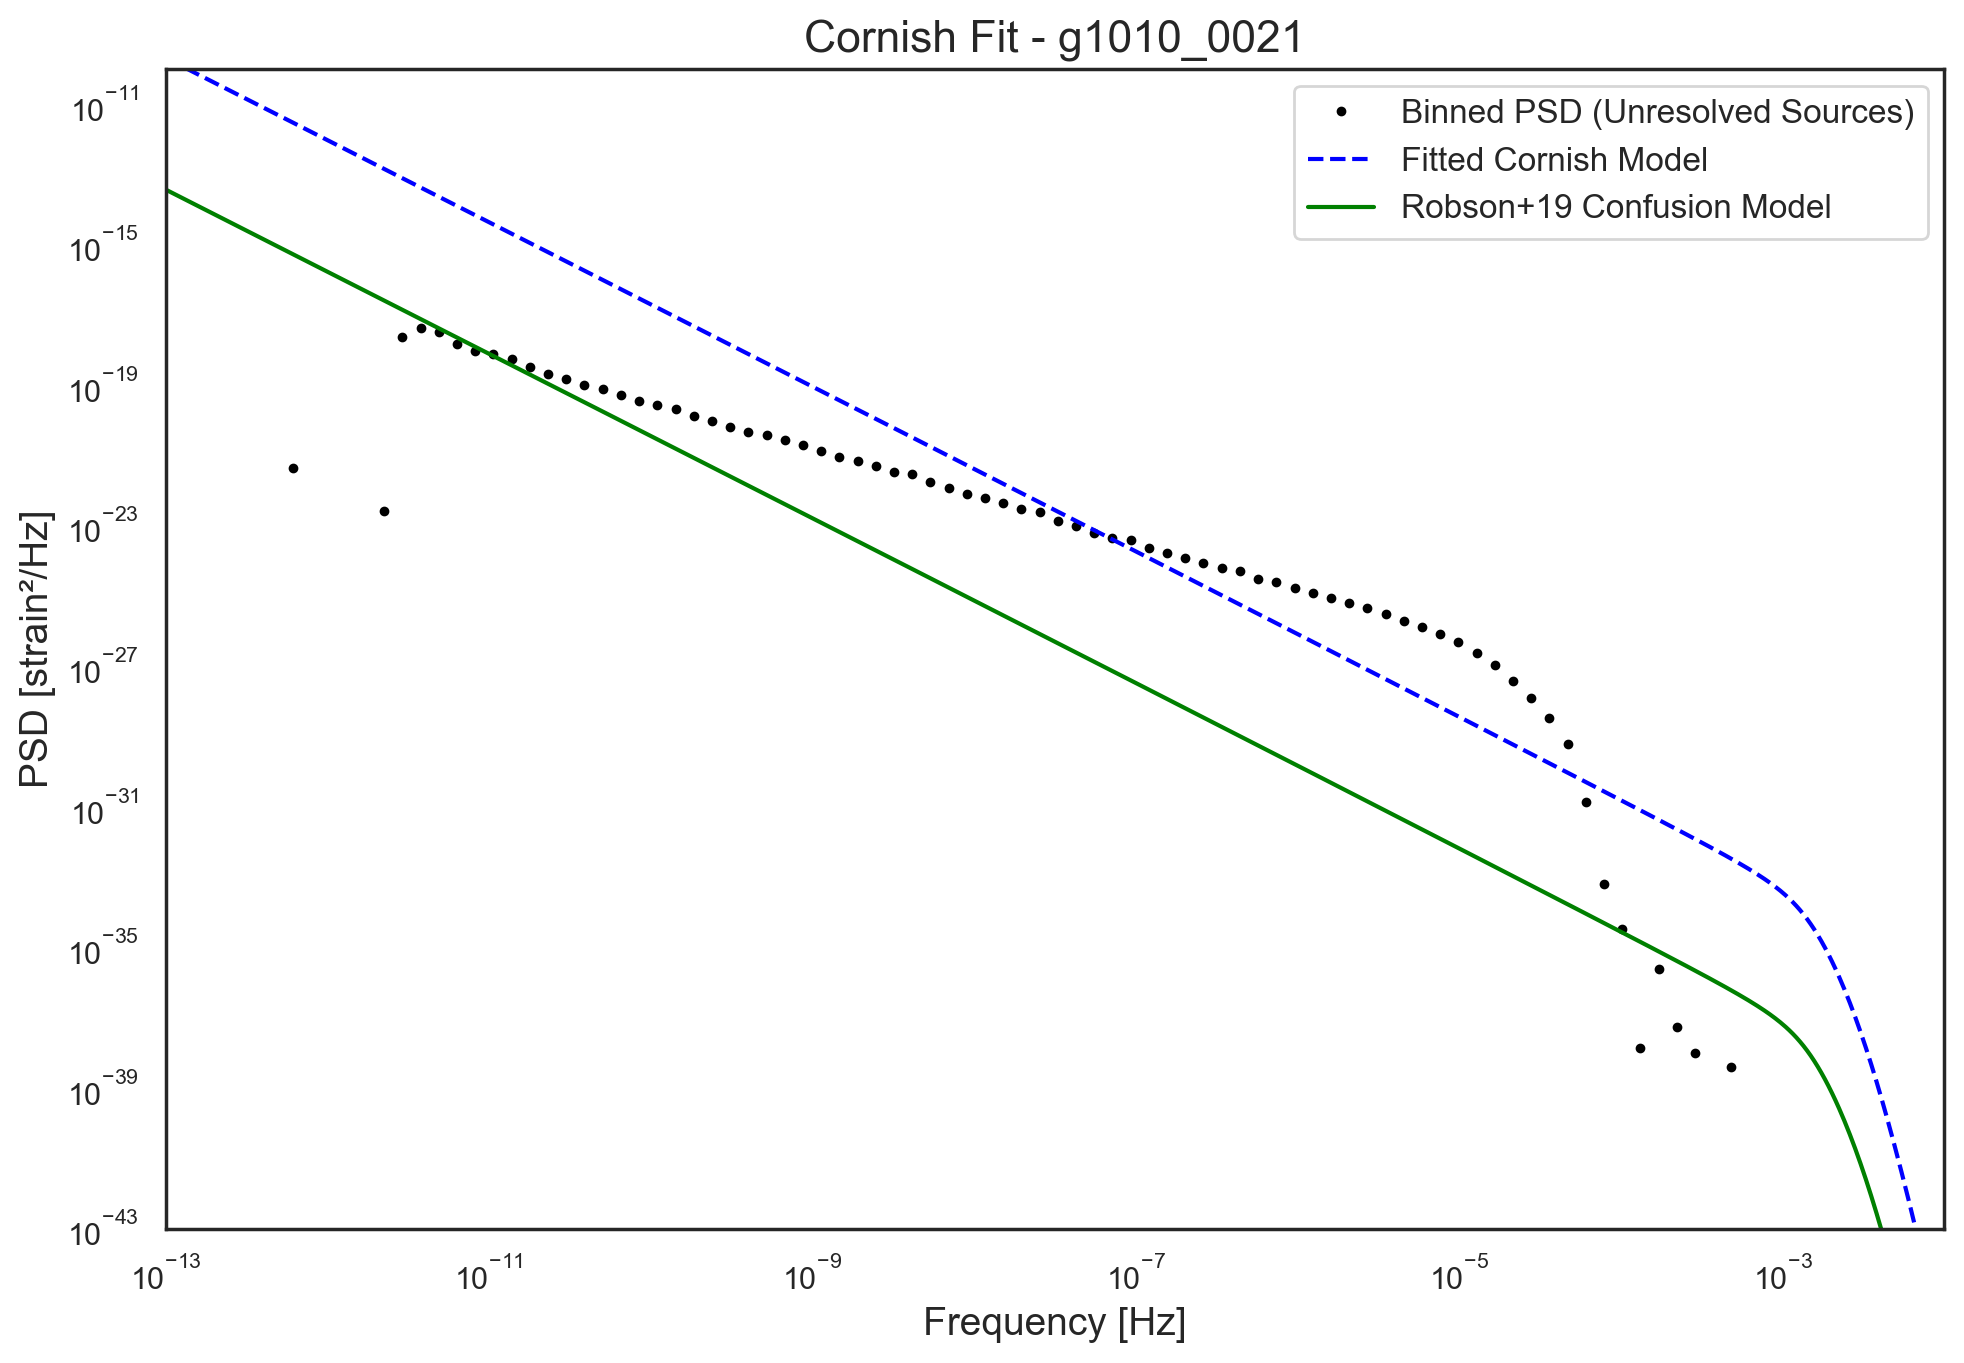

{'Galaxy': 'g1010_0021', 'kstar1': 10, 'kstar2': 10, 'Metallicity': 0.0021, 'Num_Binaries': 75, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [252]:
g1010_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1010_0021_merged.parquet")
dist_1010_0021 = (((g1010_0021['x_kpc'])**2 + (g1010_0021['y_kpc'])**2 + (g1010_0021['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1010_0021, dist_1010_0021, galaxy_name='g1010_0021', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1010_0021',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=10,
    kstar2=10,
    metallicity=0.0021,
    num_binaries=len(f_fit_unresolved)
)
all_results.append(result)
print(result)

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


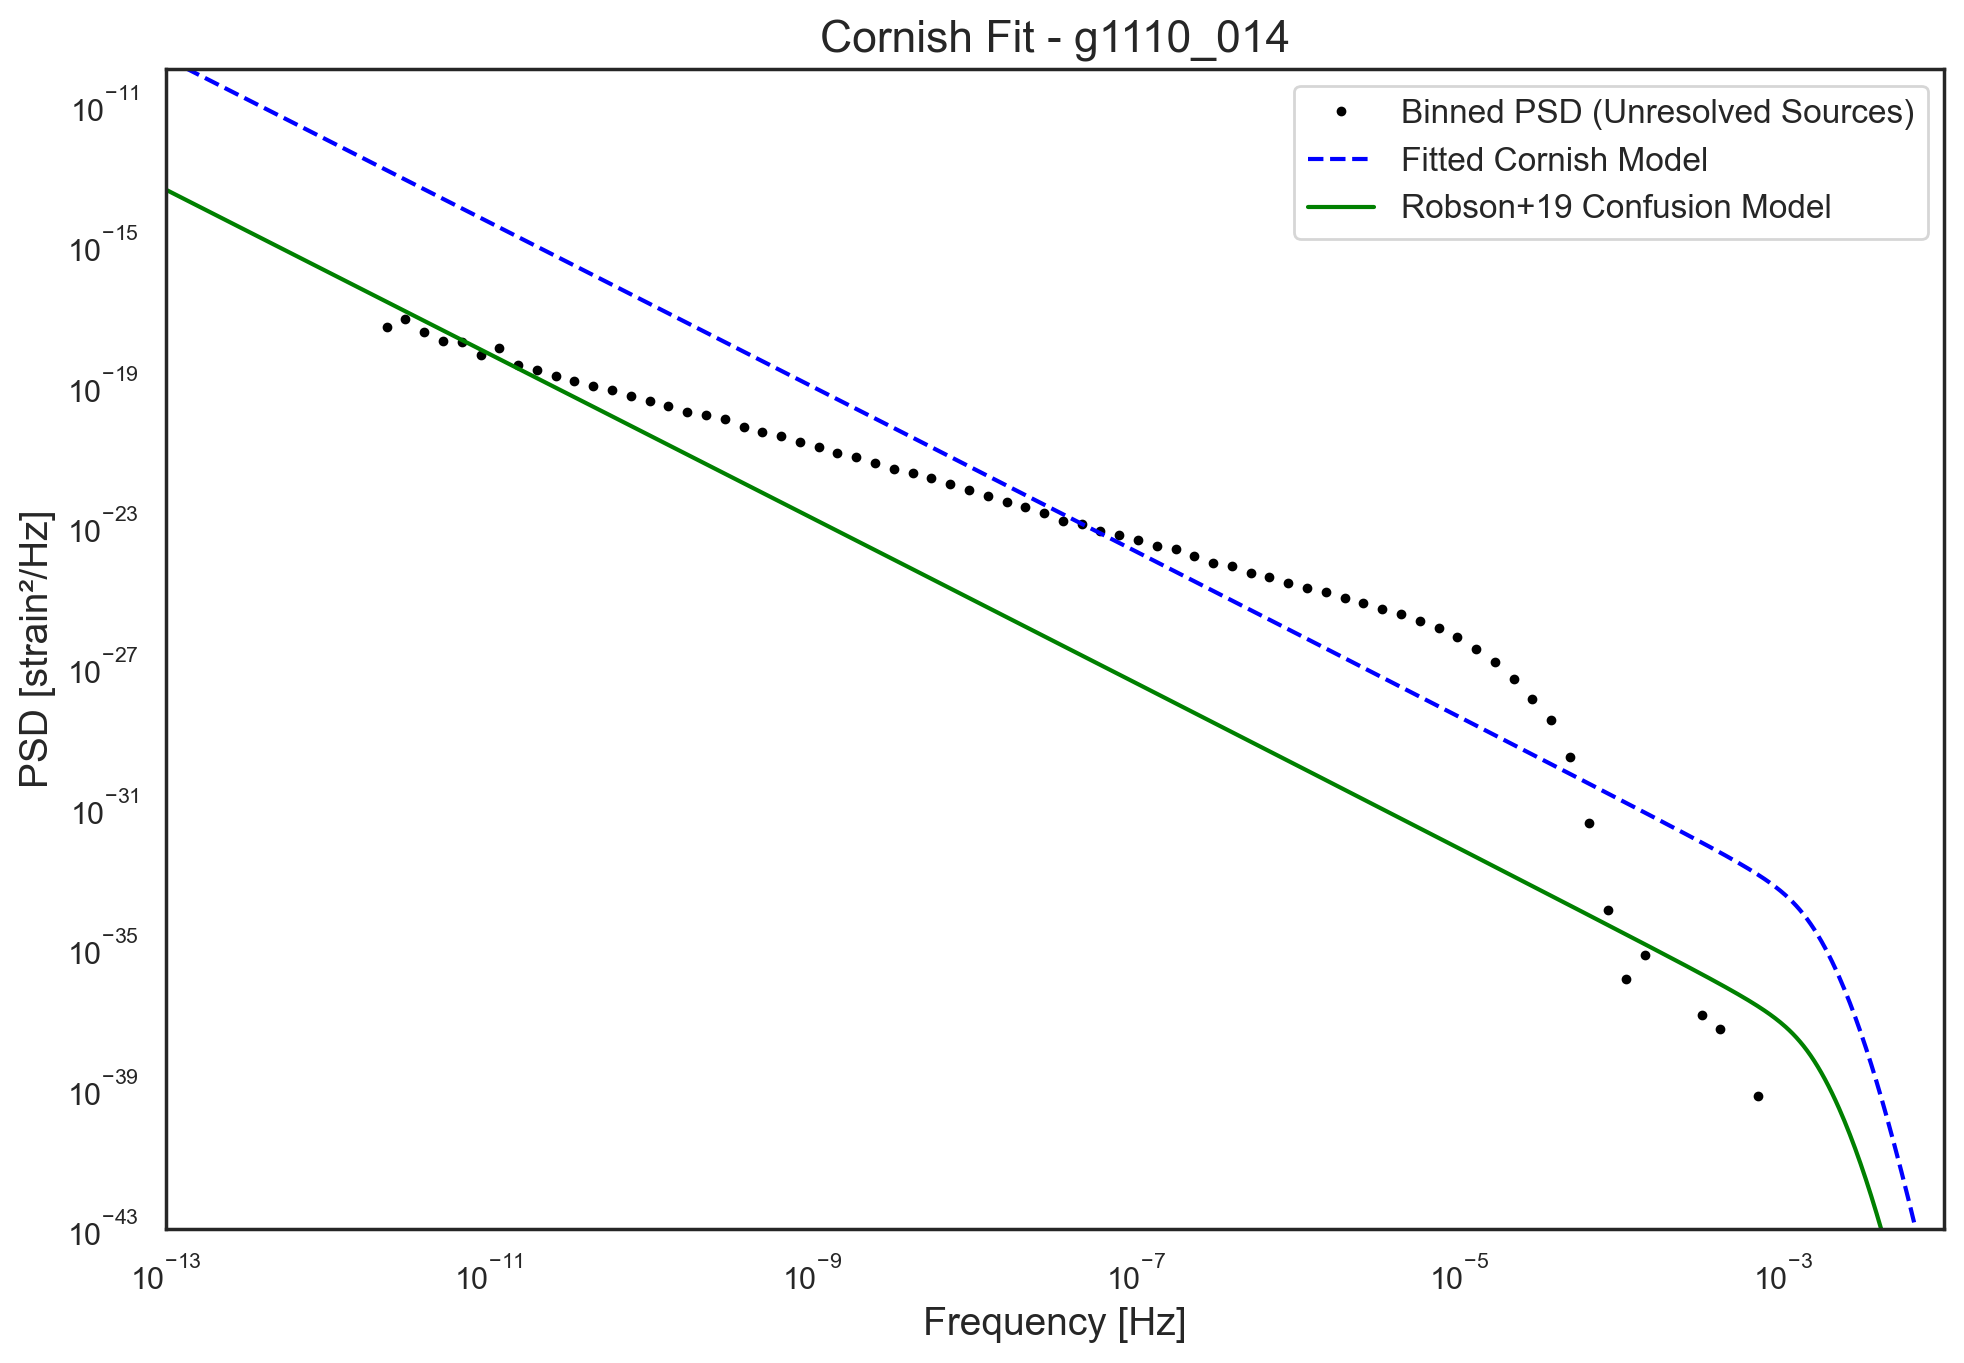

{'Galaxy': 'g1110_014', 'kstar1': 11, 'kstar2': 10, 'Metallicity': 0.014, 'Num_Binaries': 71, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [256]:
g1110_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1110_014_merged.parquet")
dist_1110_014 = (((g1110_014['x_kpc'])**2 + (g1110_014['y_kpc'])**2 + (g1110_014['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1110_014, dist_1110_014, galaxy_name='g1110_014', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1110_014',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=11,
    kstar2=10,
    metallicity=0.014,
    num_binaries=len(f_fit_unresolved)
)
all_results.append(result)
print(result)

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


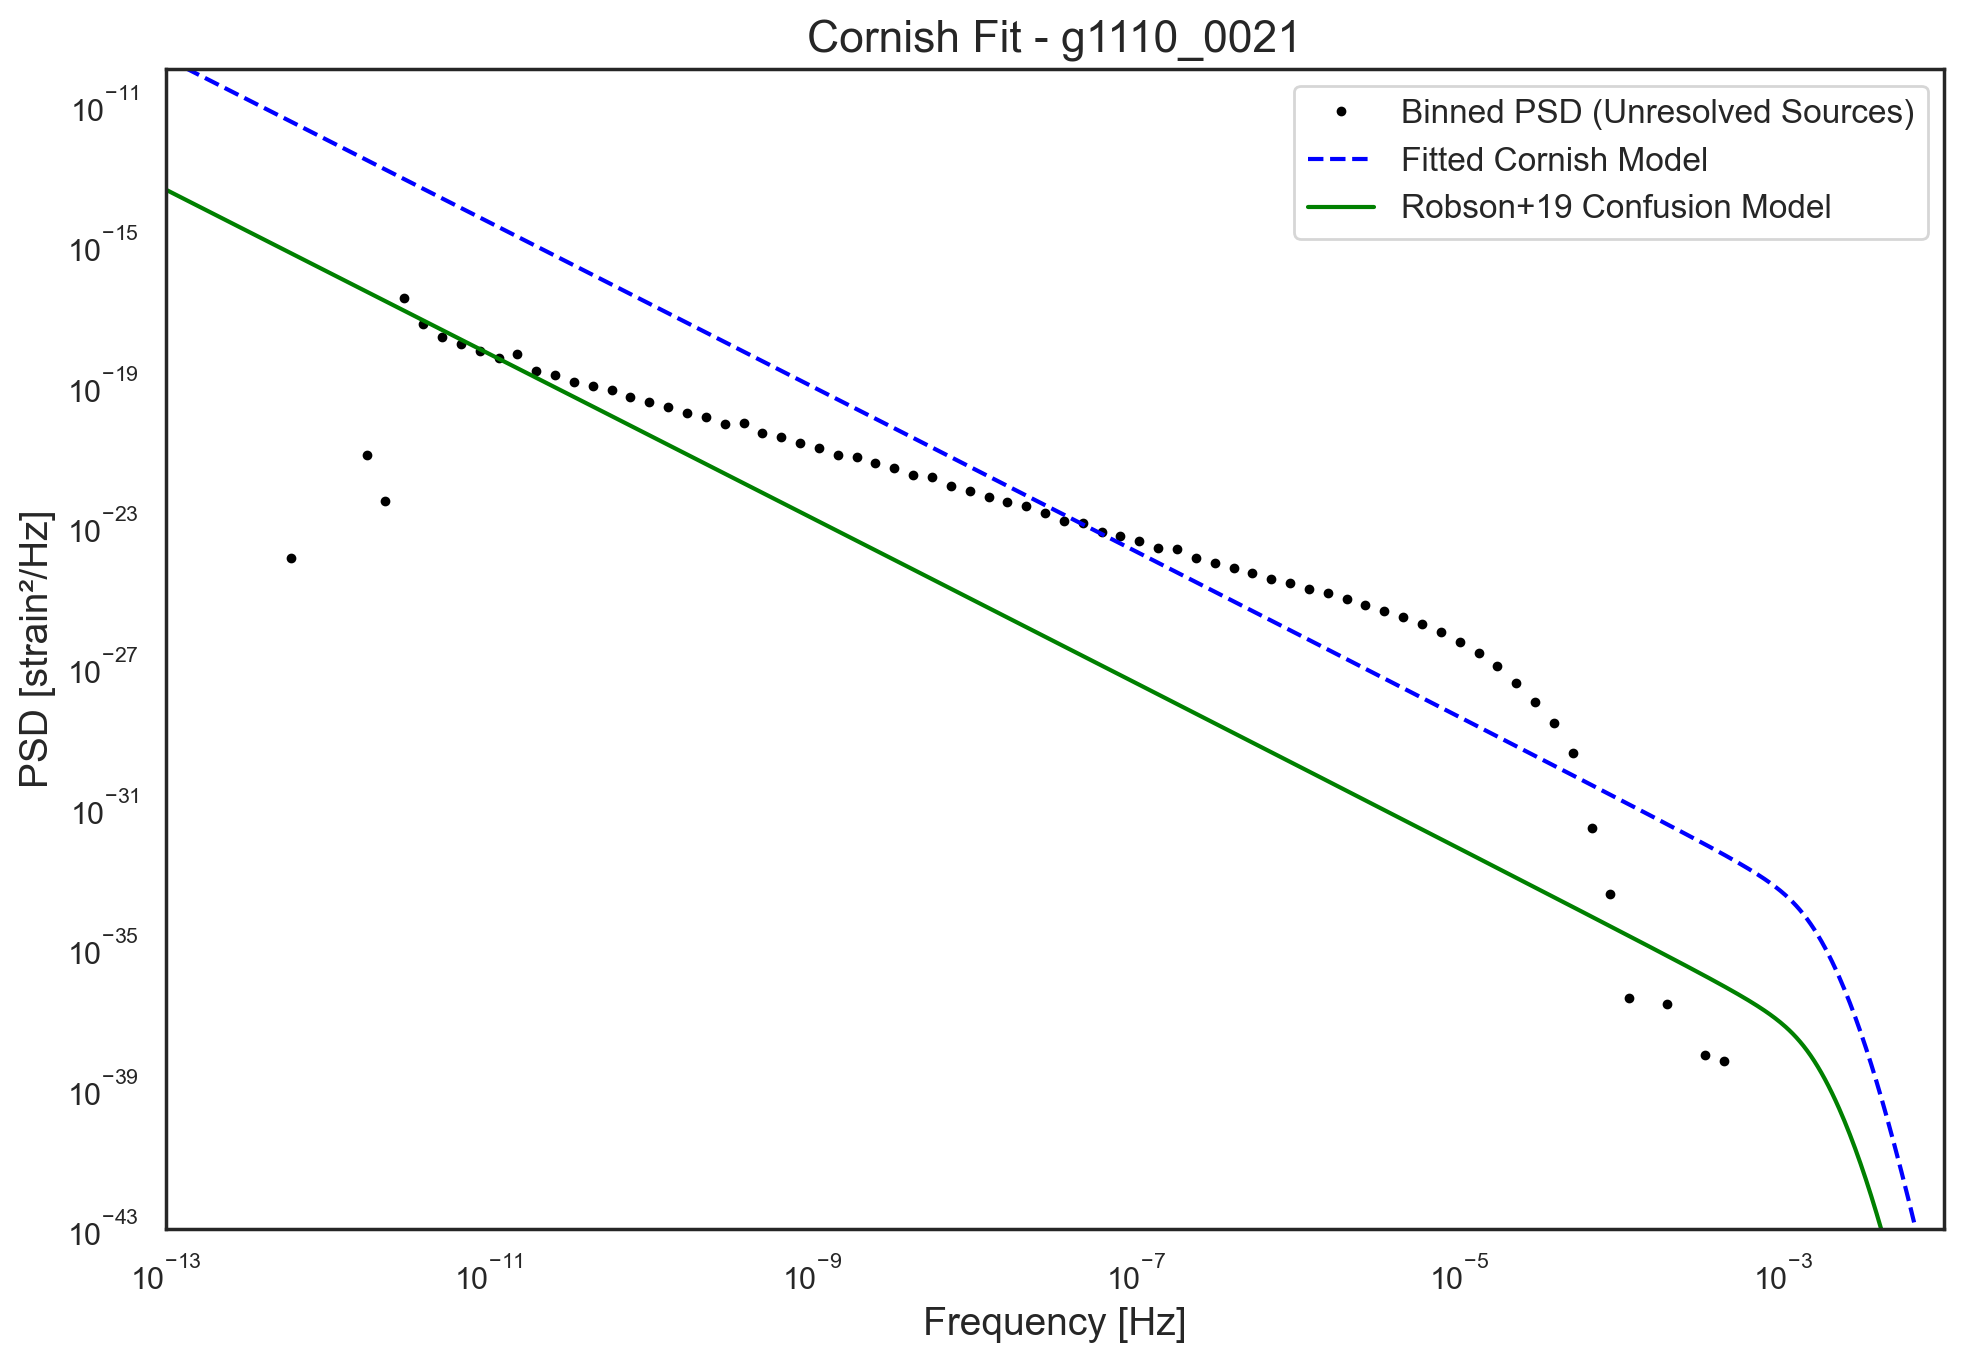

{'Galaxy': 'g1110_0021', 'kstar1': 11, 'kstar2': 10, 'Metallicity': 0.0021, 'Num_Binaries': 72, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [260]:
g1110_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1110_0021_merged.parquet")
dist_1110_0021 = (((g1110_0021['x_kpc'])**2 + (g1110_0021['y_kpc'])**2 + (g1110_0021['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1110_0021, dist_1110_0021, galaxy_name='g1110_0021', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1110_0021',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=11,
    kstar2=10,
    metallicity=0.0021,
    num_binaries=len(f_fit_unresolved)
)
all_results.append(result)
print(result)

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


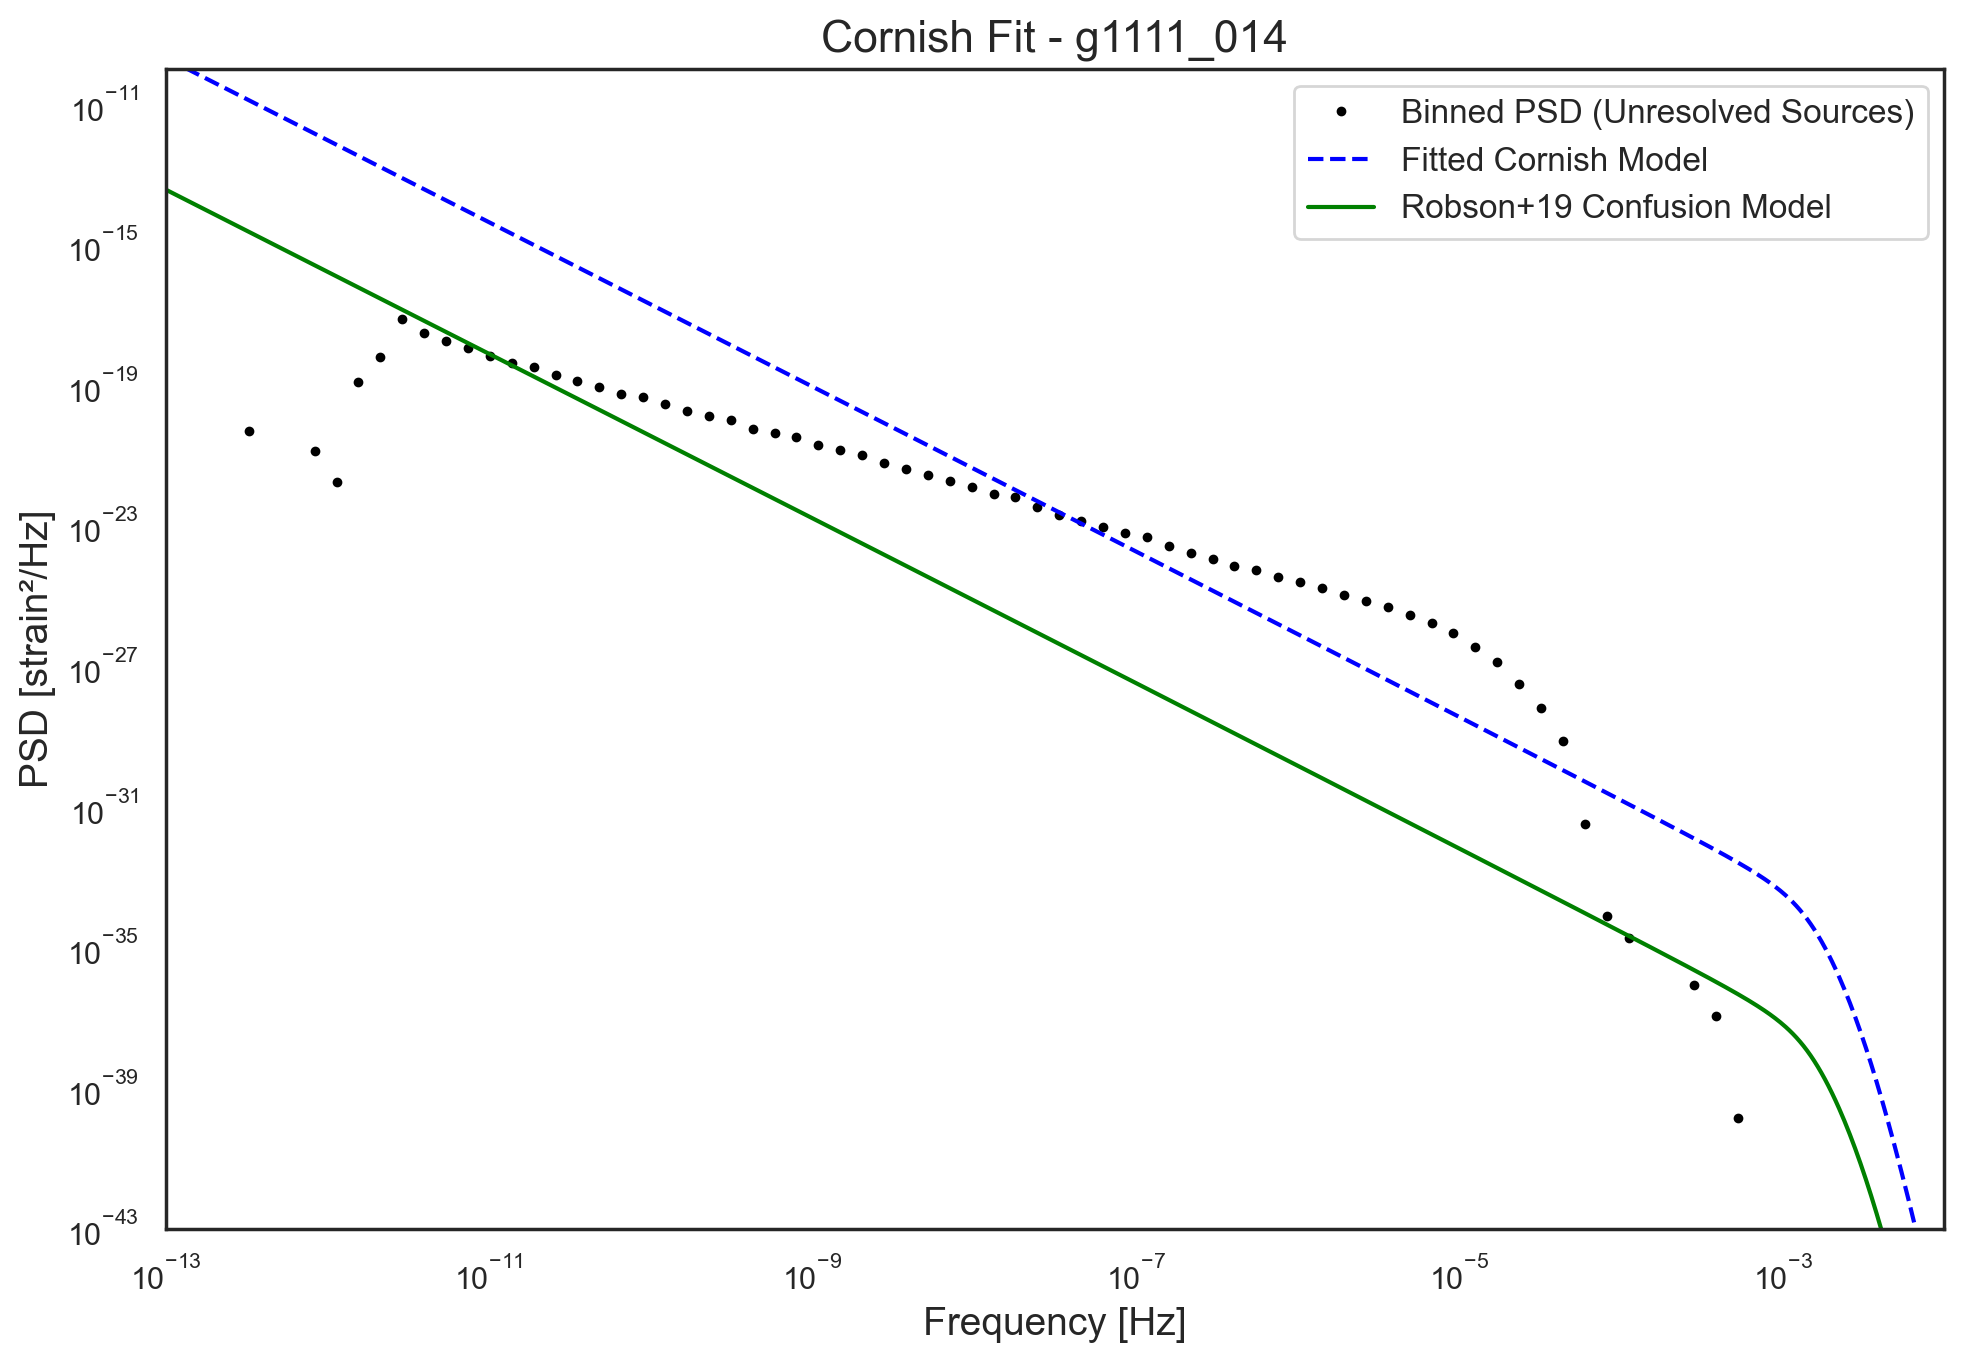

{'Galaxy': 'g1111_014', 'kstar1': 11, 'kstar2': 11, 'Metallicity': 0.014, 'Num_Binaries': 65, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [262]:
g1111_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1111_014_merged.parquet")
dist_1111_014 = (((g1111_014['x_kpc'])**2 + (g1111_014['y_kpc'])**2 + (g1111_014['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1111_014, dist_1111_014, galaxy_name='g1111_014', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1111_014',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=11,
    kstar2=11,
    metallicity=0.014,
    num_binaries=len(f_fit_unresolved)
)
all_results.append(result)
print(result)

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


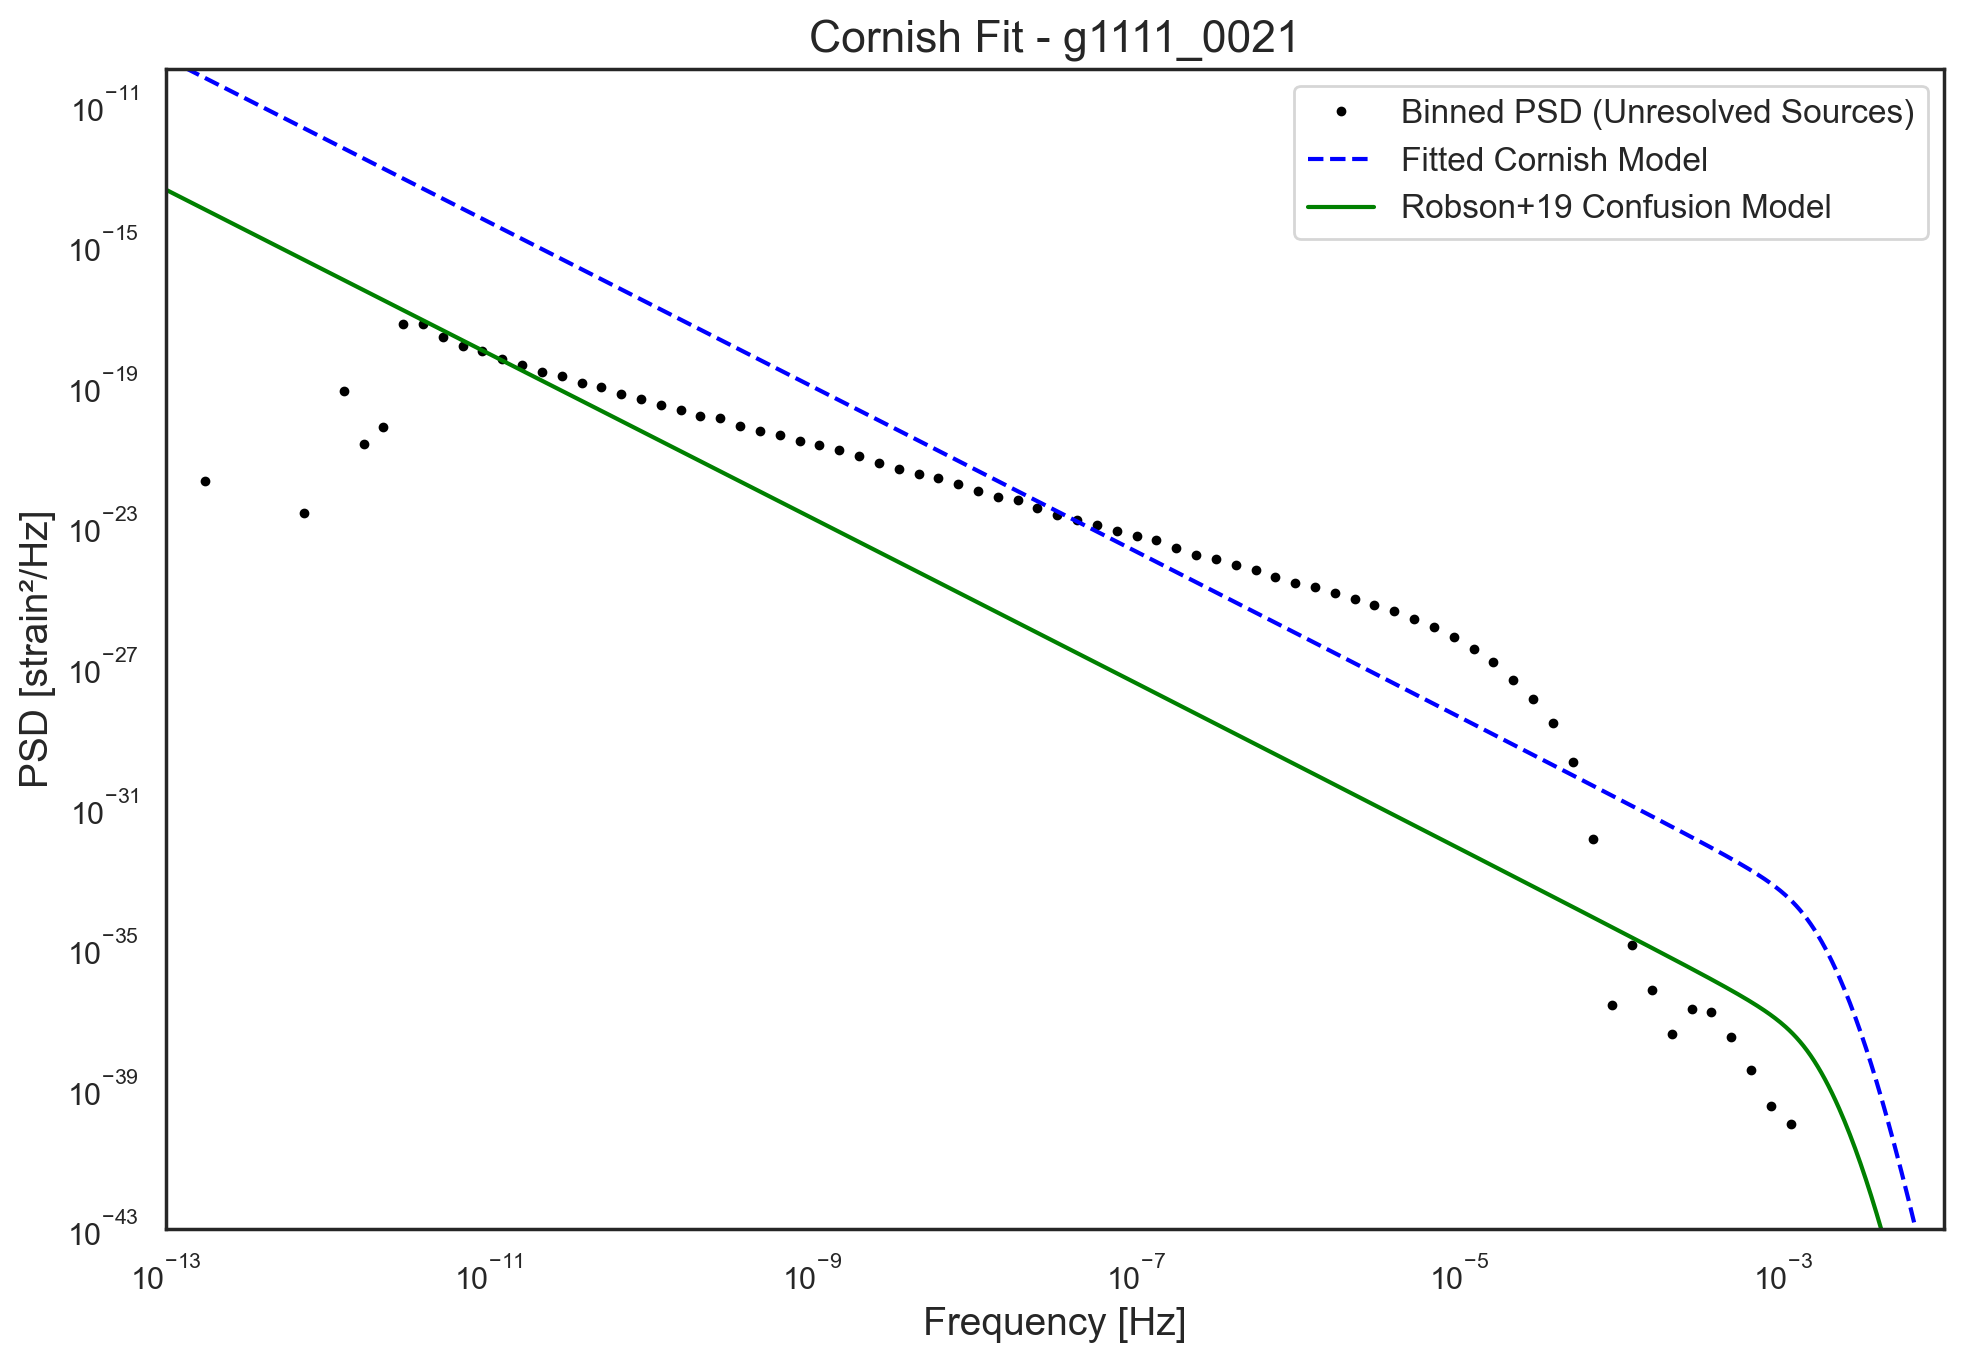

{'Galaxy': 'g1111_0021', 'kstar1': 11, 'kstar2': 11, 'Metallicity': 0.0021, 'Num_Binaries': 76, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [264]:
g1111_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1111_0021_merged.parquet")
dist_1111_0021 = (((g1111_0021['x_kpc'])**2 + (g1111_0021['y_kpc'])**2 + (g1111_0021['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1111_0021, dist_1111_0021, galaxy_name='g1111_0021', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1111_0021',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=11,
    kstar2=11,
    metallicity=0.0021,
    num_binaries=len(f_fit_unresolved)
)
all_results.append(result)
print(result)

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


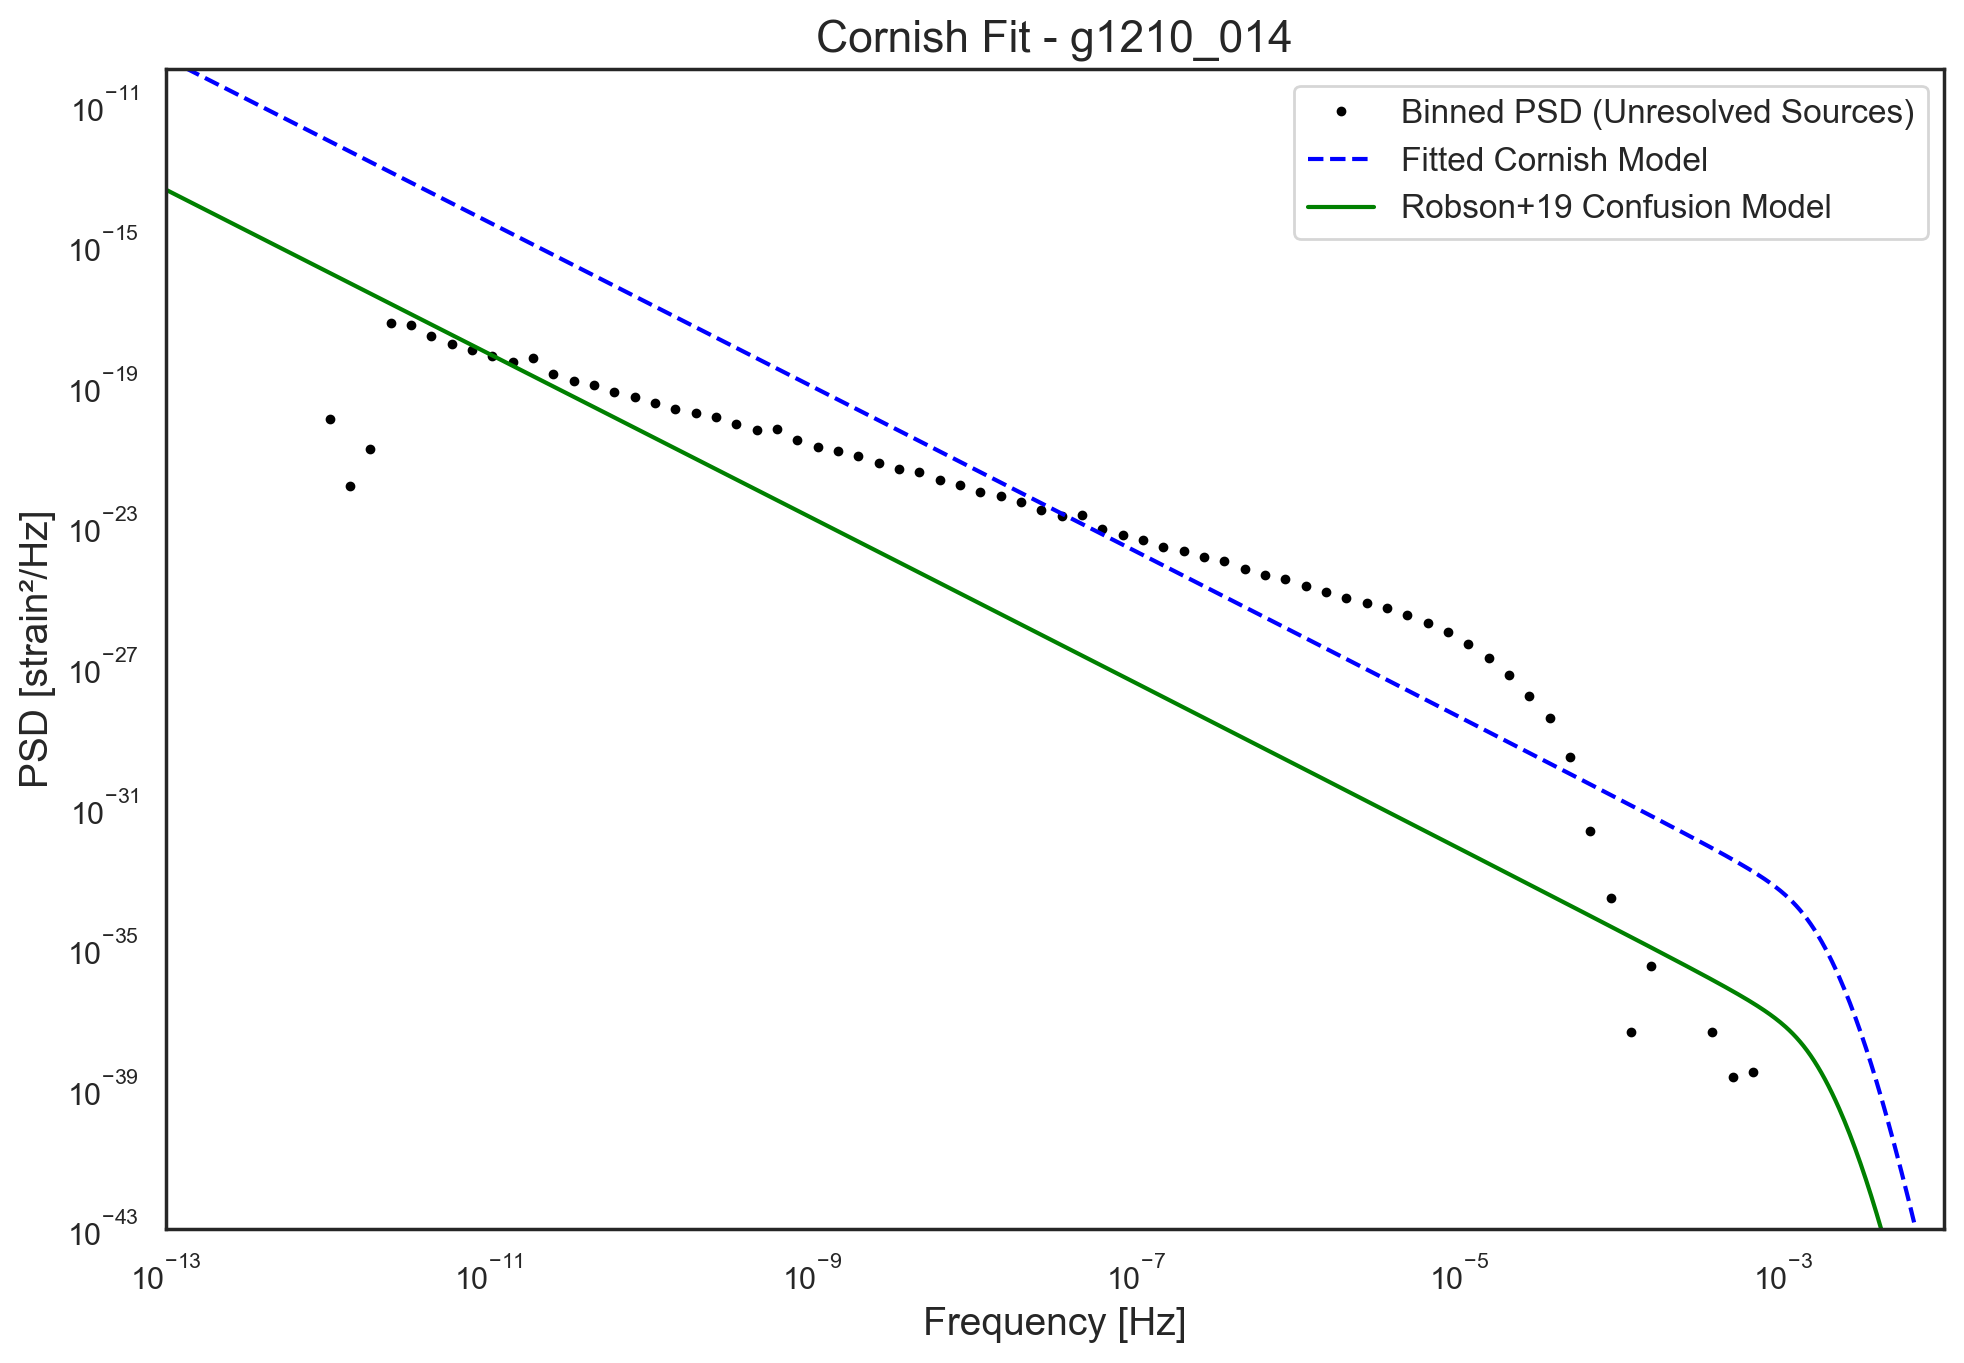

{'Galaxy': 'g1210_014', 'kstar1': 12, 'kstar2': 10, 'Metallicity': 0.014, 'Num_Binaries': 69, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [266]:
g1210_014 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_014_merged.parquet")
dist_1210_014 = (((g1210_014['x_kpc'])**2 + (g1210_014['y_kpc'])**2 + (g1210_014['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1210_014, dist_1210_014, galaxy_name='g1210_014', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1210_014',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=12,
    kstar2=10,
    metallicity=0.014,
    num_binaries=len(f_fit_unresolved)
)
all_results.append(result)
print(result)

/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator


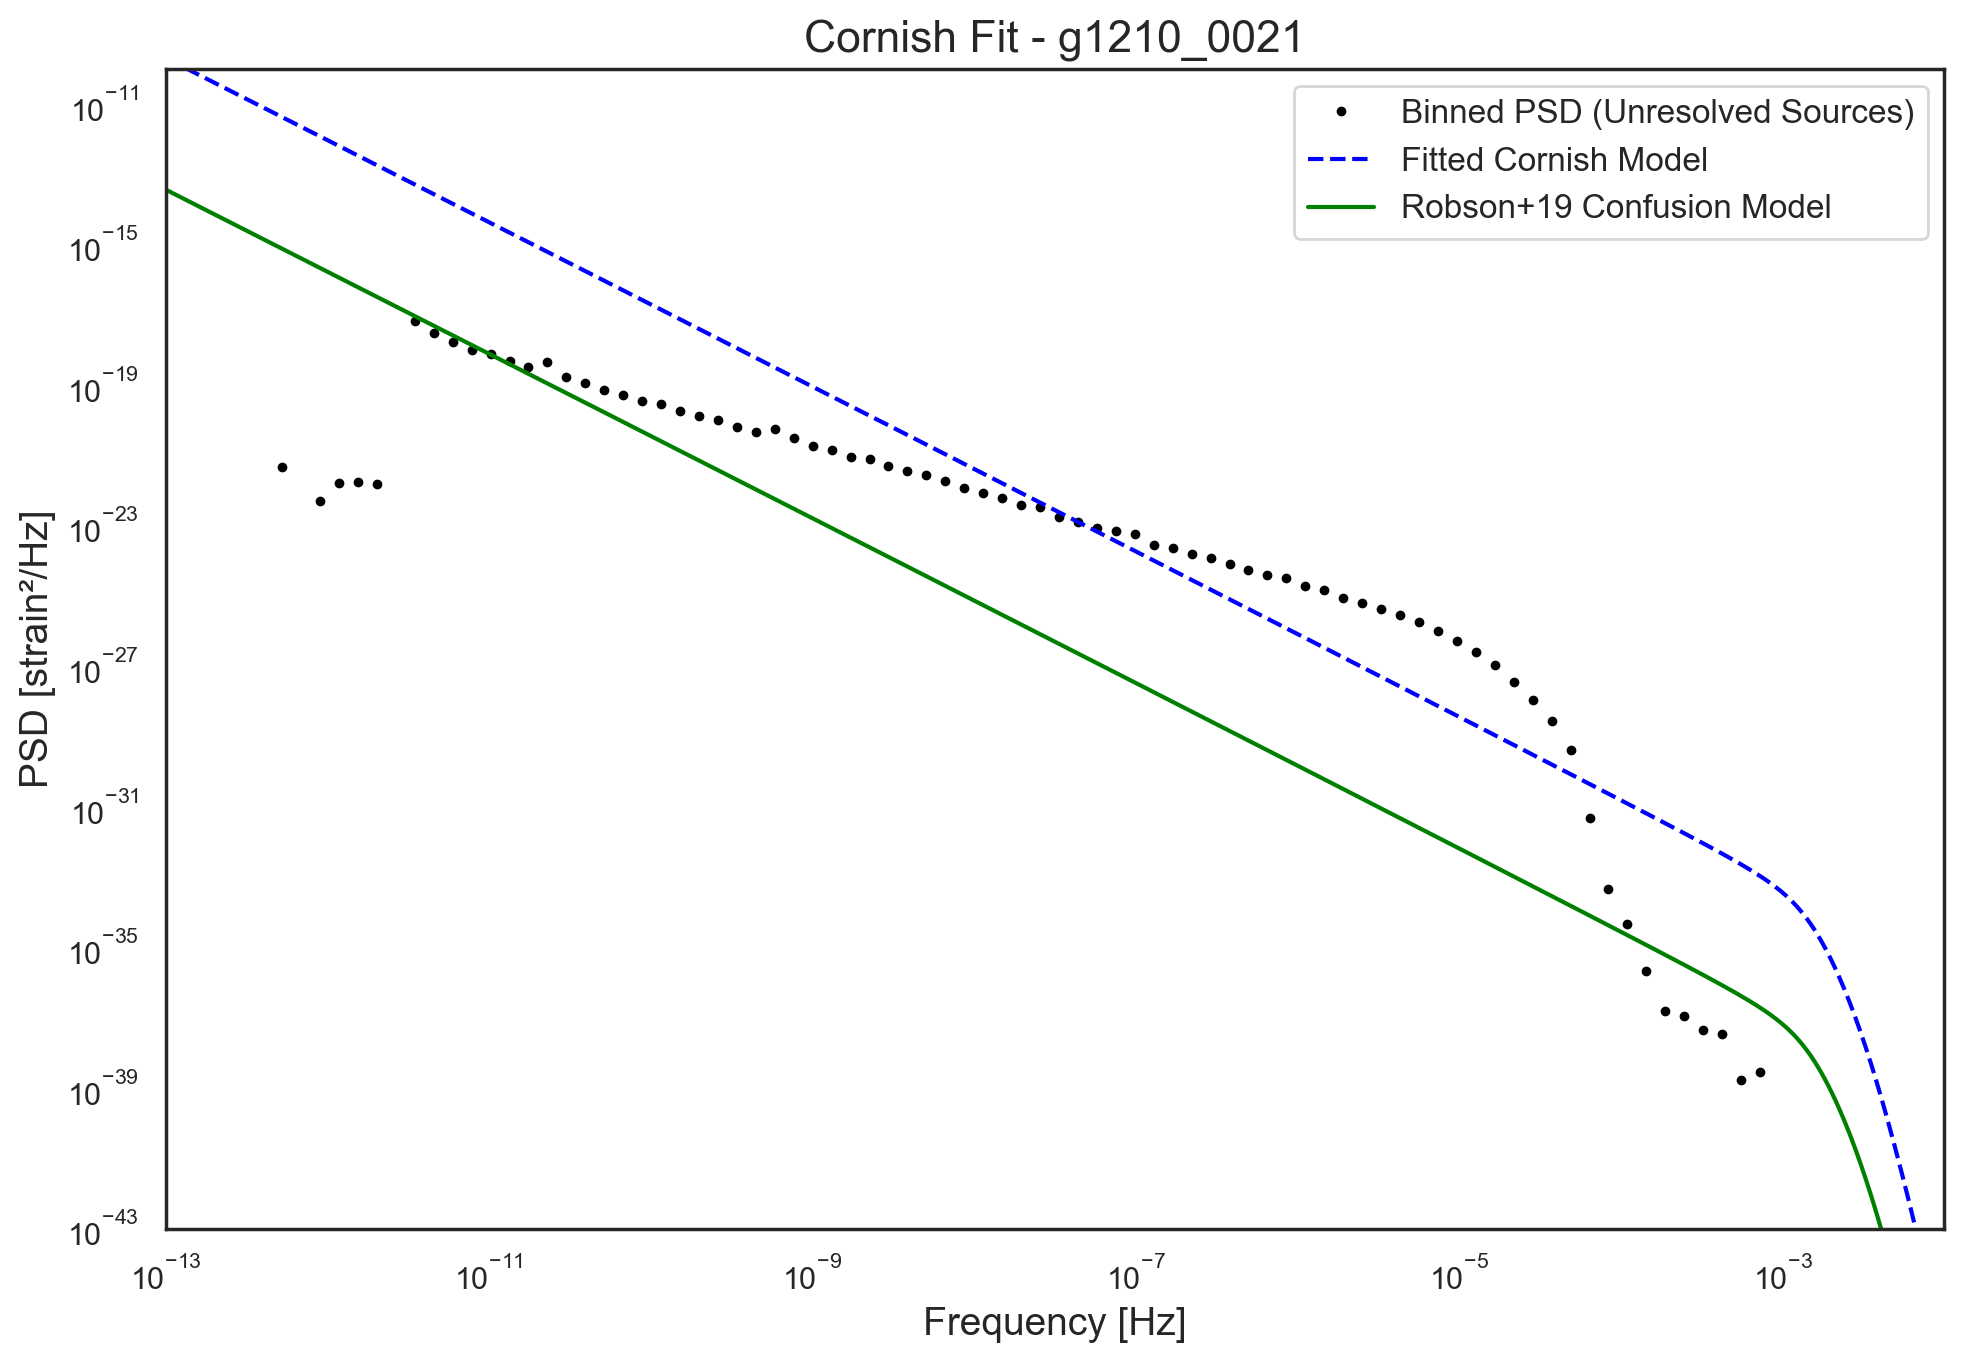

{'Galaxy': 'g1210_0021', 'kstar1': 12, 'kstar2': 10, 'Metallicity': 0.0021, 'Num_Binaries': 77, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}


In [268]:
g1210_0021 = pd.read_parquet("/Users/neelpanchal/extracted_data/g1210_0021_merged.parquet")
dist_1210_0021 = (((g1210_0021['x_kpc'])**2 + (g1210_0021['y_kpc'])**2 + (g1210_0021['z_kpc'])**2)**(0.5)).values * u.kpc

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1210_0021, dist_1210_0021, galaxy_name='g1210_0021', plot=False
)

result = fit_cornish_and_store_with_plot(
    galaxy_name='g1210_0021',
    f_fit_unresolved=f_fit_unresolved,
    psd_fit_unresolved=psd_fit_unresolved,
    kstar1=12,
    kstar2=10,
    metallicity=0.0021,
    num_binaries=len(f_fit_unresolved)
)
all_results.append(result)
print(result)

In [274]:
print(all_results)

[{'Galaxy': 'g1010_014', 'kstar1': 10, 'kstar2': 10, 'Metallicity': 0.014, 'Num_Binaries': 68, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}, {'Galaxy': 'g1010_0021', 'kstar1': 10, 'kstar2': 10, 'Metallicity': 0.0021, 'Num_Binaries': 75, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}, {'Galaxy': 'g1110_014', 'kstar1': 11, 'kstar2': 10, 'Metallicity': 0.014, 'Num_Binaries': 71, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}, {'Galaxy': 'g1110_0021', 'kstar1': 11, 'kstar2': 10, 'Metallicity': 0.0021, 'Num_Binaries': 72, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}, {'Galaxy': 'g1111_014', 'kstar1': 11, 'kstar2': 11, 'Metallicity': 0.014, 'Num_Binaries': 65, 'A': 5.00005e-41, 'alpha': 0.138, 'beta': -221.0, 'kappa': 521.0, 'gamma': 1680.0, 'f_k': 0.00113}, {'Galaxy': 'g1111_0021', 

In [272]:
import pandas as pd
df_results = pd.DataFrame(all_results)

In [292]:
print(df_results)

       Galaxy  kstar1  kstar2  Metallicity  Num_Binaries             A  alpha  \
0   g1010_014      10      10       0.0140            68  5.000050e-41  0.138   
1  g1010_0021      10      10       0.0021            75  5.000050e-41  0.138   
2   g1110_014      11      10       0.0140            71  5.000050e-41  0.138   
3  g1110_0021      11      10       0.0021            72  5.000050e-41  0.138   
4   g1111_014      11      11       0.0140            65  5.000050e-41  0.138   
5  g1111_0021      11      11       0.0021            76  5.000050e-41  0.138   
6   g1210_014      12      10       0.0140            69  5.000050e-41  0.138   
7  g1210_0021      12      10       0.0021            77  5.000050e-41  0.138   

    beta  kappa   gamma      f_k  
0 -221.0  521.0  1680.0  0.00113  
1 -221.0  521.0  1680.0  0.00113  
2 -221.0  521.0  1680.0  0.00113  
3 -221.0  521.0  1680.0  0.00113  
4 -221.0  521.0  1680.0  0.00113  
5 -221.0  521.0  1680.0  0.00113  
6 -221.0  521.0  1680.0  

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from legwork import psd

# Set Seaborn style
sns.set_style("white")
sns.set_palette("bright")

# Load your no-bounds Cornish parameters
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Cornish Model function
def cornish_psd(f, A, alpha, beta, kappa, gamma, f_k):
    return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))

# Frequency range for plotting Cornish and Robson
freqs_plot = np.logspace(-13, -2, 1000) * u.Hz  # Frequencies WITH units now
robson_confusion = psd.get_confusion_noise_robson19(freqs_plot)

# Mapping galaxy name to file
galaxy_info = {
    "g1010_014": "g1010_014_merged.parquet",
    "g1010_0021": "g1010_0021_merged.parquet",
    "g1110_014": "g1110_014_merged.parquet",
    "g1110_0021": "g1110_0021_merged.parquet",
    "g1111_014": "g1111_014_merged.parquet",
    "g1111_0021": "g1111_0021_merged.parquet",
    "g1210_014": "g1210_014_merged.parquet",
    "g1210_0021": "g1210_0021_merged.parquet",
}

# Now plotting loop
for idx, row in df.iterrows():
    galaxy_name = row['Galaxy']

    # Load the corresponding galaxy data
    galaxy_data = pd.read_parquet(f"/Users/neelpanchal/extracted_data/{galaxy_info[galaxy_name]}")
    dist_array = np.sqrt(
        galaxy_data['x_kpc'].values**2 +
        galaxy_data['y_kpc'].values**2 +
        galaxy_data['z_kpc'].values**2
    ) * u.kpc

    # --- Use your bin_unresolved_galaxy() ---
    f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
        galaxy_data, dist_array, galaxy_name=galaxy_name, plot=False
    )

    # Cornish fit using saved parameters
    A = row['A']
    alpha = row['alpha']
    beta = row['beta']
    kappa = row['kappa']
    gamma = row['gamma']
    f_k = row['f_k']

    cornish_fit = cornish_psd(freqs_plot.value, A, alpha, beta, kappa, gamma, f_k)

    # Plot
    plt.figure(figsize=(10, 7))
    
    # Binned unresolved sources
    plt.loglog(f_fit_unresolved, psd_fit_unresolved, '.', color='black', markersize=4, label='Binned Unresolved PSD')
    
    # Cornish Fit (no bounds)
    plt.loglog(freqs_plot.value, cornish_fit, '-', color='red', lw=1.5, label='Unbounded Cornish Fit')
    
    # Robson+19 Confusion Model
    plt.loglog(freqs_plot.value, robson_confusion.value, '-', color='blue', lw=1.5, label='Cornish+19 Confusion')

    plt.xlabel('Frequency [Hz]', fontsize=14)
    plt.ylabel('PSD [strain²/Hz]', fontsize=14)
    plt.title(f'Model Fit on {galaxy_name}', fontsize=18)
    plt.xlim(1e-13, 1e-2)
    plt.ylim(1e-43, 1e-10)
    plt.grid(False)
    plt.legend(fontsize=11)
    plt.tight_layout()

    # Save
    plt.savefig(f"/Users/neelpanchal/extracted_data/cornish_nb_{galaxy_name}.png", dpi=300)
    plt.close()

print("✅ All plots with Cornish Fit + Unresolved PSD + Robson Confusion saved!")


/opt/anaconda3/lib/python3.12/site-packages/legwork/utils.py:90: RuntimeWarning: divide by zero encountered in divide
  f = numerator / denominator
/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1462/541801793.py:17: RuntimeWarning: overflow encountered in exp
  return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))
/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1462/541801793.py:17: RuntimeWarning: invalid value encountered in multiply
  return A * f**(-7/3) * np.exp(-f**alpha + beta * f * np.sin(kappa * f)) * (1 + np.tanh(gamma * (f_k - f)))


✅ All plots with Cornish Fit + Unresolved PSD + Robson Confusion saved!


/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1194/1301737142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


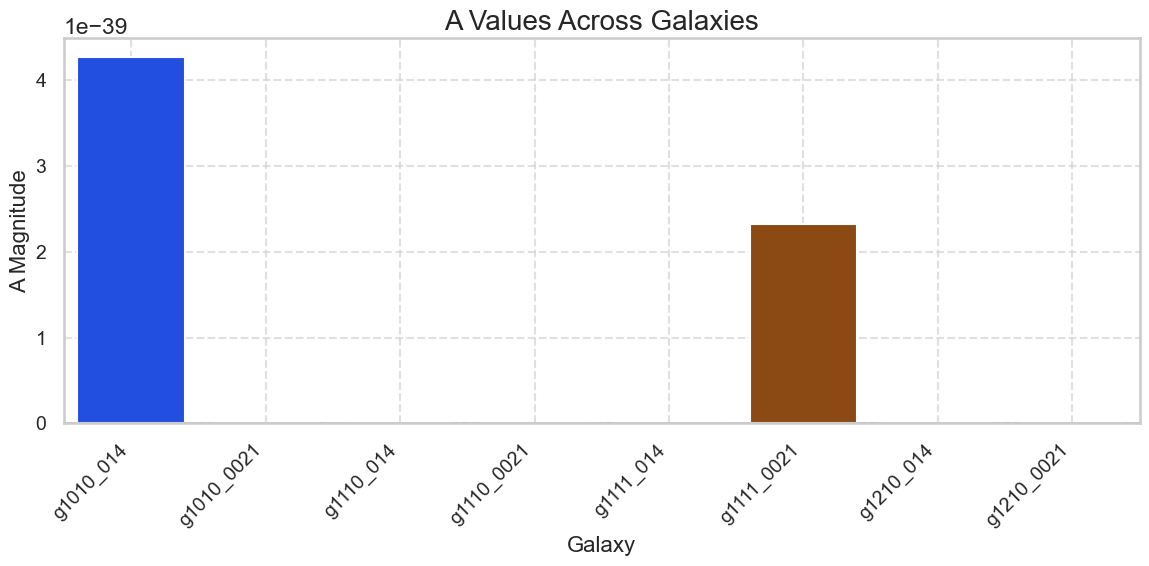

✅ Saved clean plot for A


/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1194/1301737142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


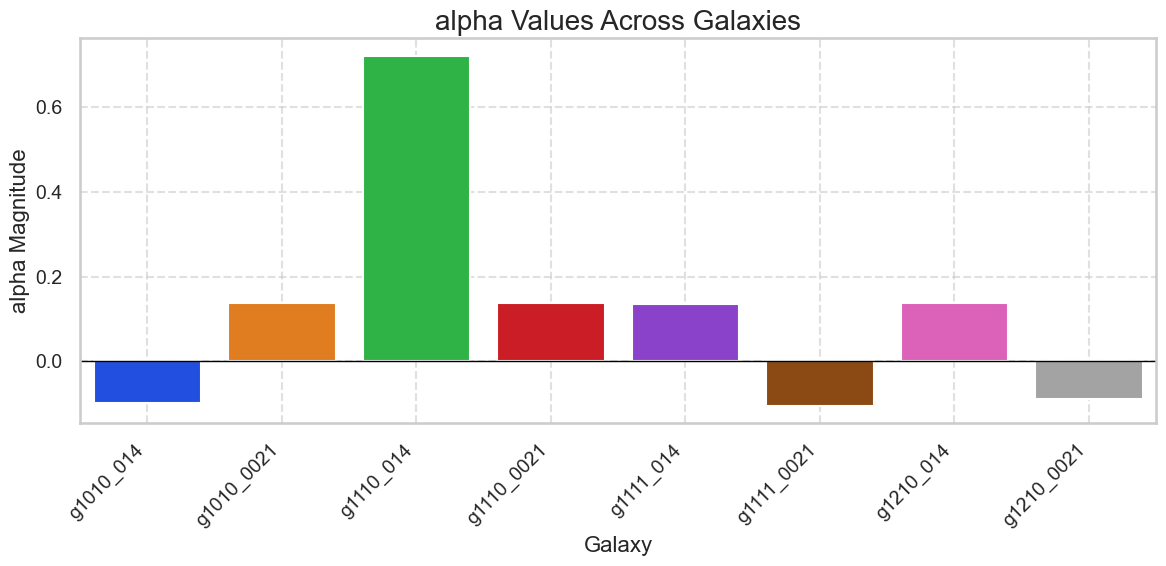

✅ Saved clean plot for alpha


/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1194/1301737142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


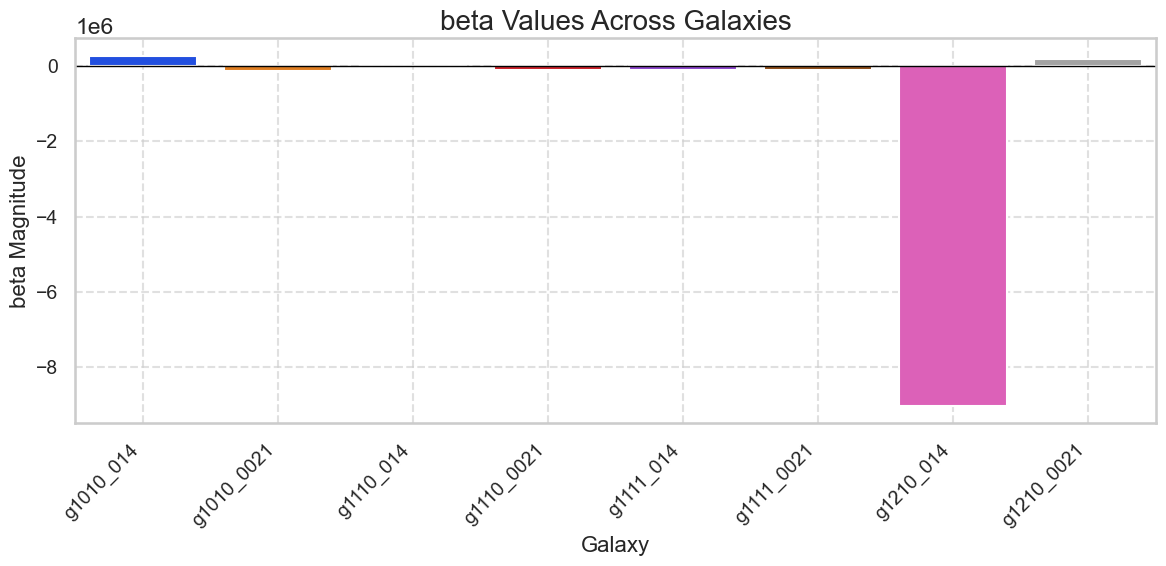

✅ Saved clean plot for beta


/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1194/1301737142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


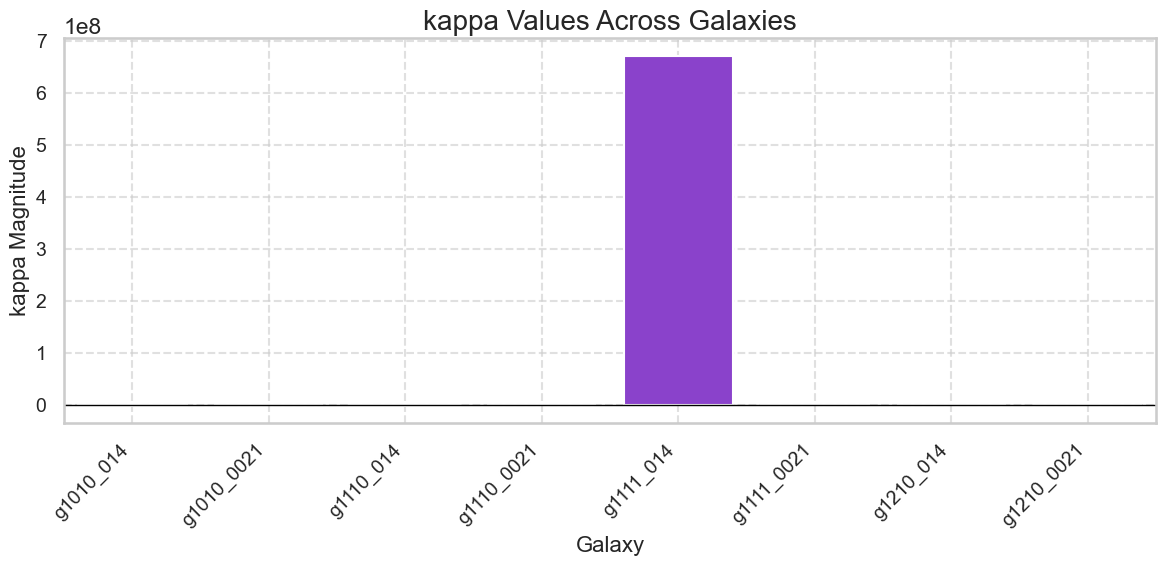

✅ Saved clean plot for kappa


/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1194/1301737142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


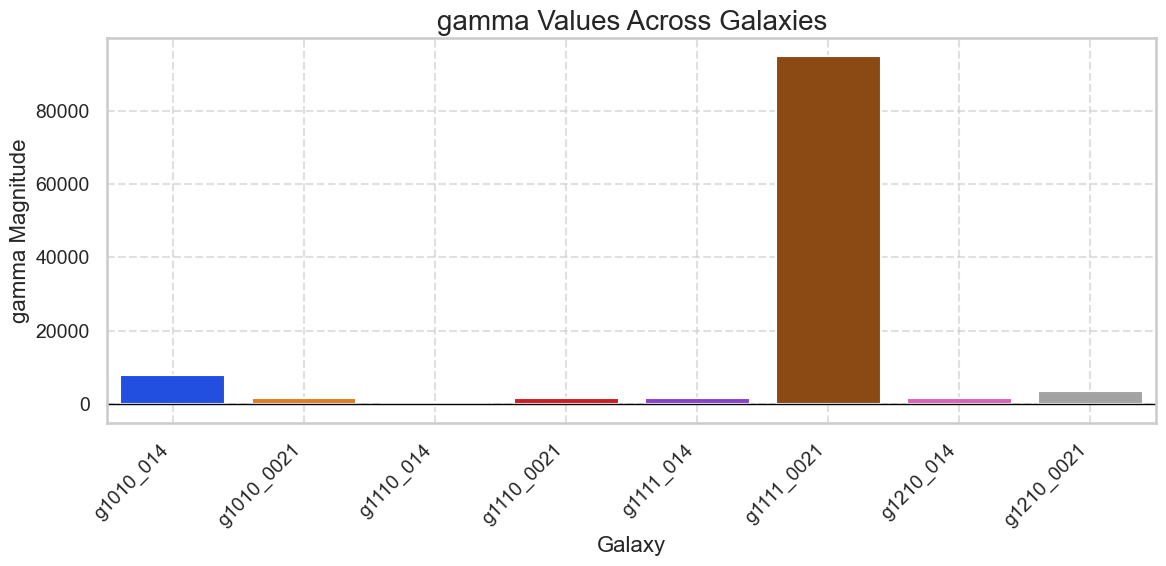

✅ Saved clean plot for gamma


/var/folders/jj/jfny2myd4dj1dqmsylqvvyrr0000gn/T/ipykernel_1194/1301737142.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


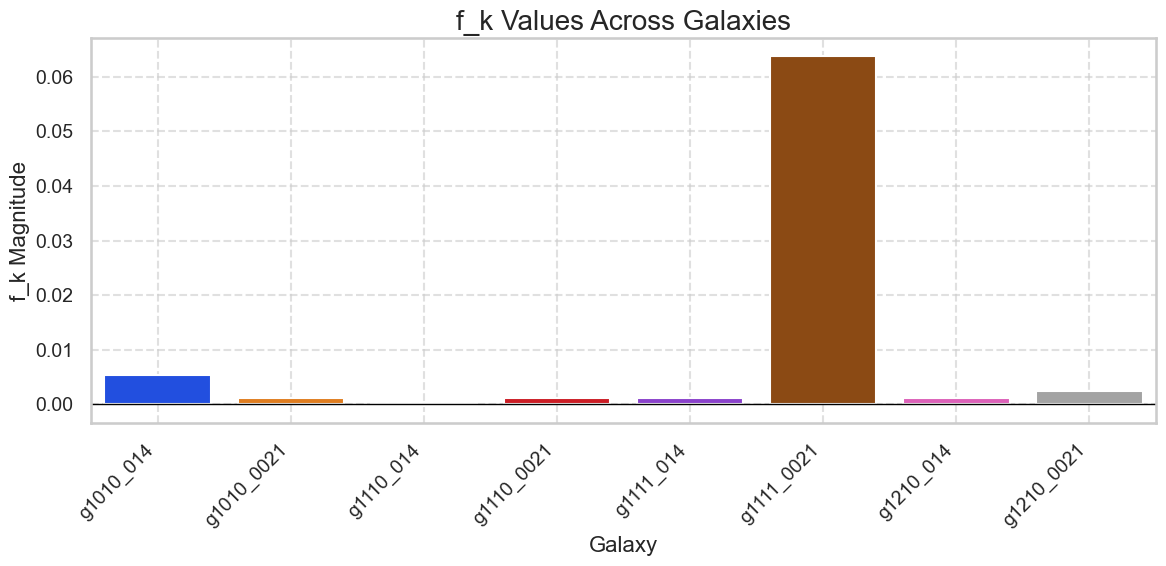

✅ Saved clean plot for f_k


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn
sns.set_context("talk")
sns.set_style("whitegrid")

# Load your Loose Bounds CSV
loose = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Parameters
params = ['A', 'alpha', 'beta', 'kappa', 'gamma', 'f_k']

# Galaxies (for consistent order)
galaxies = loose['Galaxy']

# Plot for each parameter separately
for param in params:
    plt.figure(figsize=(12,6))
    
    sns.barplot(
        x=galaxies,
        y=loose[param],
        palette="bright"
    )
    
    # Horizontal line at 0
    plt.axhline(0, color='black', lw=1)
    
    plt.title(f"{param} Values Across Galaxies", fontsize=20)
    plt.xlabel("Galaxy", fontsize=16)
    plt.ylabel(f"{param} Magnitude", fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    plt.savefig(f"/Users/neelpanchal/extracted_data/{param}_distribution_histogram.png", dpi=500, bbox_inches='tight')
    plt.show()

    print(f"✅ Saved clean plot for {param}")

In [3]:
print(loose)

       Galaxy  kstar1  kstar2  Metallicity  Num_Binaries             A  \
0   g1010_014      10      10       0.0140            68  4.276937e-39   
1  g1010_0021      10      10       0.0021            75  8.999895e-45   
2   g1110_014      11      10       0.0140            71  4.639862e-45   
3  g1110_0021      11      10       0.0021            72  8.999896e-45   
4   g1111_014      11      11       0.0140            65  8.989612e-45   
5  g1111_0021      11      11       0.0021            76  2.327126e-39   
6   g1210_014      12      10       0.0140            69  8.999873e-45   
7  g1210_0021      12      10       0.0021            77  1.416501e-42   

      alpha          beta         kappa         gamma       f_k  
0 -0.099057  2.753585e+05 -2.802195e+05   7925.996035  0.005331  
1  0.137980 -1.355181e+05  4.504873e+03   1679.765683  0.001130  
2  0.720013  1.302158e+04 -8.098802e+05   -421.713448 -0.000283  
3  0.137980 -8.857375e+04  1.616796e+05   1679.766887  0.001130  
4  

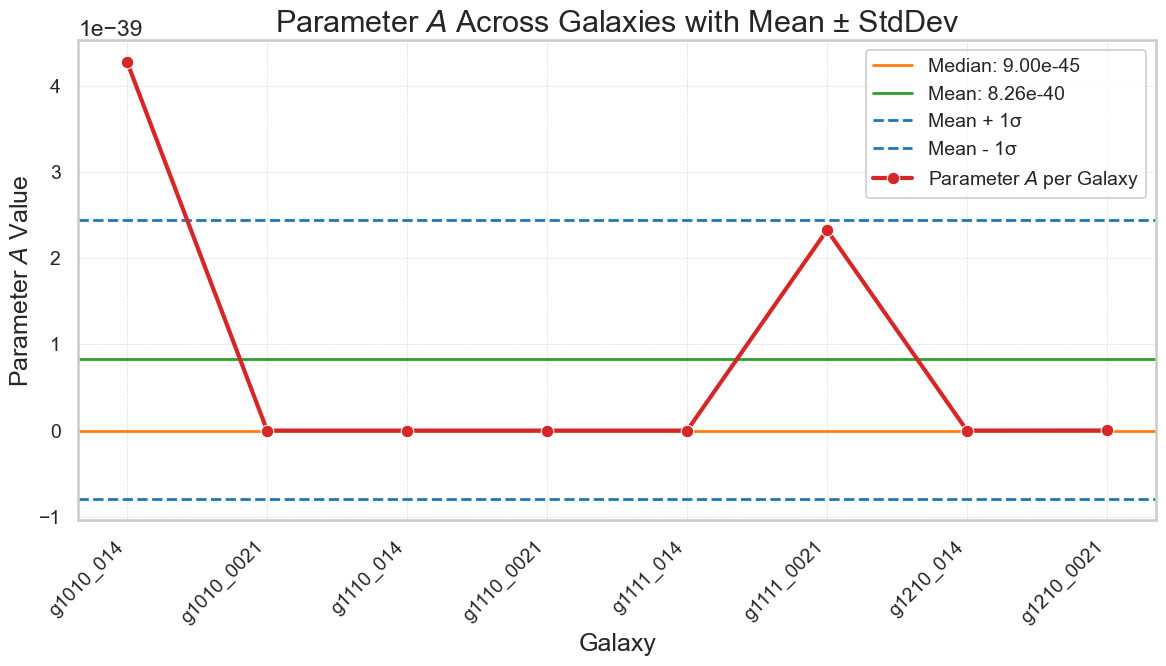

✅ Gorgeous Seaborn line plot for A created!
Mean of A is:8.256900050933823e-40
Median of A is:8.999895655343986e-45
Std of A is:1.6148239670156136e-39


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_context("talk")
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Load CSV
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Data
galaxies = df['Galaxy']
A_values = df['A']

# Calculate mean and std
mean_A = A_values.mean()
std_A = A_values.std()
median_A = A_values.median()
# --- Seaborn Lineplot ---
plt.figure(figsize=(12,7))

# Horizontal lines
plt.axhline(median_A, color=palette[1], linestyle='-', linewidth=2, label=f"Median: {median_A:.2e}")
plt.axhline(mean_A, color=palette[2], linestyle='-', linewidth=2, label=f"Mean: {mean_A:.2e}")
plt.axhline(mean_A + std_A, color=palette[0], linestyle='--', linewidth=2, label=f"Mean + 1σ")
plt.axhline(mean_A - std_A, color=palette[0], linestyle='--', linewidth=2, label=f"Mean - 1σ")

# Line plot for A
sns.lineplot(
    x=galaxies,
    y=A_values,
    marker="o",
    linewidth=3,
    color=palette[3],
    label=r"Parameter $A$ per Galaxy"
)

# Aesthetics
plt.title(r"Parameter $A$ Across Galaxies with Mean ± StdDev", fontsize=22)
plt.xlabel("Galaxy", fontsize=18)
plt.ylabel(r"Parameter $A$ Value", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# Save
plt.savefig("/Users/neelpanchal/extracted_data/params_plot/A_plot_mean_stddev_sns.png", dpi=500, bbox_inches='tight')
plt.show()

print("✅ Gorgeous Seaborn line plot for A created!")
print(f'Mean of A is:{mean_A}')
print(f'Median of A is:{median_A}')
print(f'Std of A is:{std_A}')

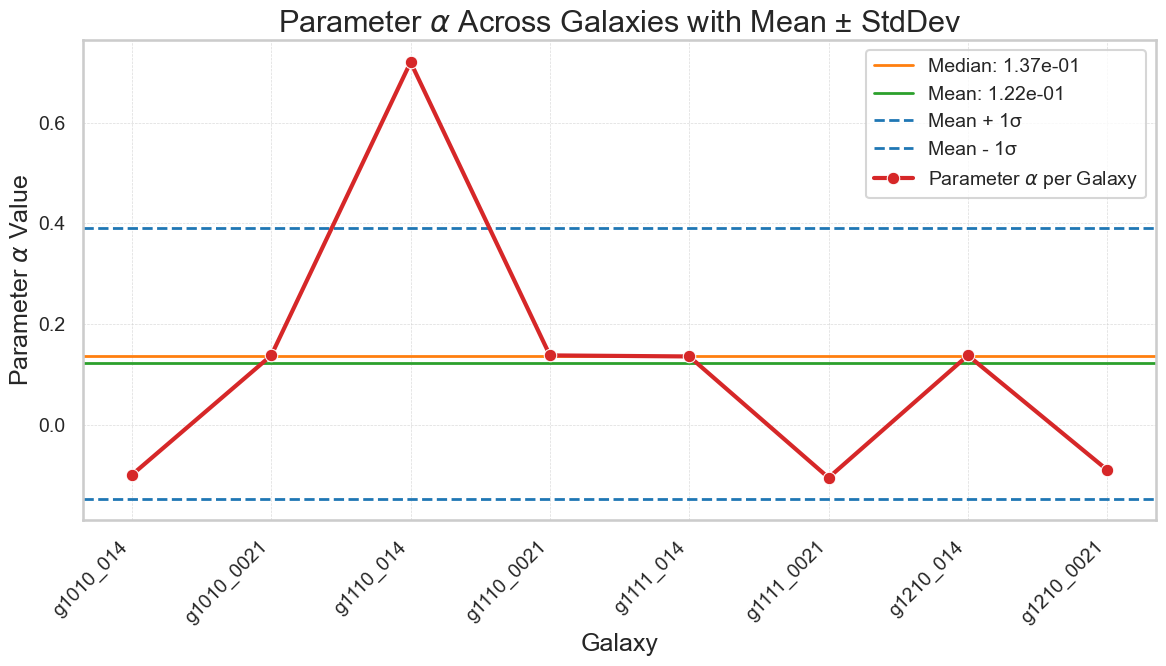

✅ Gorgeous Seaborn line plot for alpha created!
Mean of A is:0.12207513496971444
Median of A is:0.1369302469362737
Std of A is:0.2682114511828628


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_context("talk")
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Load CSV
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Data
galaxies = df['Galaxy']
alpha_values = df['alpha']

# Calculate mean and std
mean_alpha = alpha_values.mean()
std_alpha = alpha_values.std()
median_alpha = alpha_values.median()
# --- Seaborn Lineplot ---
plt.figure(figsize=(12,7))

# Horizontal lines
plt.axhline(median_alpha, color=palette[1], linestyle='-', linewidth=2, label=f"Median: {median_alpha:.2e}")
plt.axhline(mean_alpha, color=palette[2], linestyle='-', linewidth=2, label=f"Mean: {mean_alpha:.2e}")
plt.axhline(mean_alpha + std_alpha, color=palette[0], linestyle='--', linewidth=2, label=f"Mean + 1σ")
plt.axhline(mean_alpha - std_alpha, color=palette[0], linestyle='--', linewidth=2, label=f"Mean - 1σ")

# Line plot for A
sns.lineplot(
    x=galaxies,
    y=alpha_values,
    marker="o",
    linewidth=3,
    color=palette[3],
    label=r"Parameter $\alpha$ per Galaxy"
)

# Aesthetics
plt.title(r"Parameter $\alpha$ Across Galaxies with Mean ± StdDev", fontsize=22)
plt.xlabel("Galaxy", fontsize=18)
plt.ylabel(r"Parameter $\alpha$ Value", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# Save
plt.savefig("/Users/neelpanchal/extracted_data/params_plot/alpha_plot_mean_stddev_sns.png", dpi=500, bbox_inches='tight')
plt.show()

print("✅ Gorgeous Seaborn line plot for alpha created!")
print(f'Mean of A is:{mean_alpha}')
print(f'Median of A is:{median_alpha}')
print(f'Std of A is:{std_alpha}')

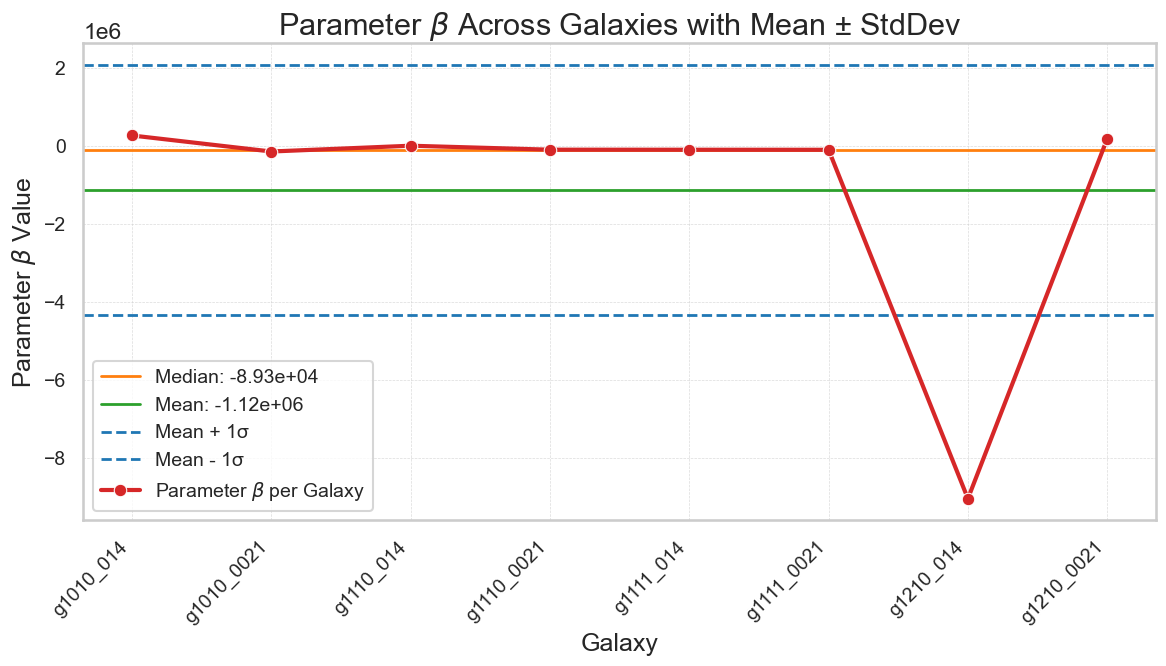

✅ Gorgeous Seaborn line plot for beta created!
Mean of beta is:-1119266.3464845833
Median of beta is:-89263.8104100229
Std of beta is:3199730.6812000326


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_context("talk")
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Load CSV
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Data
galaxies = df['Galaxy']
beta_values = df['beta']

# Calculate mean and std
mean_beta = beta_values.mean()
std_beta = beta_values.std()
median_beta = beta_values.median()
# --- Seaborn Lineplot ---
plt.figure(figsize=(12,7))

# Horizontal lines
plt.axhline(median_beta, color=palette[1], linestyle='-', linewidth=2, label=f"Median: {median_beta:.2e}")
plt.axhline(mean_beta, color=palette[2], linestyle='-', linewidth=2, label=f"Mean: {mean_beta:.2e}")
plt.axhline(mean_beta + std_beta, color=palette[0], linestyle='--', linewidth=2, label=f"Mean + 1σ")
plt.axhline(mean_beta - std_beta, color=palette[0], linestyle='--', linewidth=2, label=f"Mean - 1σ")

# Line plot for A
sns.lineplot(
    x=galaxies,
    y=beta_values,
    marker="o",
    linewidth=3,
    color=palette[3],
    label=r"Parameter $\beta$ per Galaxy"
)

# Aesthetics
plt.title(r"Parameter $\beta$ Across Galaxies with Mean ± StdDev", fontsize=22)
plt.xlabel("Galaxy", fontsize=18)
plt.ylabel(r"Parameter $\beta$ Value", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# Save
plt.savefig("/Users/neelpanchal/extracted_data/params_plot/beta_plot_mean_stddev_sns.png", dpi=500, bbox_inches='tight')
plt.show()

print("✅ Gorgeous Seaborn line plot for beta created!")
print(f'Mean of beta is:{mean_beta}')
print(f'Median of beta is:{median_beta}')
print(f'Std of beta is:{std_beta}')

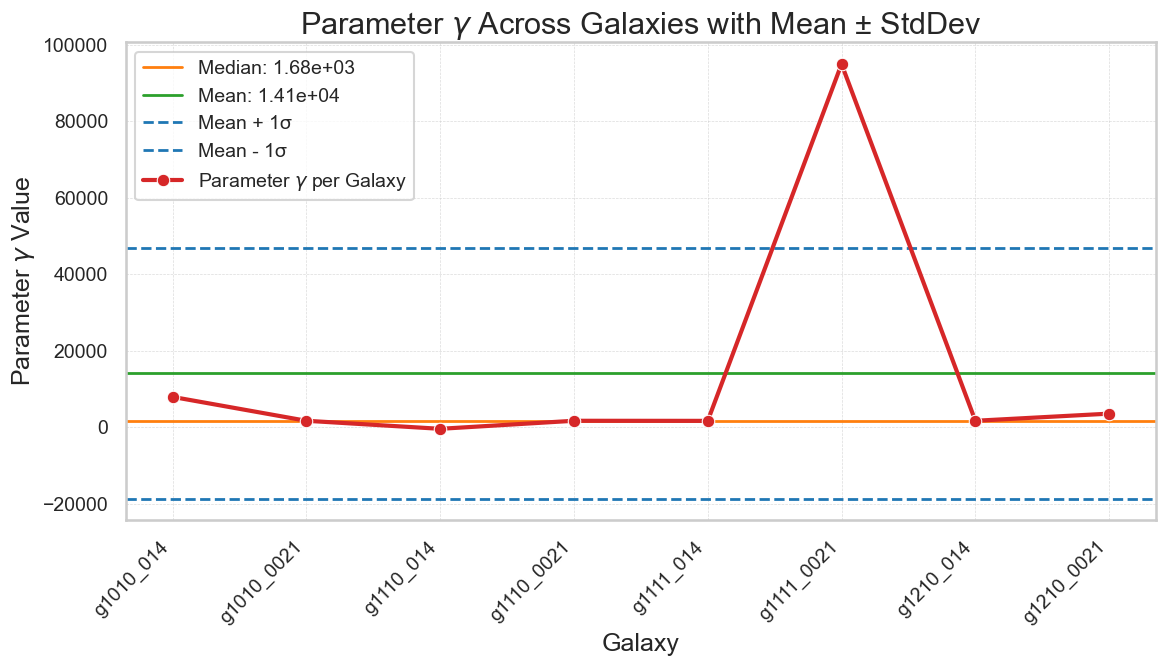

✅ Gorgeous Seaborn line plot for gamma created!
Mean of gamma is:14083.84275797698
Median of gamma is:1679.7662849018993
Std of gamma is:32756.108699132958


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_context("talk")
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Load CSV
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Data
galaxies = df['Galaxy']
gamma_values = df['gamma']

# Calculate mean and std
mean_gamma = gamma_values.mean()
std_gamma = gamma_values.std()
median_gamma = gamma_values.median()
# --- Seaborn Lineplot ---
plt.figure(figsize=(12,7))

# Horizontal lines
plt.axhline(median_gamma, color=palette[1], linestyle='-', linewidth=2, label=f"Median: {median_gamma:.2e}")
plt.axhline(mean_gamma, color=palette[2], linestyle='-', linewidth=2, label=f"Mean: {mean_gamma:.2e}")
plt.axhline(mean_gamma + std_gamma, color=palette[0], linestyle='--', linewidth=2, label=f"Mean + 1σ")
plt.axhline(mean_gamma - std_gamma, color=palette[0], linestyle='--', linewidth=2, label=f"Mean - 1σ")

# Line plot for A
sns.lineplot(
    x=galaxies,
    y=gamma_values,
    marker="o",
    linewidth=3,
    color=palette[3],
    label=r"Parameter $\gamma$ per Galaxy"
)

# Aesthetics
plt.title(r"Parameter $\gamma$ Across Galaxies with Mean ± StdDev", fontsize=22)
plt.xlabel("Galaxy", fontsize=18)
plt.ylabel(r"Parameter $\gamma$ Value", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# Save
plt.savefig("/Users/neelpanchal/extracted_data/params_plot/gamma_plot_mean_stddev_sns.png", dpi=500, bbox_inches='tight')
plt.show()

print("✅ Gorgeous Seaborn line plot for gamma created!")
print(f'Mean of gamma is:{mean_gamma}')
print(f'Median of gamma is:{median_gamma}')
print(f'Std of gamma is:{std_gamma}')

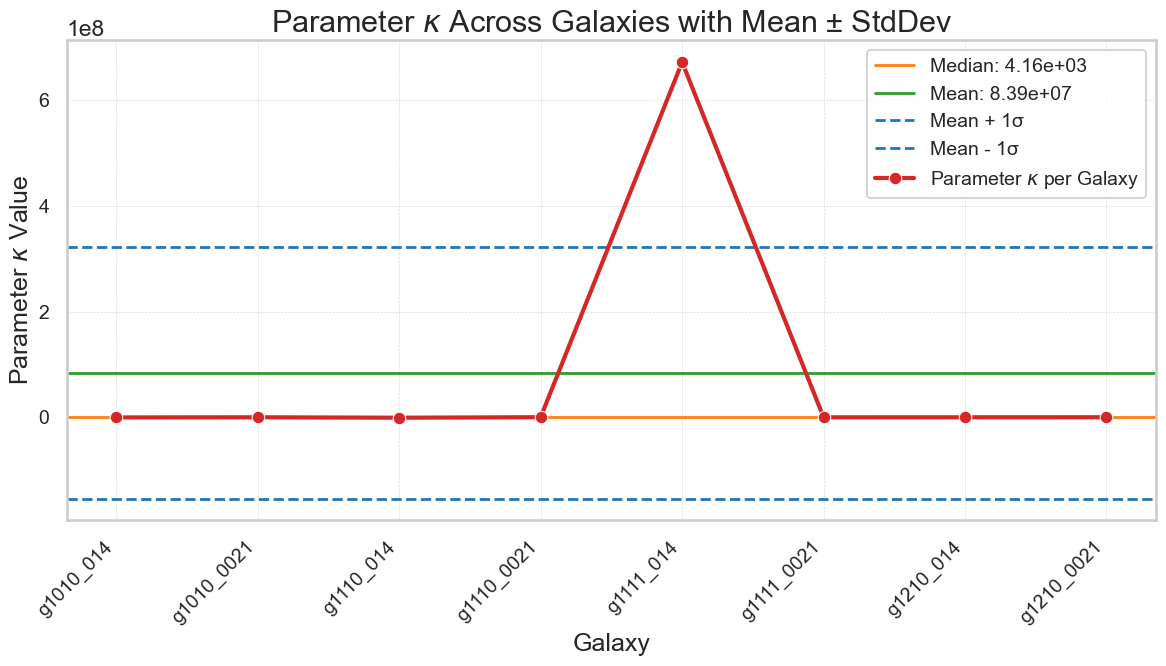

✅ Gorgeous Seaborn line plot for kappa created!
Mean of kappa is:83885227.33122702
Median of kappa is:4164.80033350716
Std of kappa is:237634102.30368337


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_context("talk")
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Load CSV
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Data
galaxies = df['Galaxy']
kappa_values = df['kappa']

# Calculate mean and std
mean_kappa = kappa_values.mean()
std_kappa = kappa_values.std()
median_kappa = kappa_values.median()
# --- Seaborn Lineplot ---
plt.figure(figsize=(12,7))

# Horizontal lines
plt.axhline(median_kappa, color=palette[1], linestyle='-', linewidth=2, label=f"Median: {median_kappa:.2e}")
plt.axhline(mean_kappa, color=palette[2], linestyle='-', linewidth=2, label=f"Mean: {mean_kappa:.2e}")
plt.axhline(mean_kappa + std_kappa, color=palette[0], linestyle='--', linewidth=2, label=f"Mean + 1σ")
plt.axhline(mean_kappa - std_kappa, color=palette[0], linestyle='--', linewidth=2, label=f"Mean - 1σ")

# Line plot for A
sns.lineplot(
    x=galaxies,
    y=kappa_values,
    marker="o",
    linewidth=3,
    color=palette[3],
    label=r"Parameter $\kappa$ per Galaxy"
)

# Aesthetics
plt.title(r"Parameter $\kappa$ Across Galaxies with Mean ± StdDev", fontsize=22)
plt.xlabel("Galaxy", fontsize=18)
plt.ylabel(r"Parameter $\kappa$ Value", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# Save
plt.savefig("/Users/neelpanchal/extracted_data/params_plot/kappa_plot_mean_stddev_sns.png", dpi=500, bbox_inches='tight')
plt.show()

print("✅ Gorgeous Seaborn line plot for kappa created!")
print(f'Mean of kappa is:{mean_kappa}')
print(f'Median of kappa is:{median_kappa}')
print(f'Std of kappa is:{std_kappa}')

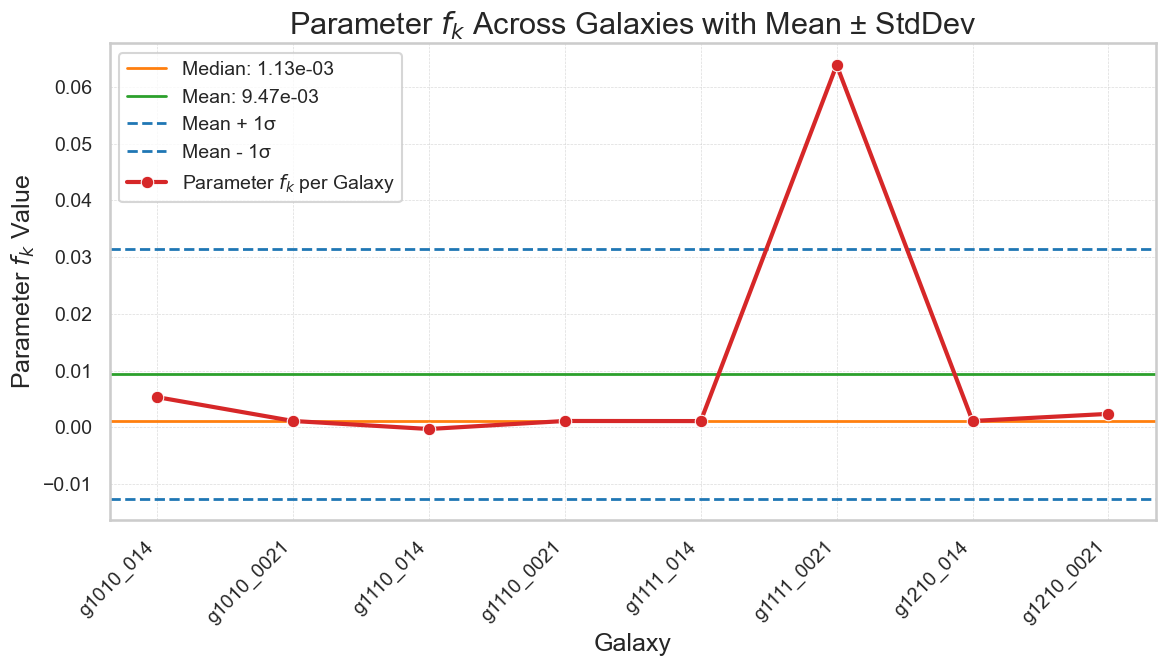

✅ Gorgeous Seaborn line plot for fk created!
Mean of gamma is:0.009473083749039787
Median of gamma is:0.00112984279877325
Std of gamma is:0.02203237104279643


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_context("talk")
sns.set_style("whitegrid")
palette = sns.color_palette("tab10")

# Load CSV
df = pd.read_csv("/Users/neelpanchal/extracted_data/cornish_fits_results_nb.csv")

# Data
galaxies = df['Galaxy']
fk_values = df['f_k']

# Calculate mean and std
mean_fk = fk_values.mean()
std_fk = fk_values.std()
median_fk = fk_values.median()
# --- Seaborn Lineplot ---
plt.figure(figsize=(12,7))

# Horizontal lines
plt.axhline(median_fk, color=palette[1], linestyle='-', linewidth=2, label=f"Median: {median_fk:.2e}")
plt.axhline(mean_fk, color=palette[2], linestyle='-', linewidth=2, label=f"Mean: {mean_fk:.2e}")
plt.axhline(mean_fk + std_fk, color=palette[0], linestyle='--', linewidth=2, label=f"Mean + 1σ")
plt.axhline(mean_fk - std_fk, color=palette[0], linestyle='--', linewidth=2, label=f"Mean - 1σ")

# Line plot for A
sns.lineplot(
    x=galaxies,
    y=fk_values,
    marker="o",
    linewidth=3,
    color=palette[3],
    label=r"Parameter $f_k$ per Galaxy"
)

# Aesthetics
plt.title(r"Parameter $f_k$ Across Galaxies with Mean ± StdDev", fontsize=22)
plt.xlabel("Galaxy", fontsize=18)
plt.ylabel(r"Parameter $f_k$ Value", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()

# Save
plt.savefig("/Users/neelpanchal/extracted_data/params_plot/fk_plot_mean_stddev_sns.png", dpi=500, bbox_inches='tight')
plt.show()

print("✅ Gorgeous Seaborn line plot for fk created!")
print(f'Mean of gamma is:{mean_fk}')
print(f'Median of gamma is:{median_fk}')
print(f'Std of gamma is:{std_fk}')

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from astropy import units as u
from legwork import instrument

f_fit_unresolved, psd_fit_unresolved = bin_unresolved_galaxy(
    g1210_0021, 
    dist_1210_0021, 
    galaxy_name='G1210_0021', 
    plot=False
)


def cornish_psd(pars, freq):
    """
    Simple Cornish foreground model.
    pars = (A, alpha, beta, kappa, gamma, fk)
    """
    A, alpha, beta, kappa, gamma, fk = pars
    x = freq / fk
    return A * np.power(freq, alpha) * np.exp(beta*freq) * \
           np.power(1 + (x**gamma), -kappa/gamma)

def make_plot(tag, freq, psd_unres, fit_bounded, fit_unbounded,
              outpng=".", lisa_years=4):
    # PSD from the two fits
    psd_b = cornish_psd(fit_bounded, freq)
    psd_u = cornish_psd(fit_unbounded, freq)

    # LISA sensitivity (LEGWORK)
    lis_noise = instrument.sensitivity_spectrum(
        frequencies=freq*u.Hz, mission_lifetime=lisa_years*u.yr).value

    # Chi-square for caption
    chi2_b = np.sum(((psd_unres - psd_b) / psd_b)**2) / (len(freq)-6)

    # ---------- figure ----------
    fig, (ax, axr) = plt.subplots(2, 1, figsize=(8,5.5),
                                  gridspec_kw={'height_ratios':[3,1]},
                                  sharex=True)

    ax.loglog(freq, psd_unres, 'k.', ms=3, label="Binned data")
    ax.loglog(freq, psd_b,  color="tab:orange", lw=1.5, label="Bounded fit")
    ax.loglog(freq, psd_u,  color="tab:blue",  ls="--", lw=1.2,
              label="Unbounded fit")
    ax.loglog(freq, lis_noise, color="grey", ls=':', label="LISA 4-yr noise")

    ax.set_title(f"Cornish fit – {tag}")
    ax.set_ylabel("PSD  [strain$^2$/Hz]")
    ax.legend(fontsize=8)

    # residuals
    axr.semilogx(freq, (psd_unres/psd_b) - 1, 'k.', ms=3)
    axr.axhline(0, color='grey', lw=0.6)
    axr.set_ylim(-1, 1)
    axr.set_ylabel("Rel. res.")
    axr.set_xlabel("Frequency [Hz]")

    fig.tight_layout()
    fig.savefig(f"{outpng}/cornish_{tag}.png", dpi=300)
    plt.close(fig)          # prevent memory leak

    print(f"{tag}: reduced χ² (bounded) = {chi2_b:.2f}")


In [ ]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

# ---------- your inputs ----------
# f_fit, psd_fit  : arrays from bin_unresolved_galaxy
# pars_bounded    : [A, alpha, beta, kappa, gamma, f_k] from your fit
pars_cornish = np.array([
    5.00005e-41,   # A
    1.38e-01,      # alpha
   -2.21e+02,      # beta
    5.21e+02,      # kappa
    1.68e+03,      # gamma
    1.13e-03       # f_k  [Hz]
])

def cornish_psd_log(pars, f):
    """
    Numerically stable Cornish PSD.
    Returns log10(PSD) to avoid underflow.
    """
    A, alpha, beta, kappa, gamma, f_k = pars
    logA = np.log10(A)
    log_f = np.log10(f)
    log_term1 = alpha * log_f         # log(f^alpha)
    log_term2 = beta * f / np.log(10) # log10(e^(beta f))
    x = f / f_k
    # log10( (1+x^γ)^(-κ/γ) )
    with np.errstate(divide='ignore'):
        log_term3 = -(kappa/gamma) * np.log10(1 + np.power(x, gamma))
    return logA + log_term1 + log_term2 + log_term3

def psd_from_log(logpsd):
    """Convert log10(PSD) to linear, clipping extreme underflow."""
    return np.power(10.0, np.clip(logpsd, -320, 320))

# evaluate both curves
log_psd_c   = cornish_psd_log(pars_cornish, f_fit)
log_psd_b   = cornish_psd_log(pars_bounded, f_fit)
psd_cornish = psd_from_log(log_psd_c)
psd_bound   = psd_from_log(log_psd_b)

# ---------- Seaborn styling ----------
sns.set_theme(style="white", context="talk", palette="bright")
plt.rcParams["axes.grid"] = False

fig, (ax, axr) = plt.subplots(2, 1, figsize=(8, 5.7),
                              sharex=True,
                              gridspec_kw={"height_ratios":[3,1]})

# data
sns.scatterplot(x=f_fit, y=psd_fit, color="black", s=18, linewidth=0, ax=ax)

# bounded fit (orange)
sns.lineplot(x=f_fit, y=psd_bound,
             color=sns.color_palette("bright")[0],
             lw=2.3, label="Bounded fit", ax=ax)

# Cornish analytic confusion (dashed blue)
sns.lineplot(x=f_fit, y=psd_cornish,
             color=sns.color_palette("bright")[1],
             lw=2.0, ls="--", label="Cornish 19 analytic", ax=ax)

# cosmetics
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("PSD  [strain$^2$/Hz]")
ax.set_title("Unresolved WD foreground vs. Cornish confusion – g1010_014")
ax.legend(frameon=False, fontsize=9)
sns.despine(ax=ax)

# residuals wrt your bounded fit
res = psd_fit / psd_bound - 1
sns.scatterplot(x=f_fit, y=res, color="black", s=18, linewidth=0, ax=axr)
axr.axhline(0, color="grey", lw=0.6)
axr.set_xscale("log")
axr.set_ylim(-1, 1)
axr.set_ylabel("Rel. res.")
axr.set_xlabel("Frequency [Hz]")
sns.despine(ax=axr)

fig.tight_layout()
fig.savefig("cornish_confusion_vs_fit.png", dpi=300)
plt.show()